# About the dataset

# Yield Curve Data 

A yield curve shows several yields or interest rates across different contract lengths (2 month, 2 year, 20 year) for a similar debt contract financial securities. The curve shows the relation between the interest rate (cost of borrowing) and the time to maturity, known as the "term", of the debt for a given borrower in a given currency. This IR (yield)  can in-turn help gain insights into derive price deals, quantify risk, measure solvency, hedge, and more - thus foundational layer of quantitative financial analysis.

IR curve varies by asset class and this data may contain noise or have missing points depending upon trading frequency, liquidity levels or time of availability at the time of data snapshot. However, given their impact on financial analysis, it is quintessential to be able to accurately derive these while understanding the impact of this noise and missing values.

One very important YC is US Treasury yield curve - draws out a line chart to demonstrate a relationship between yields(price at which US treasury is willing to borrow money or investors are willing to lend) and maturities of on-the-run treasury fixed income debt securities. It illustrates the yields of Treasury securities at fixed maturities, viz. 1, 3 and 6 months and 1, 2, 3, 5, 7, 10, 20 and 30 years. These are zero coupon(no interest paid before maturity), risk-free( guaranteed return of principal and coupon promised at issue). Given this, these are often used as a benchmark to evaluate the relative worth of US Non-Treasury securities.


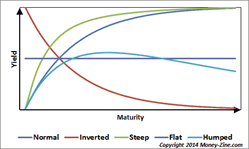

The spread between short term rates and long term rates that determines the slope of the yield curve, is a predictor of economic situation of the country. There are 3 major types of shapes:

1) Normal/upward slope: short term rates are lower than longer term rates, exhibiting an upward slope where investors are compensated for holding the longer term securities that possess greater investment risks.  The higher yields on longer term maturity also means that the short term rates are likely to increase in the future as the growth in the economy would lead to higher inflation rates.

2)Inverted/Downward slope: This occurs when short term rates are greater than the long term rates. It would generally imply that both monetary and fiscal policies are currently restrictive in nature and the probability of the economy contracting in the future is high. According to empirical evidence, the Inverted Yield curve has been the best predictor of recessions in the economy.

3)Flat/Humped YC: This occurs when yields on medium term US Treasury Securities are higher than the yields on long term and the short term US Treasury Securities. This reflects that the current economic condition is unclear and the investors are uncertain about the economic scenario in the near future. It could also reflect that monetary policy is expansionary and fiscal policy is restrictive or vice-versa. It can also a predictor of an economic transition.


In [670]:
import matplotlib.pyplot as plt  # Plotting & visualization
%matplotlib inline
import numpy as np  # Arrays & matrices
import pandas as pd  # Dataframes & series
import scipy as sp  # Scientific algorithms
import seaborn as sns  # Plotting/visualization
sns.set()
import statsmodels as sm  # Statistical modeling & analysis
import sympy as S  # Symbolic equations

Read in the data

In [671]:
import pandas as pd
import numpy as np
yield_data = pd.read_csv("FRB_H15.csv").replace("ND", np.nan)
yield_data['Time Period'] = pd.to_datetime(yield_data['Time Period']).apply(lambda x:x.strftime('%Y-%m-%d'))


In [672]:
yield_data

Time Period 1-month 3-month 6-month 1-year 2-year 3-year 5-year 7-year  \
0      1962-01-02     NaN     NaN     NaN   3.22    NaN    3.7   3.88    NaN   
1      1962-01-03     NaN     NaN     NaN   3.24    NaN    3.7   3.87    NaN   
2      1962-01-04     NaN     NaN     NaN   3.24    NaN   3.69   3.86    NaN   
3      1962-01-05     NaN     NaN     NaN   3.26    NaN   3.71   3.89    NaN   
4      1962-01-08     NaN     NaN     NaN   3.31    NaN   3.71   3.91    NaN   
...           ...     ...     ...     ...    ...    ...    ...    ...    ...   
14536  2017-09-20    0.98    1.04     1.2   1.32   1.45    1.6   1.89   2.12   
14537  2017-09-21    0.99    1.04    1.19   1.31   1.45   1.59   1.89   2.11   
14538  2017-09-22    0.97    1.03    1.19    1.3   1.46   1.58   1.88    2.1   
14539  2017-09-25    0.97    1.05    1.19    1.3   1.44   1.56   1.85   2.07   
14540  2017-09-26    0.96    1.06    1.19   1.31   1.45   1.57   1.87   2.08   

      10-year 20-year 30-year  
0        4.06     NaN     NaN  
1        4.03     NaN     NaN  
2        3.99     NaN     NaN  
3        4.02     NaN     NaN  
4        4.03     NaN     NaN  
...       ...     ...     ...  
14536    2.28    2.59    2.82  
14537    2.27    2.57     2.8  
14538    2.26    2.57     2.8  
14539    2.22    2.53    2.76  
14540    2.24    2.54    2.78  

[14541 rows x 12 columns]

# Data Exploration

The trend of last 47 years(1950 to 2017) of US treasury yields. 
 insights: From the Fred's website it is clear that
1. As we can see the yields around 1980 for all maturity lengths was significantly high (approx 16%) compared to those of present(approx 2-3%).
2. Most of the public holiday and weekend data is missing.
3. Some short terms yields are missing during most of the years.


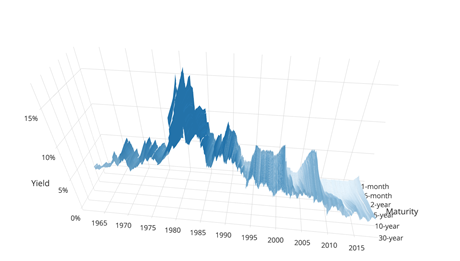

# Data Preprocessing

### Handling missing data

Some of the key features of this time series data includes missing values for particular days and one or more maturities. 

●	Missing weekend and public holiday data because markets close

●	No 1/3/6-month yields available for pre 2000 data , because such extremely short yields were not offered at issue.

To circumvent above, we performed the following steps:

●	yield rates are most correlated with the values from their immediate past e.g yield on monday = yield on friday 

●	For weekends instead of imputing values,we modified the time series such that there are no breaks after we ignore the weekend timestamps.


### Smoothen data

The time series data needs to be statistically stationary for any model to provide valid results.
For RF we chose to use Savitzky–Golay filter and for ARMA rolling window functions which are described in detail in following sections.


In [673]:
yield_data = pd.read_csv('Imputed Data.csv')
yield_data['Time Period'] = pd.to_datetime(yield_data['Time Period']).apply(lambda x:x.strftime('%Y-%m-%d'))
yield_data.set_index('Time Period',inplace=True)
yield_data.index.name = None
yield_data.head()

RIFLGFCY01_N.B  RIFLGFCY03_N.B  RIFLGFCY05_N.B  RIFLGFCY10_N.B  \
1962-01-02            3.22            3.70            3.88            4.06   
1962-01-03            3.24            3.70            3.87            4.03   
1962-01-04            3.24            3.69            3.86            3.99   
1962-01-05            3.26            3.71            3.89            4.02   
1962-01-06            3.26            3.71            3.89            4.02   

            IS_WEEKEND  Day of week  
1962-01-02           0            1  
1962-01-03           0            2  
1962-01-04           0            3  
1962-01-05           0            4  
1962-01-06           1            5

I changed columns names

In [674]:
yield_data.columns = ['1 Year_yield', '3 Year_yield', '5 Year_yield', '10 Year_yield', 'IS_WEEKEND', 'Day of week']
yield_data.head()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield  \
1962-01-02          3.22          3.70          3.88           4.06   
1962-01-03          3.24          3.70          3.87           4.03   
1962-01-04          3.24          3.69          3.86           3.99   
1962-01-05          3.26          3.71          3.89           4.02   
1962-01-06          3.26          3.71          3.89           4.02   

            IS_WEEKEND  Day of week  
1962-01-02           0            1  
1962-01-03           0            2  
1962-01-04           0            3  
1962-01-05           0            4  
1962-01-06           1            5

In [675]:
# drop Day of week and IS_WEEKEND
yield_data.drop(['IS_WEEKEND','Day of week'],axis=1,inplace = True)

In [676]:
yield_data.head()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
1962-01-02          3.22          3.70          3.88           4.06
1962-01-03          3.24          3.70          3.87           4.03
1962-01-04          3.24          3.69          3.86           3.99
1962-01-05          3.26          3.71          3.89           4.02
1962-01-06          3.26          3.71          3.89           4.02

# Checking null values

In [677]:
yield_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 20366 entries, 1962-01-02 to 2017-10-05
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1 Year_yield   20366 non-null  float64
 1   3 Year_yield   20366 non-null  float64
 2   5 Year_yield   20366 non-null  float64
 3   10 Year_yield  20366 non-null  float64
dtypes: float64(4)
memory usage: 795.5+ KB


A far more useful method for assessing missing data in this data set is by creating a quick visualization. To do this, we can use the seaborn visualization library. Here is quick command that you can use to create a heatmap using the seaborn library:

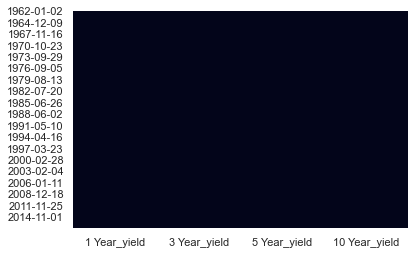

In [678]:
sns.heatmap(yield_data.isnull(), cbar=False)

In [679]:
yield_data.describe()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
count  20366.000000  20366.000000  20366.000000   20366.000000
mean       5.219524      5.649806      5.921859       6.264055
std        3.411029      3.258169      3.098484       2.861167
min        0.080000      0.280000      0.560000       1.370000
25%        3.060000      3.530000      3.860000       4.190000
50%        5.280000      5.650000      5.820000       6.020000
75%        7.090000      7.500000      7.720000       7.840000
max       17.310000     16.590000     16.270000      15.840000

# Time Series

Time series is a series of data points in which each data point is associated with a timestamp.

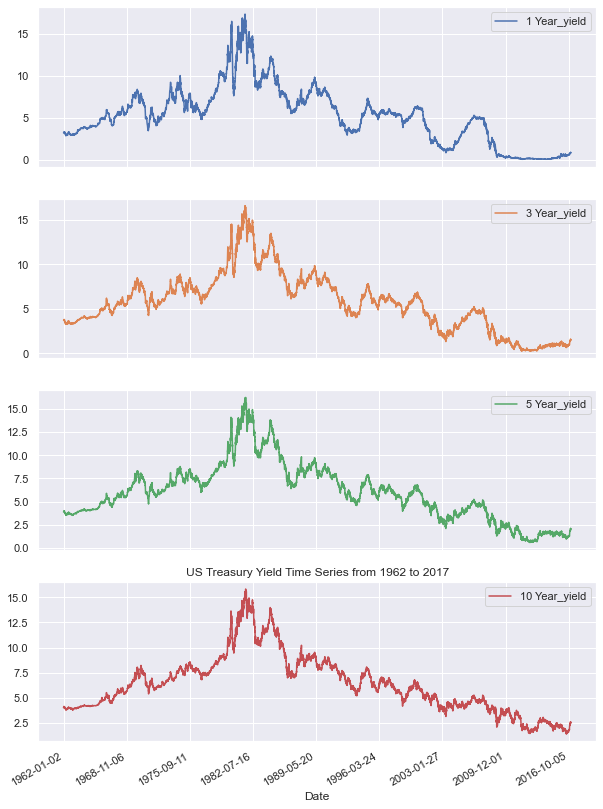

In [680]:
yield_data['1962':'2017'].plot(subplots=True, figsize=(10,15))
plt.title('US Treasury Yield Time Series from 1962 to 2017')
plt.xlabel('Date')
plt.savefig('yields.png')
plt.show()

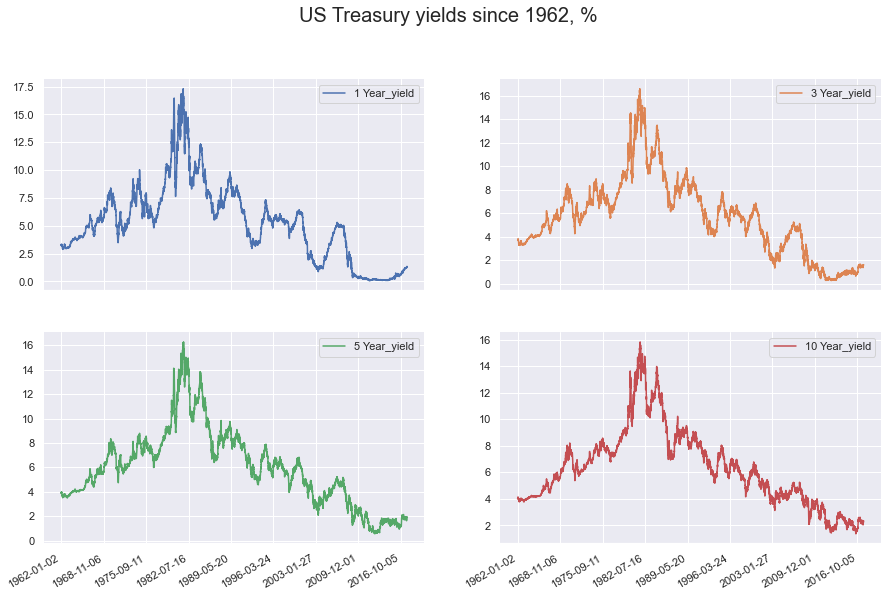

In [681]:
start = '19610102'

select_columns = ['1 Year_yield', '3 Year_yield', '5 Year_yield', '10 Year_yield']
US_treasury_yields_subplot =yield_data[select_columns]

US_treasury_yields_subplot.loc[start:].plot(subplots=True, layout=(5,2), figsize=(15, 25))
sns.despine(left=True, bottom=False, right=True)
plt.suptitle("US Treasury yields since 1962, %", fontsize=20, y=0.92)
plt.show();

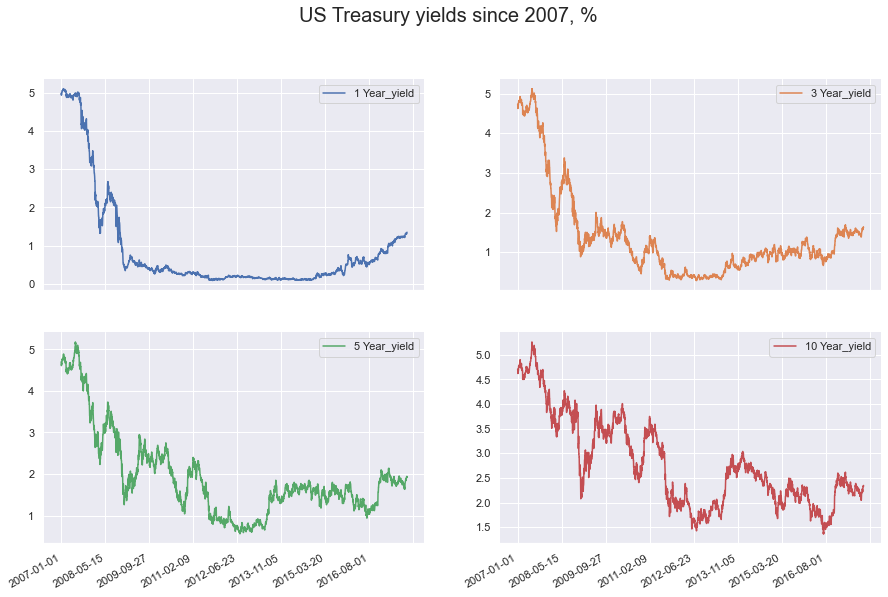

In [682]:
start = '20060102'

select_columns = ['1 Year_yield', '3 Year_yield', '5 Year_yield', '10 Year_yield']
US_treasury_yields_subplot =yield_data[select_columns]

US_treasury_yields_subplot.loc[start:].plot(subplots=True, layout=(5,2), figsize=(15, 25))
sns.despine(left=True, bottom=False, right=True)
plt.suptitle("US Treasury yields since 2007, %", fontsize=20, y=0.92)
plt.show();

# Histogram of Yields

Text(0.5, 1.0, '1 Year Yield Histogram Plot')

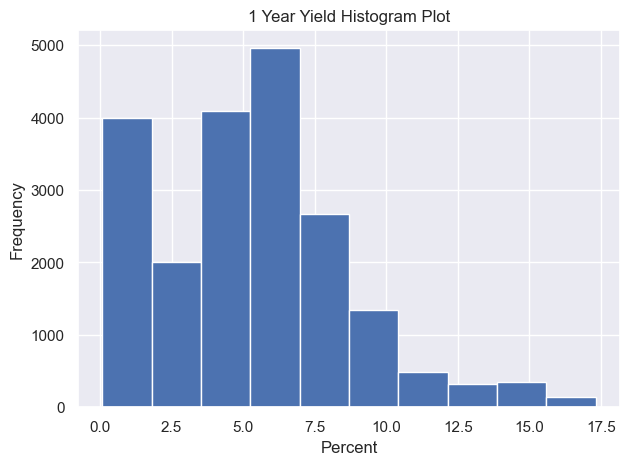

In [683]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["1 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('1 Year Yield Histogram Plot')

Text(0.5, 1.0, '3 Year Yield Histogram Plot')

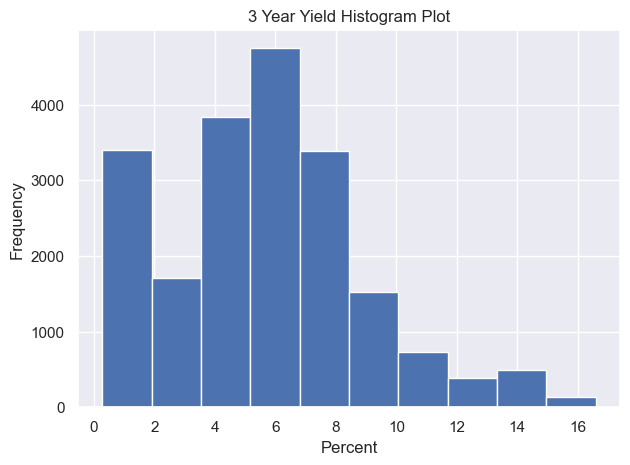

In [684]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["3 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('3 Year Yield Histogram Plot')

Text(0.5, 1.0, '5 Year Yield Histogram Plot')

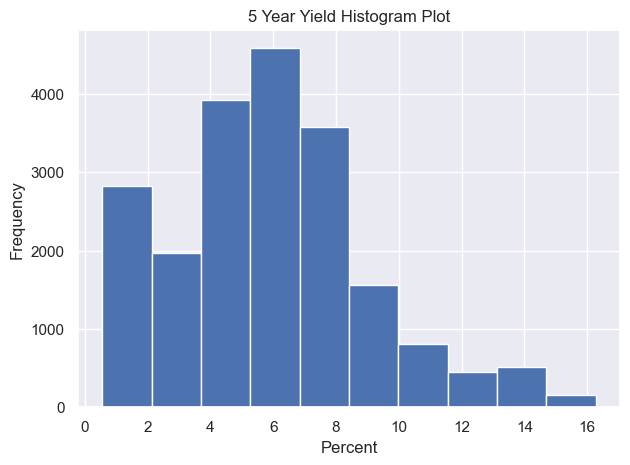

In [685]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["5 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('5 Year Yield Histogram Plot')

Text(0.5, 1.0, '10 Year Yield Histogram Plot')

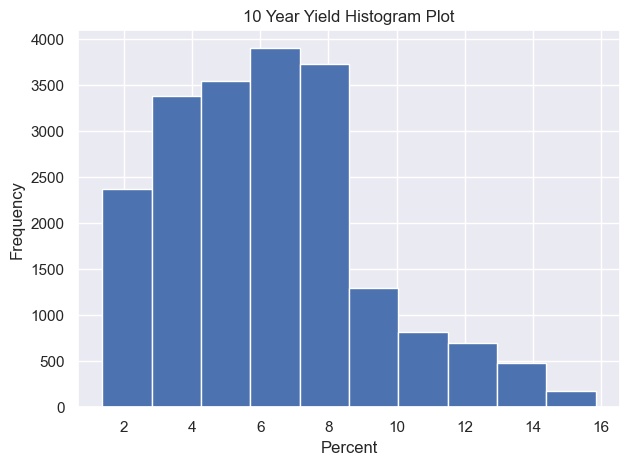

In [686]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["10 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('10 Year Yield Histogram Plot')

# 1 Year Yield 1-day and 25-day increments and Time Series

In [687]:
Oneyear_day_1 = yield_data["1 Year_yield"].diff(periods=1)
Oneyear_day_1

1962-01-02     NaN
1962-01-03    0.02
1962-01-04    0.00
1962-01-05    0.02
1962-01-06    0.00
              ... 
2017-10-01    0.00
2017-10-02    0.00
2017-10-03    0.01
2017-10-04    0.01
2017-10-05    0.02
Name: 1 Year_yield, Length: 20366, dtype: float64

In [688]:
Oneyear_day_25 = yield_data["1 Year_yield"].diff(periods=25)
Oneyear_day_25

1962-01-02     NaN
1962-01-03     NaN
1962-01-04     NaN
1962-01-05     NaN
1962-01-06     NaN
              ... 
2017-10-01    0.07
2017-10-02    0.10
2017-10-03    0.10
2017-10-04    0.11
2017-10-05    0.13
Name: 1 Year_yield, Length: 20366, dtype: float64

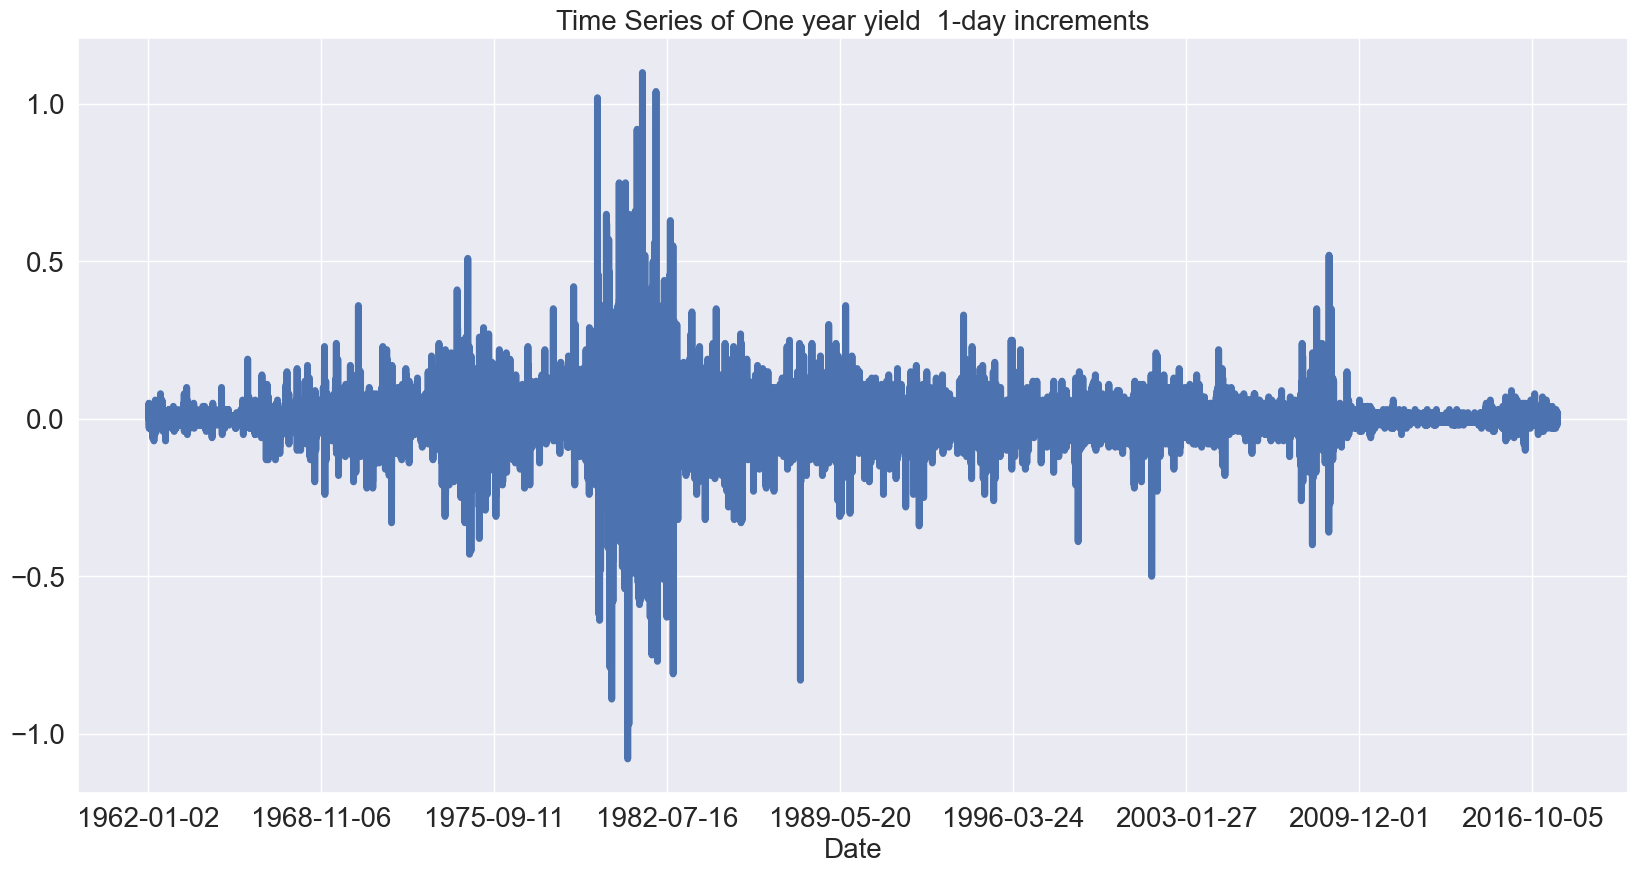

In [689]:
Oneyear_day_1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of One year yield  1-day increments', fontsize=20);

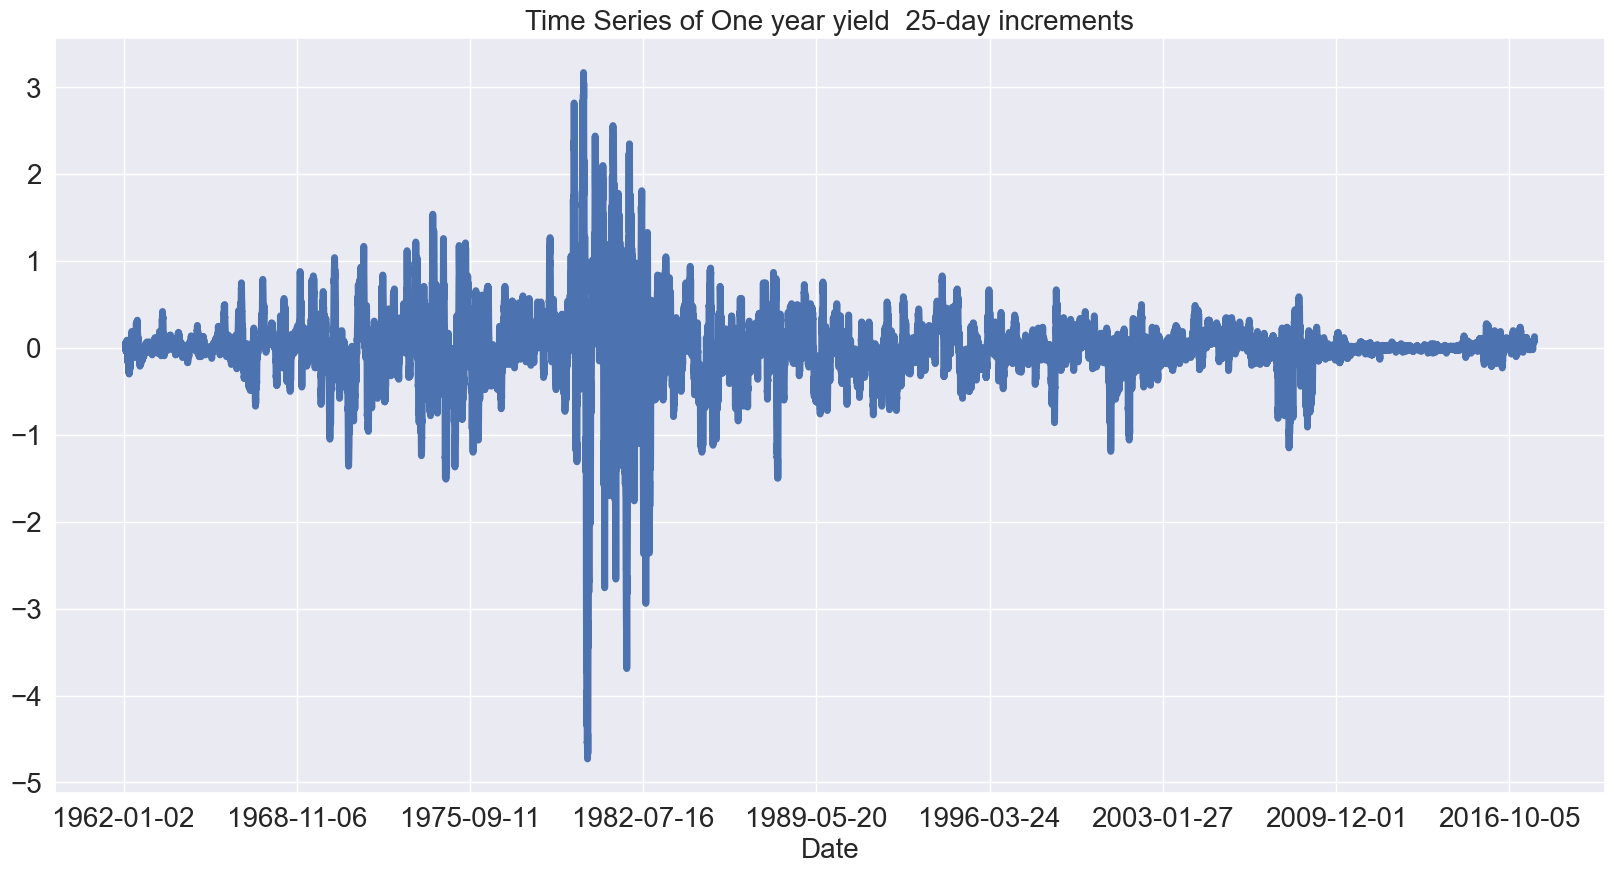

In [690]:
Oneyear_day_25.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of One year yield  25-day increments', fontsize=20);

# 3 Year Yield 1-day and 25-day increments and Time Series

In [691]:
Threeyear_day_1 = yield_data["3 Year_yield"].diff(periods=1)
Threeyear_day_1

1962-01-02     NaN
1962-01-03    0.00
1962-01-04   -0.01
1962-01-05    0.02
1962-01-06    0.00
              ... 
2017-10-01    0.00
2017-10-02    0.01
2017-10-03   -0.01
2017-10-04    0.00
2017-10-05    0.01
Name: 3 Year_yield, Length: 20366, dtype: float64

In [692]:
Threeyear_day_25 = yield_data["3 Year_yield"].diff(periods=25)
Threeyear_day_25

1962-01-02     NaN
1962-01-03     NaN
1962-01-04     NaN
1962-01-05     NaN
1962-01-06     NaN
              ... 
2017-10-01    0.20
2017-10-02    0.25
2017-10-03    0.23
2017-10-04    0.23
2017-10-05    0.24
Name: 3 Year_yield, Length: 20366, dtype: float64

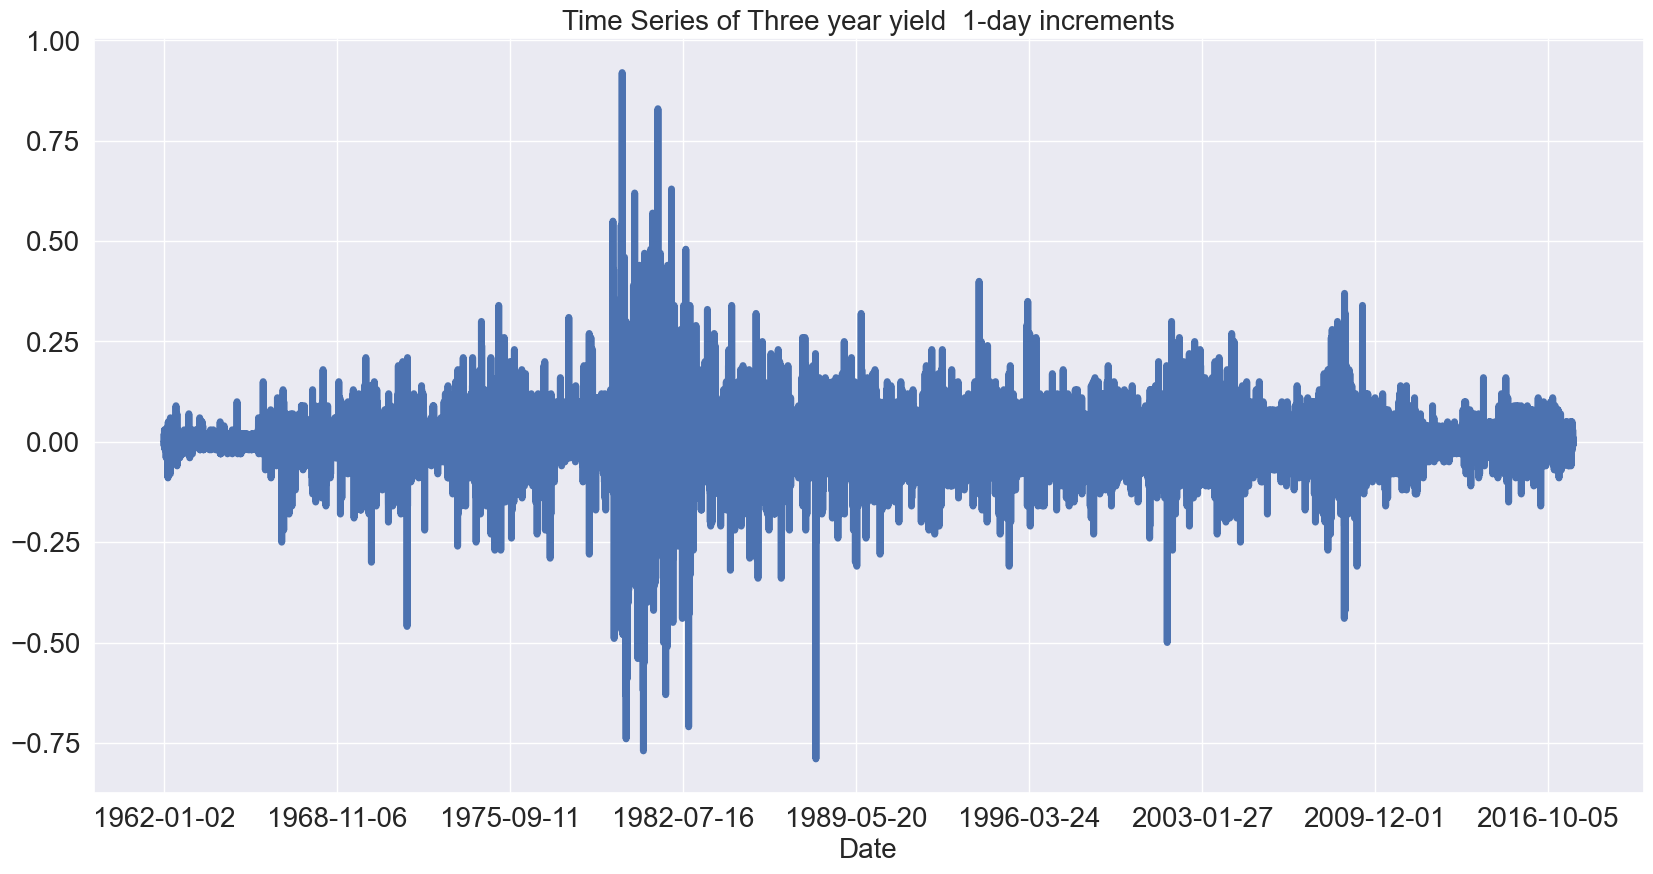

In [693]:
Threeyear_day_1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of Three year yield  1-day increments', fontsize=20);

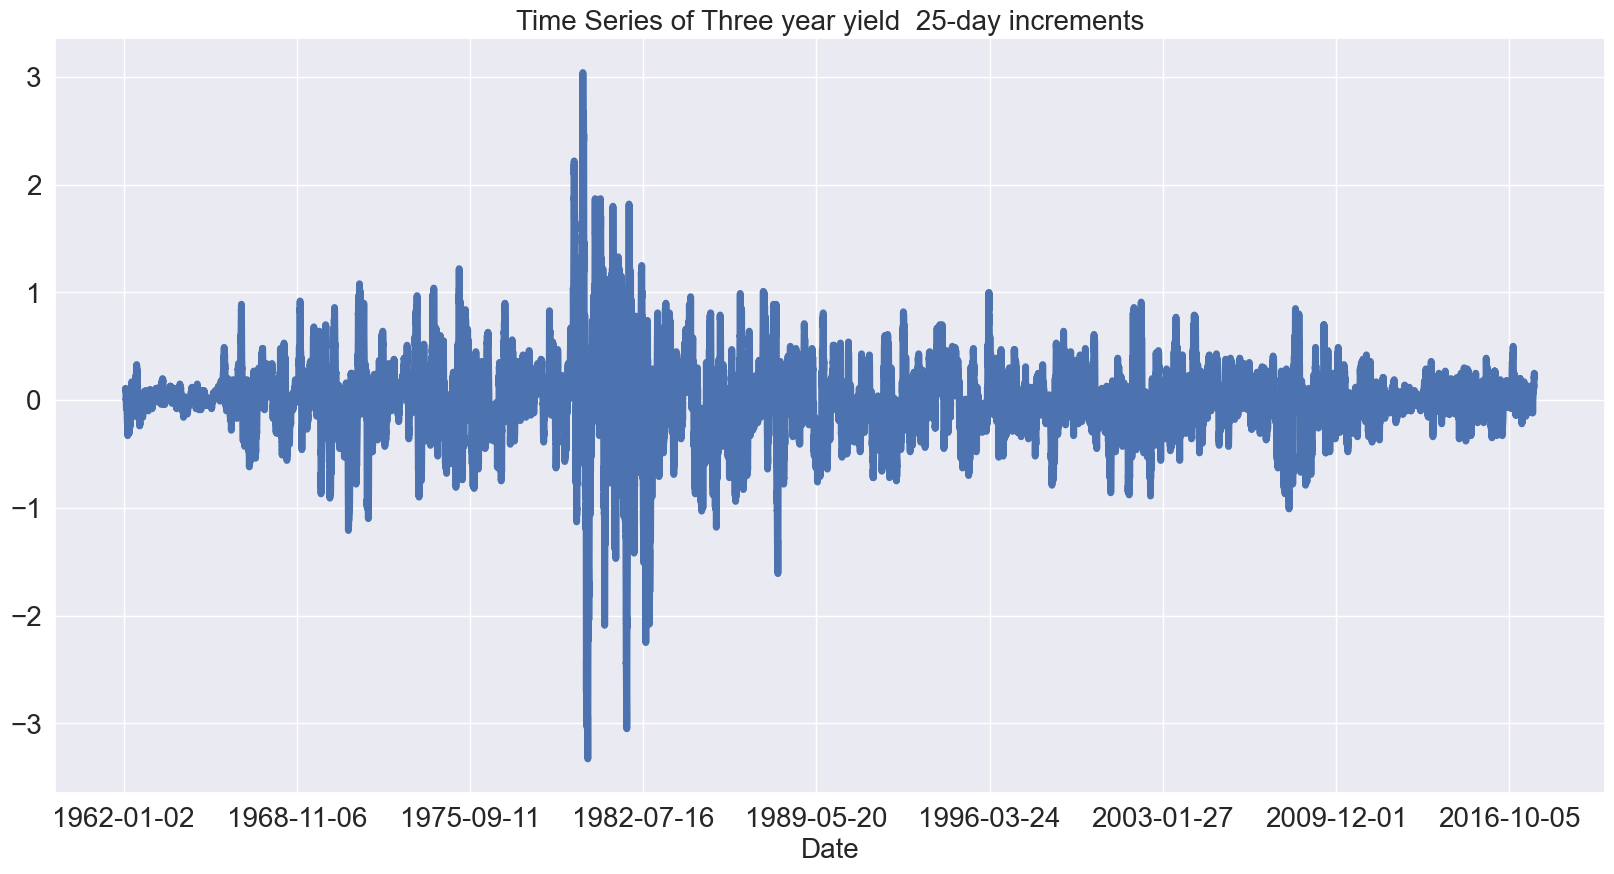

In [694]:
Threeyear_day_25.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of Three year yield  25-day increments', fontsize=20);

# 5 Year Yield 1-day and 25-day increments and Time Series

In [695]:
Fiveyear_day_1 = yield_data["5 Year_yield"].diff(periods=1)
Fiveyear_day_1

1962-01-02     NaN
1962-01-03   -0.01
1962-01-04   -0.01
1962-01-05    0.03
1962-01-06    0.00
              ... 
2017-10-01    0.00
2017-10-02    0.02
2017-10-03   -0.02
2017-10-04    0.00
2017-10-05    0.02
Name: 5 Year_yield, Length: 20366, dtype: float64

In [696]:
Fiveyear_day_25 = yield_data["5 Year_yield"].diff(periods=25)
Fiveyear_day_25

1962-01-02     NaN
1962-01-03     NaN
1962-01-04     NaN
1962-01-05     NaN
1962-01-06     NaN
              ... 
2017-10-01    0.23
2017-10-02    0.31
2017-10-03    0.28
2017-10-04    0.28
2017-10-05    0.30
Name: 5 Year_yield, Length: 20366, dtype: float64

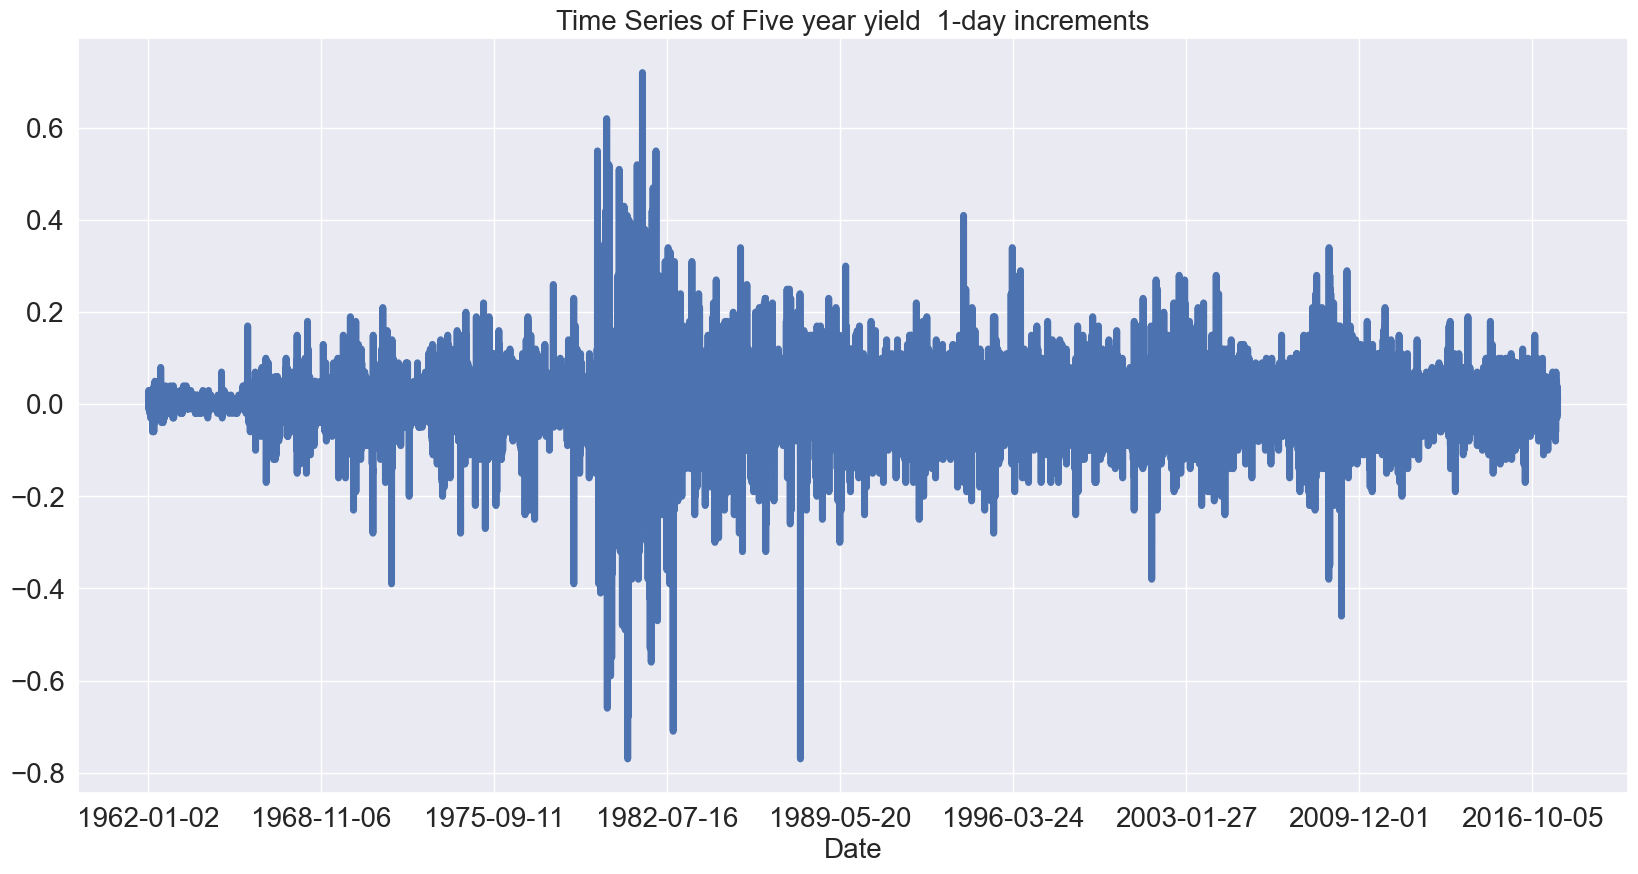

In [697]:
Fiveyear_day_1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of Five year yield  1-day increments', fontsize=20);

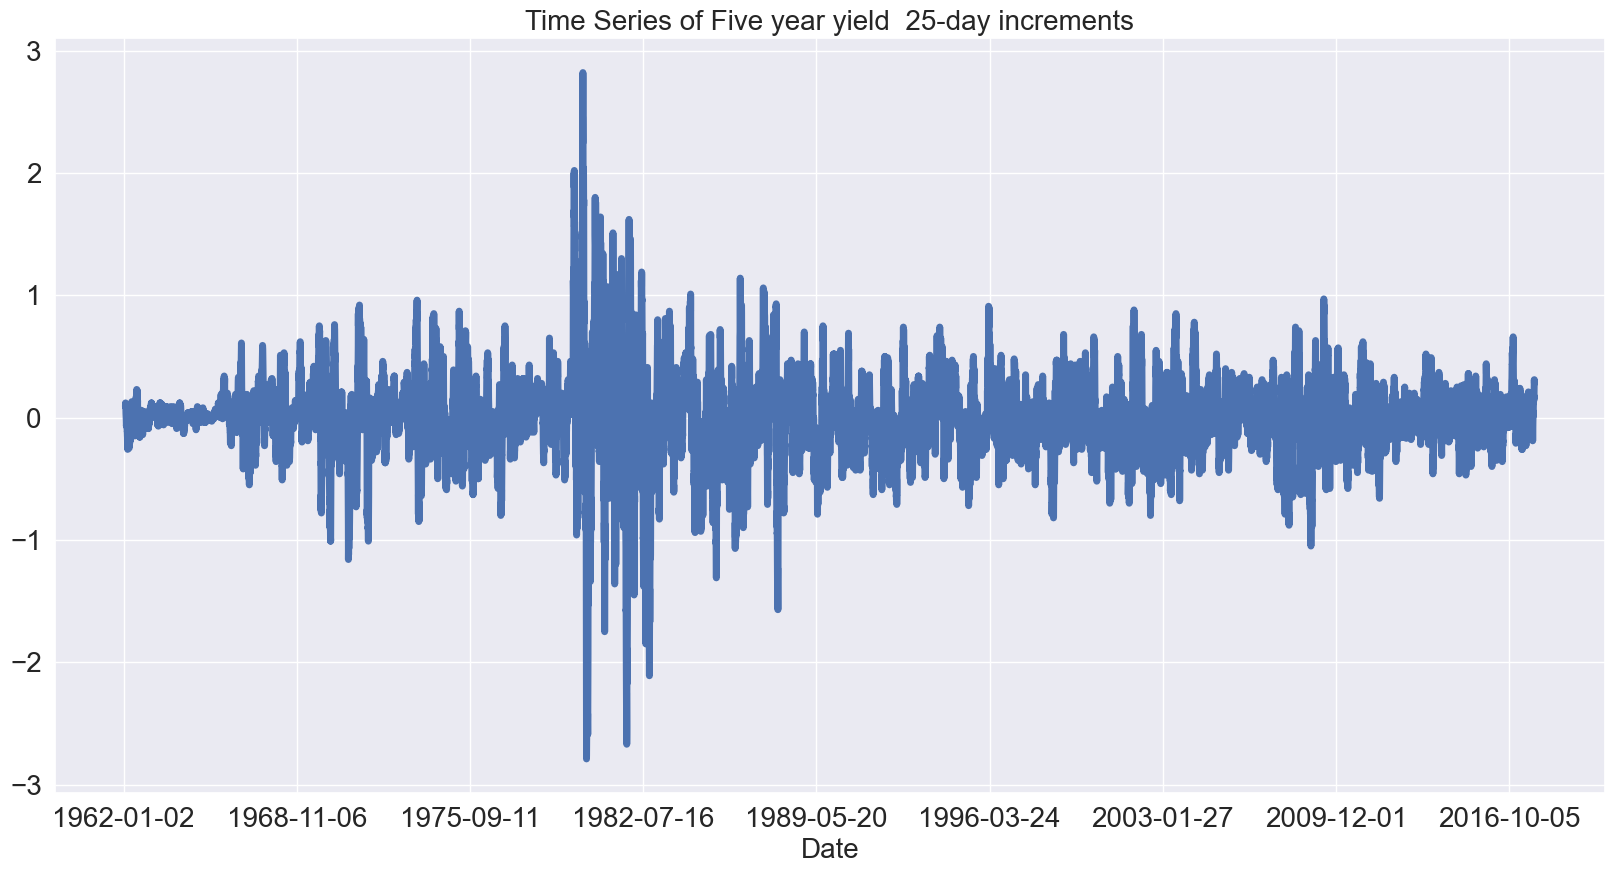

In [698]:
Fiveyear_day_25.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of Five year yield  25-day increments', fontsize=20);

# 10 Year Yield 1-day and 25-day increments and Time Series

In [990]:
Tenyear_day_1 = yield_data["10 Year_yield"].diff(periods=1)
Tenyear_day_1

1962-01-02     NaN
1962-01-03   -0.03
1962-01-04   -0.04
1962-01-05    0.03
1962-01-06    0.00
              ... 
2017-10-01    0.00
2017-10-02    0.01
2017-10-03   -0.01
2017-10-04    0.00
2017-10-05    0.02
Name: 10 Year_yield, Length: 20366, dtype: float64

In [991]:
Tenyear_day_25 = yield_data["10 Year_yield"].diff(periods=25)
Tenyear_day_25

1962-01-02     NaN
1962-01-03     NaN
1962-01-04     NaN
1962-01-05     NaN
1962-01-06     NaN
              ... 
2017-10-01    0.23
2017-10-02    0.29
2017-10-03    0.27
2017-10-04    0.27
2017-10-05    0.29
Name: 10 Year_yield, Length: 20366, dtype: float64

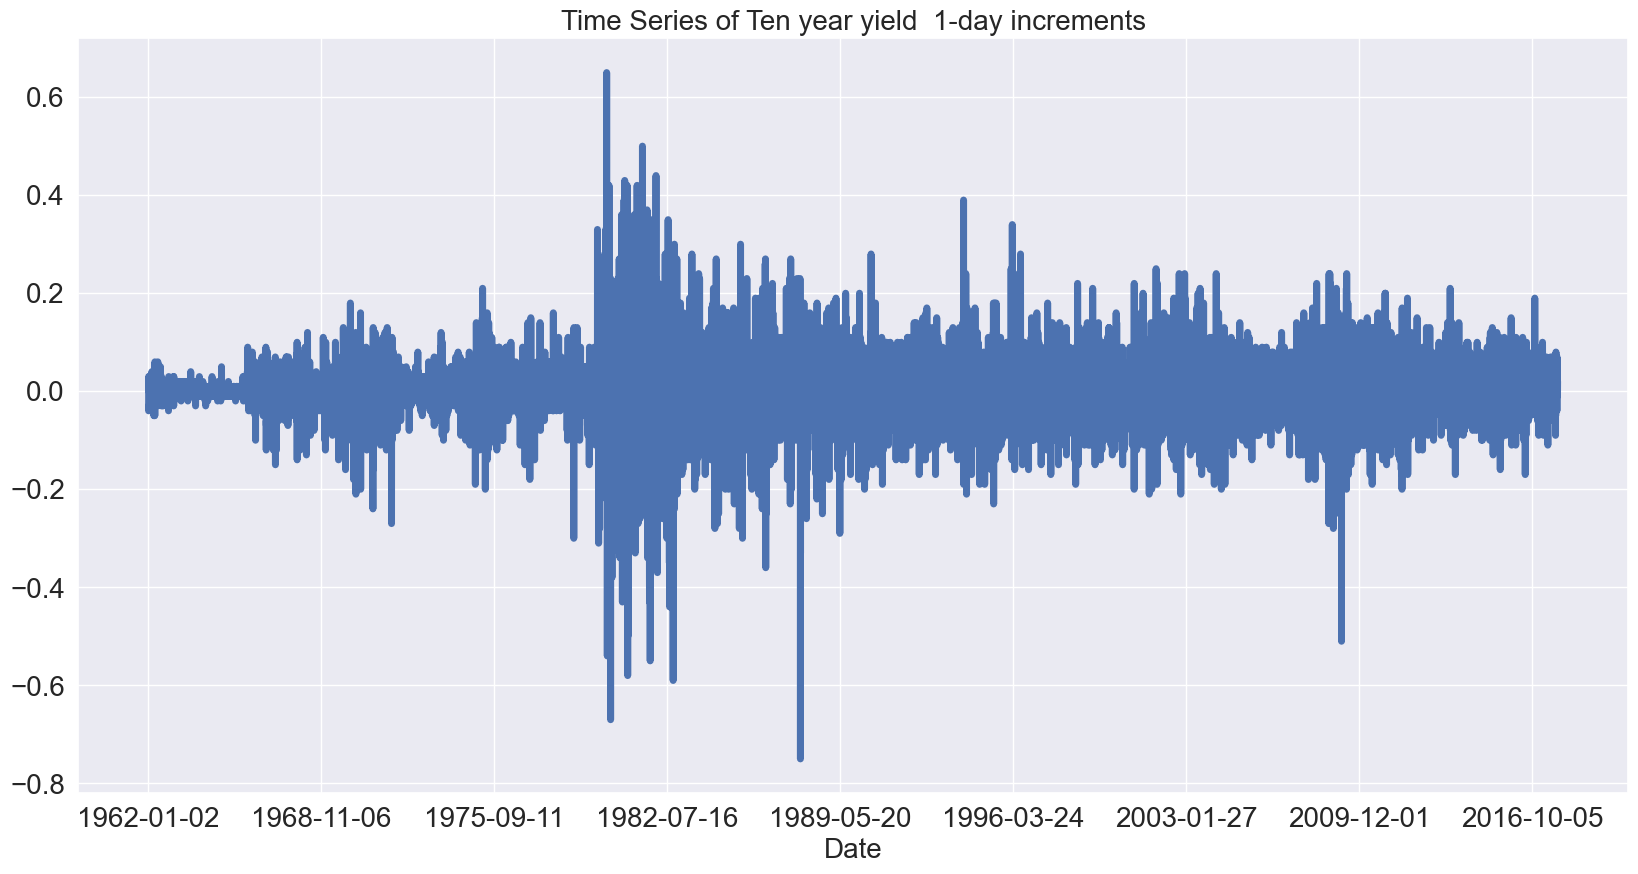

In [992]:
Tenyear_day_1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of Ten year yield  1-day increments', fontsize=20);

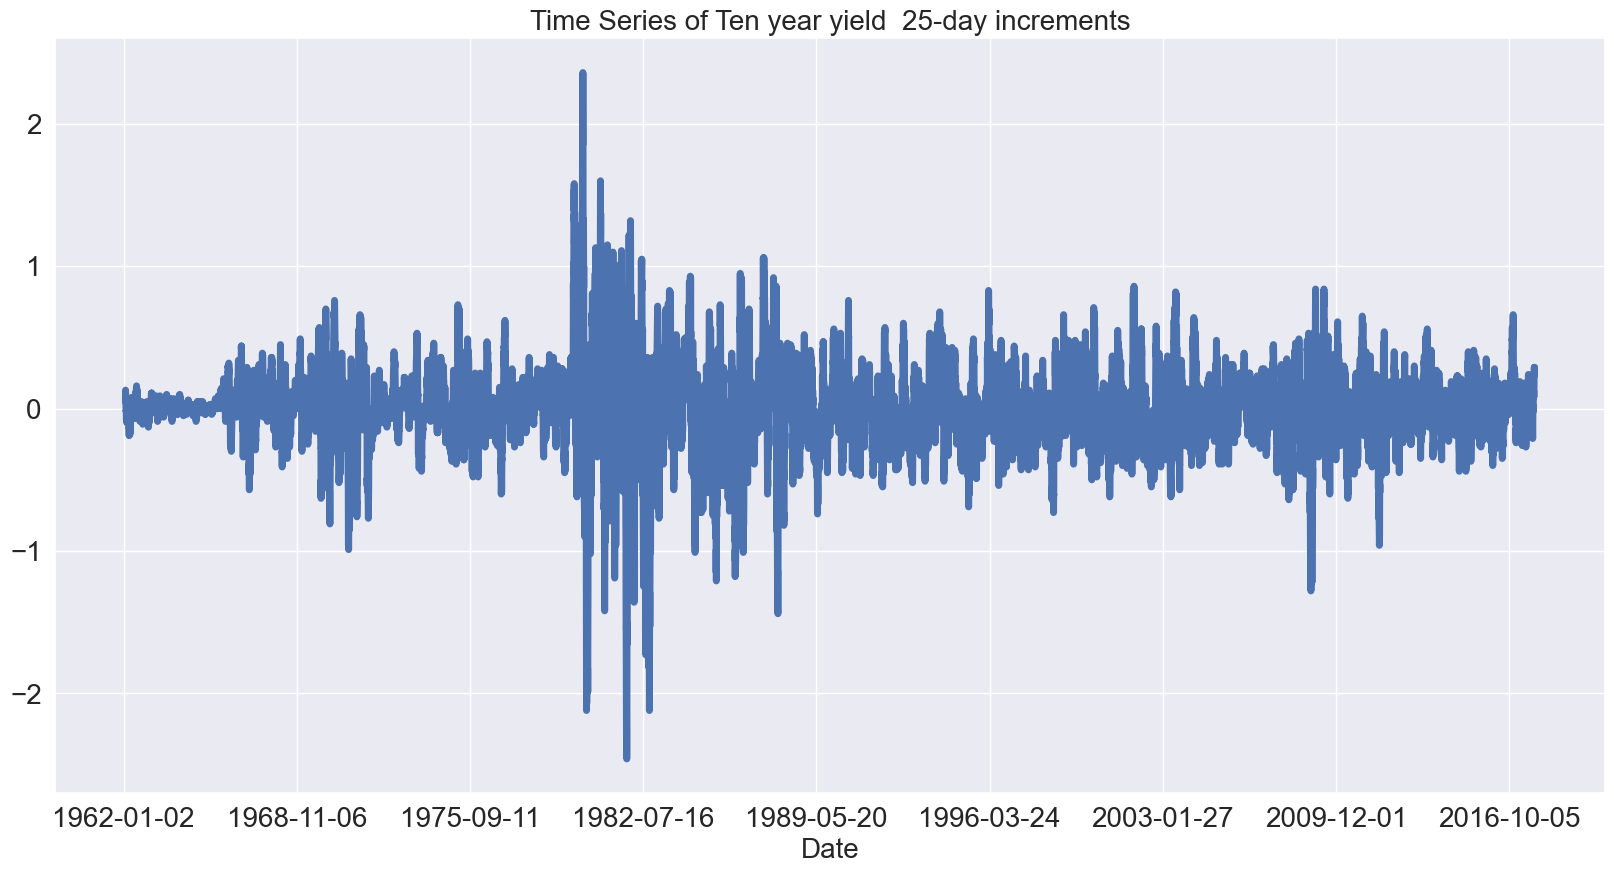

In [993]:
Tenyear_day_25.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Time Series of Ten year yield  25-day increments', fontsize=20);

# Histograms of the 1-day and 25-day increments

## 1 Year Yield 1-day and 25-day increments

C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'One day increment 1 Year Yield Histogram Plot')

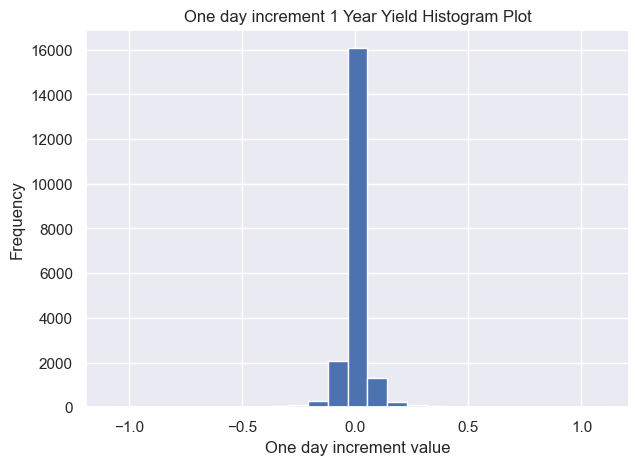

In [703]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Oneyear_day_1, bins=25)

plt.xlabel('One day increment value')
plt.ylabel('Frequency')
plt.title('One day increment 1 Year Yield Histogram Plot')

Text(0.5, 1.0, '25 day increment 1 Year Yield Histogram Plot')

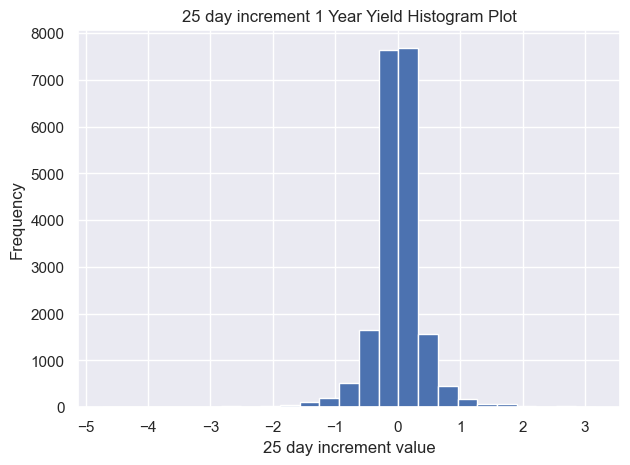

In [704]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Oneyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 1 Year Yield Histogram Plot')

## 3 Year Yield 1-day and 25-day increments

Text(0.5, 1.0, 'One day increment 3 Year Yield Histogram Plot')

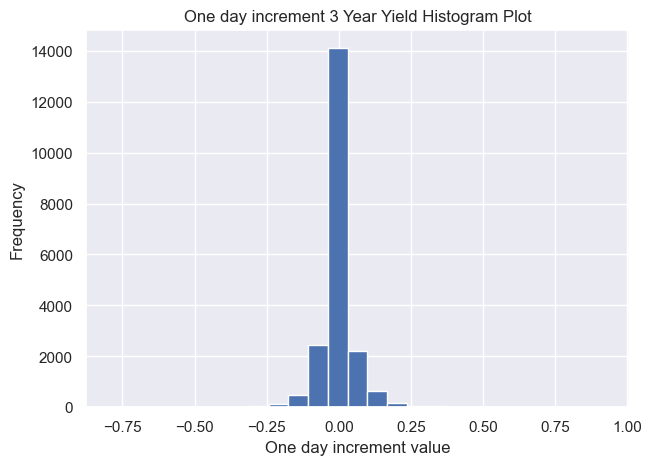

In [705]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Threeyear_day_1, bins=25)

plt.xlabel('One day increment value')
plt.ylabel('Frequency')
plt.title('One day increment 3 Year Yield Histogram Plot')

Text(0.5, 1.0, '25 day increment 3 Year Yield Histogram Plot')

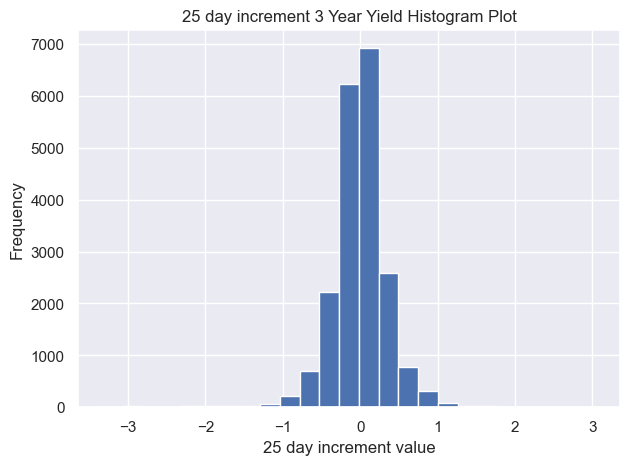

In [706]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Threeyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 3 Year Yield Histogram Plot')

## 5 Year Yield 1-day and 25-day increments

Text(0.5, 1.0, 'One day increment 5 Year Yield Histogram Plot')

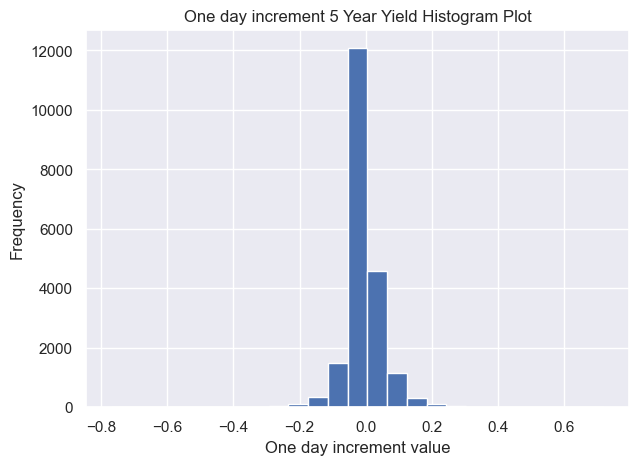

In [707]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Fiveyear_day_1, bins=25)

plt.xlabel('One day increment value')
plt.ylabel('Frequency')
plt.title('One day increment 5 Year Yield Histogram Plot')

Text(0.5, 1.0, '25 day increment 5 Year Yield Histogram Plot')

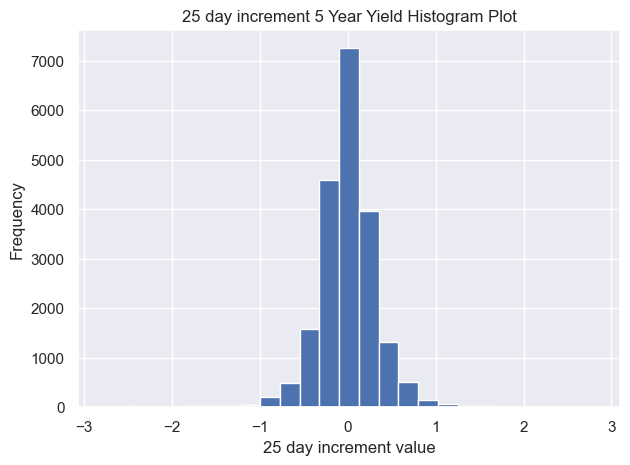

In [708]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Fiveyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 5 Year Yield Histogram Plot')

## 10 Year Yield 1-day and 25-day increments

C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'One day increment 10 Year Yield Histogram Plot')

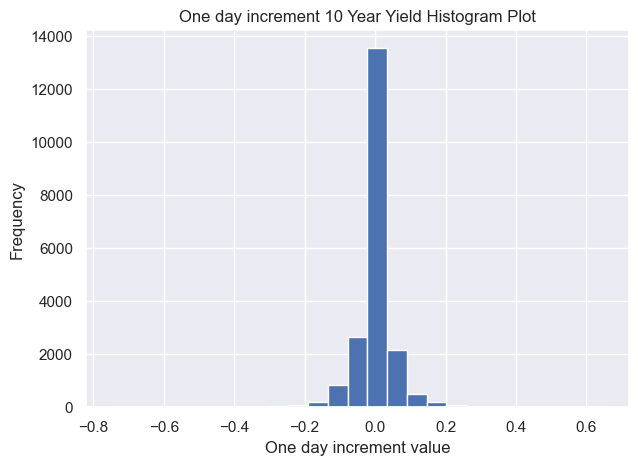

In [994]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Tenyear_day_1, bins=25)

plt.xlabel('One day increment value')
plt.ylabel('Frequency')
plt.title('One day increment 10 Year Yield Histogram Plot')

Text(0.5, 1.0, '25 day increment 10 Year Yield Histogram Plot')

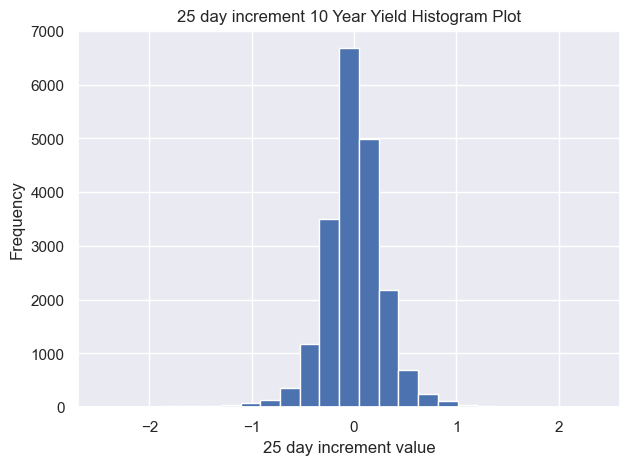

In [995]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Tenyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 10 Year Yield Histogram Plot')

# <hr style="border:1px solid gray"> </hr>

# Distribution Fitting 

In [711]:
from fitter import Fitter

## 1 Year Yield

Text(0.5, 1.0, '1 Year Yield Histogram Plot')

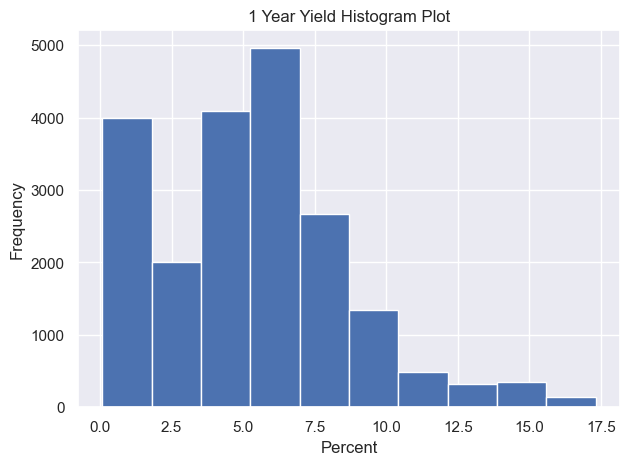

In [712]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["1 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('1 Year Yield Histogram Plot')

Text(0.5, 1.0, ' 1 year yield histogram and density plot')

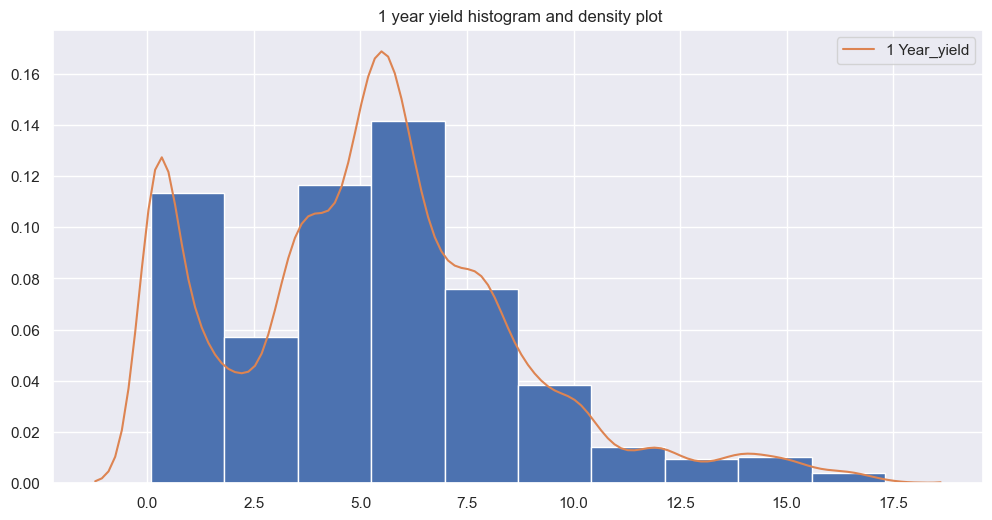

In [879]:
plt.figure(figsize=(12,6))
plt.hist(yield_data["1 Year_yield"], density=True)
sns.kdeplot(yield_data["1 Year_yield"])
plt.title(' 1 year yield histogram and density plot')

In [714]:
yield_data["1 Year_yield"].describe()

count    20366.000000
mean         5.219524
std          3.411029
min          0.080000
25%          3.060000
50%          5.280000
75%          7.090000
max         17.310000
Name: 1 Year_yield, dtype: float64

In [715]:
yield_data["1 Year_yield"].std()

3.4110289577961335

In [716]:
yield_data["1 Year_yield"].skew()

0.5781311353482217

In [717]:
yield_data["1 Year_yield"].kurt()

0.49349776562595427

C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'One day increment 1 Year Yield Histogram Plot')

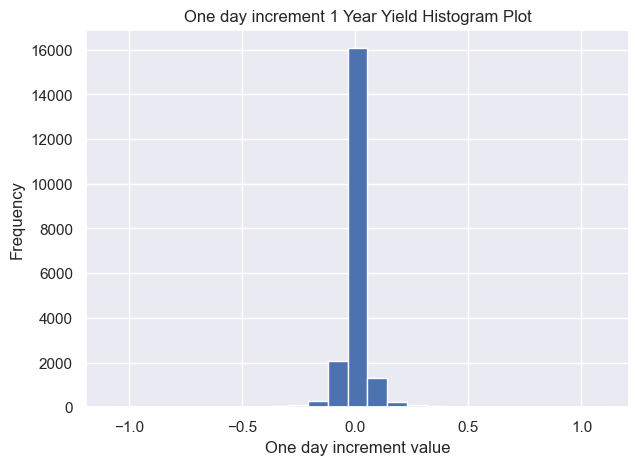

In [718]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Oneyear_day_1, bins=25)

plt.xlabel('One day increment value')
plt.ylabel('Frequency')
plt.title('One day increment 1 Year Yield Histogram Plot')

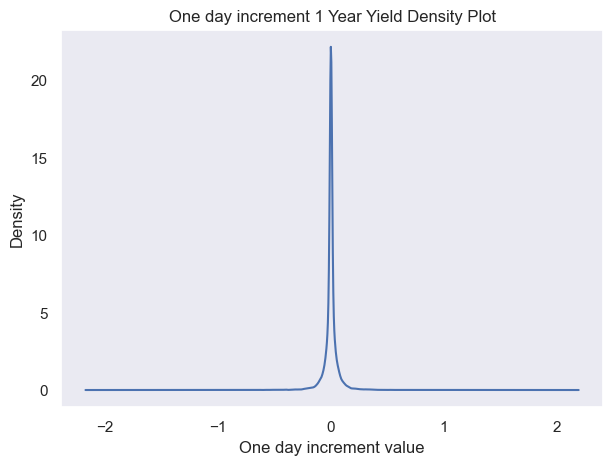

In [719]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Oneyear_day_1.plot(kind='kde')
plt.xlabel('One day increment value')
plt.title('One day increment 1 Year Yield Density Plot')
plt.grid()

Looks like normal distribution but we need to find it

Removing nan values from Oneyear_day_1


In [883]:
Oneyear_day_1 = Oneyear_day_1[~np.isnan(Oneyear_day_1)]

In [884]:
Oneyear_day_1.describe()

count    20365.000000
mean        -0.000092
std          0.068469
min         -1.080000
25%         -0.010000
50%          0.000000
75%          0.010000
max          1.100000
Name: 1 Year_yield, dtype: float64

In [885]:
Oneyear_day_1.std()

0.06846914904456435

In [886]:
Oneyear_day_1.skew()

-0.2473203539157774

In [887]:
Oneyear_day_1.kurt()

39.97873578963211

In [888]:
params_n = sp.stats.norm.fit(Oneyear_day_1)
params_n

(-9.182420820034369e-05, 0.06846746797435323)

In [889]:
params_log = sp.stats.logistic.fit(Oneyear_day_1)
params_log

(8.780033097033411e-05, 0.025059021989751906)

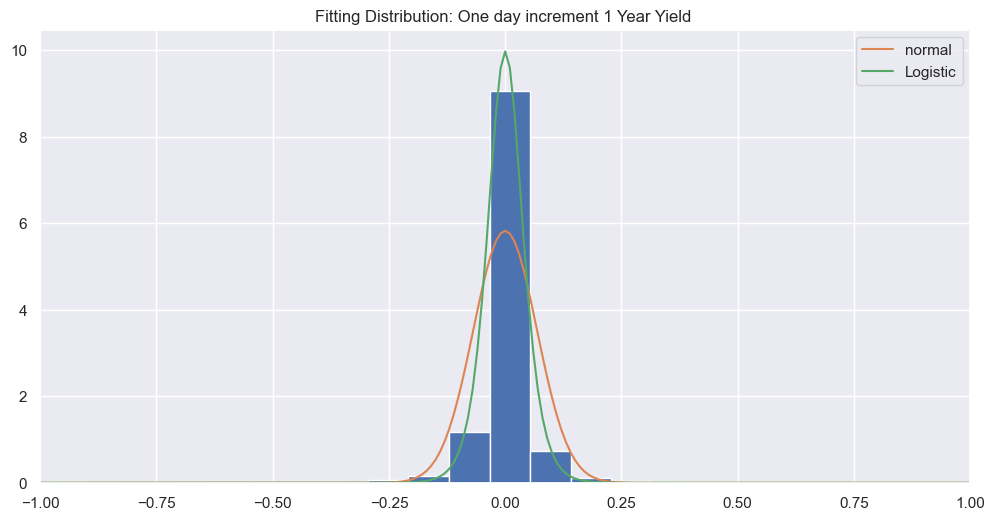

In [890]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)
plt.figure(figsize=(12,6))
plt.hist(Oneyear_day_1,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: One day increment 1 Year Yield ')
plt.legend()

In [728]:
LLH_n = norm.logpdf(Oneyear_day_1).sum()
LLH_log = log.logpdf(Oneyear_day_1).sum()



print (LLH_n, LLH_log)

25709.95785023133 32111.133702258252


In [729]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

-51415.91570046266 -64218.267404516504


In [730]:
N =len(Oneyear_day_1)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

-51400.0725544225 -64202.42425847634


C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, '25 day increment 1 Year Yield Histogram Plot')

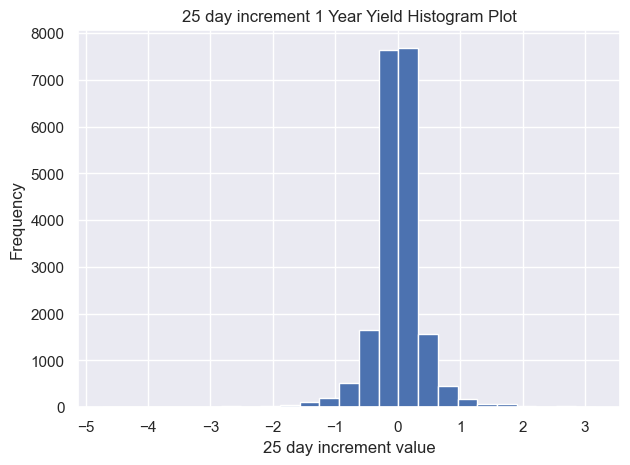

In [731]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Oneyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 1 Year Yield Histogram Plot')

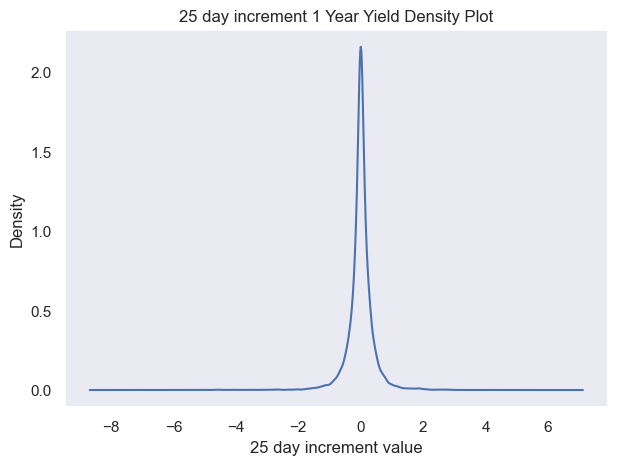

In [732]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Oneyear_day_25.plot(kind='kde')
plt.xlabel('25 day increment value')
plt.title('25 day increment 1 Year Yield Density Plot')
plt.grid()

Removing nan values from Oneyear_day_25

In [891]:
Oneyear_day_25 = Oneyear_day_25[~np.isnan(Oneyear_day_25)]

In [892]:
Oneyear_day_25.describe()

count    20341.000000
mean        -0.002427
std          0.437109
min         -4.730000
25%         -0.130000
50%          0.000000
75%          0.140000
max          3.170000
Name: 1 Year_yield, dtype: float64

In [893]:
Oneyear_day_25.std()

0.4371092733782426

In [894]:
Oneyear_day_25.skew()

-1.3078547186211578

In [895]:
Oneyear_day_25.kurt()

19.529524233984475

In [896]:
params_n = sp.stats.norm.fit(Oneyear_day_25)
params_n

(-0.0024271176441669523, 0.43709852870870775)

In [897]:
params_log = sp.stats.logistic.fit(Oneyear_day_25)
params_log

(0.004716003262677579, 0.1888853299832551)

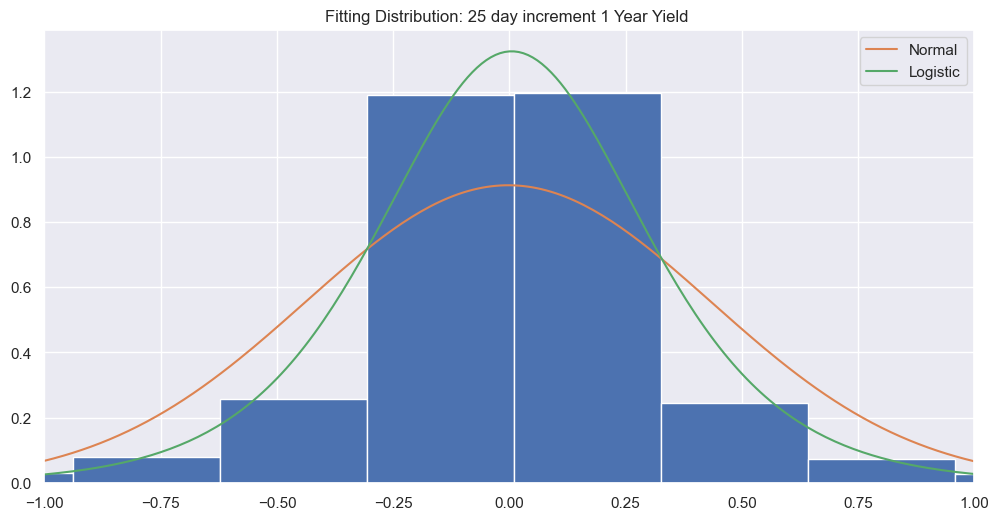

In [898]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Oneyear_day_25,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="Normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 25 day increment 1 Year Yield ')

plt.legend()

In [899]:
LLH_n = norm.logpdf(Oneyear_day_25).sum()
LLH_log = log.logpdf(Oneyear_day_25).sum()



print (LLH_n, LLH_log)

-12028.485385651511 -8116.213520813814


In [900]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log





print(aic_n, aic_log)

24060.970771303022 16236.427041627629


In [901]:
N =len(Oneyear_day_25)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

24076.811558968227 16252.267829292834


## 3 Year Yield

Text(0.5, 1.0, '3 Year Yield Histogram Plot')

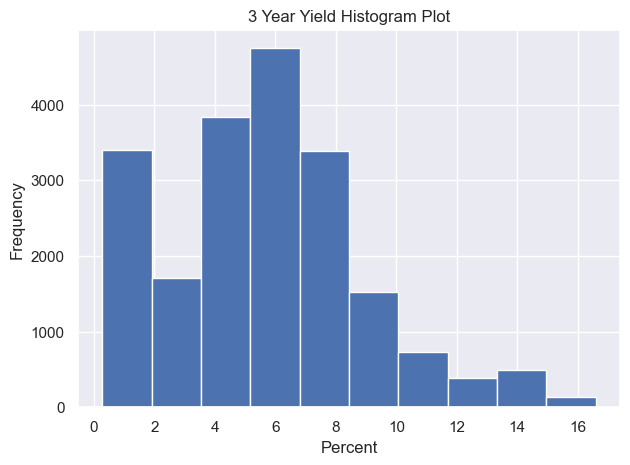

In [744]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["3 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('3 Year Yield Histogram Plot')

Text(0.5, 1.0, ' 3 year yield histogram and density plot')

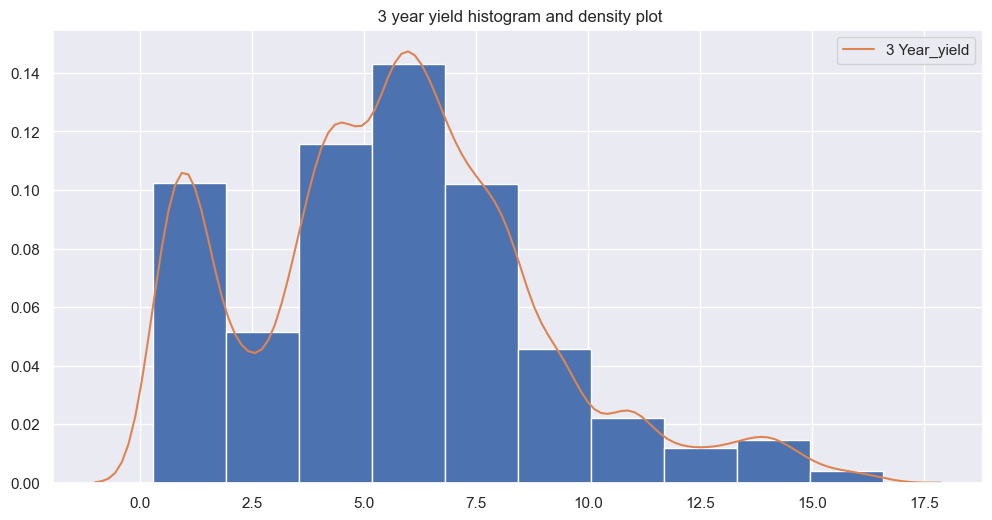

In [880]:
plt.figure(figsize=(12,6))
plt.hist(yield_data["3 Year_yield"], density=True)
sns.kdeplot(yield_data["3 Year_yield"])
plt.title(' 3 year yield histogram and density plot')

In [746]:
yield_data["3 Year_yield"].describe()

count    20366.000000
mean         5.649806
std          3.258169
min          0.280000
25%          3.530000
50%          5.650000
75%          7.500000
max         16.590000
Name: 3 Year_yield, dtype: float64

In [747]:
yield_data["3 Year_yield"].std()

3.2581687051569754

In [748]:
yield_data["3 Year_yield"].skew()

0.5063082742456305

In [749]:
yield_data["3 Year_yield"].kurt()

0.2636463186770448

C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'One day increment Three Year Yield Histogram Plot')

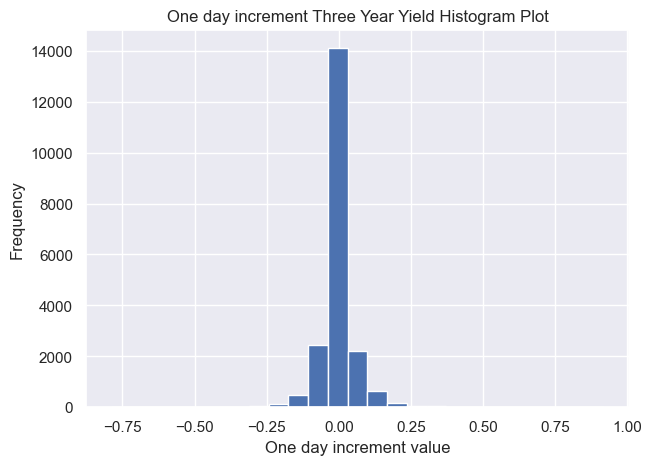

In [750]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Threeyear_day_1, bins=25)

plt.xlabel('One day increment value')
plt.ylabel('Frequency')
plt.title('One day increment Three Year Yield Histogram Plot')

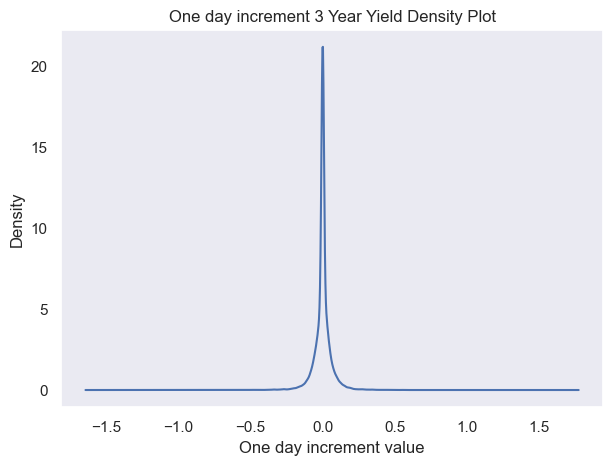

In [751]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Threeyear_day_1.plot(kind='kde')
plt.xlabel('One day increment value')
plt.title('One day increment 3 Year Yield Density Plot')
plt.grid()

Removing nan values from Threeyear_day_1

In [902]:
Threeyear_day_1 = Threeyear_day_1[~np.isnan(Threeyear_day_1)]

In [903]:
Threeyear_day_1.describe()

count    20365.000000
mean        -0.000102
std          0.062521
min         -0.790000
25%         -0.010000
50%          0.000000
75%          0.010000
max          0.920000
Name: 3 Year_yield, dtype: float64

In [904]:
Threeyear_day_1.std()

0.06252113749612888

In [905]:
Threeyear_day_1.skew()

-0.22841114053815628

In [906]:
Threeyear_day_1.kurt()

22.36747326276061

In [907]:
params_n = sp.stats.norm.fit(Threeyear_day_1)
params_n

(-0.00010164497913086179, 0.0625196024628563)

In [908]:
params_log = sp.stats.logistic.fit(Threeyear_day_1)
params_log

(8.598212634959167e-05, 0.026313985221695407)

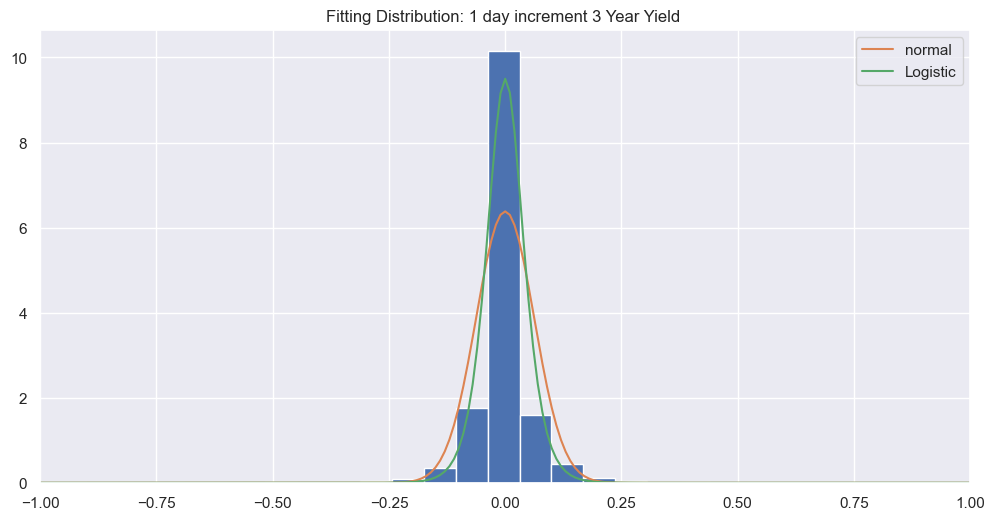

In [909]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Threeyear_day_1,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 1 day increment 3 Year Yield ')
plt.legend()

In [910]:
LLH_n = norm.logpdf(Threeyear_day_1).sum()
LLH_log = log.logpdf(Threeyear_day_1).sum()



print (LLH_n, LLH_log)

27560.69983464274 31757.59111922737


In [911]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

-55117.39966928548 -63511.18223845474


In [912]:
N =len(Threeyear_day_1)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

-55101.556523245315 -63495.33909241458


Text(0.5, 1.0, '25 day increment 3 Year Yield Histogram Plot')

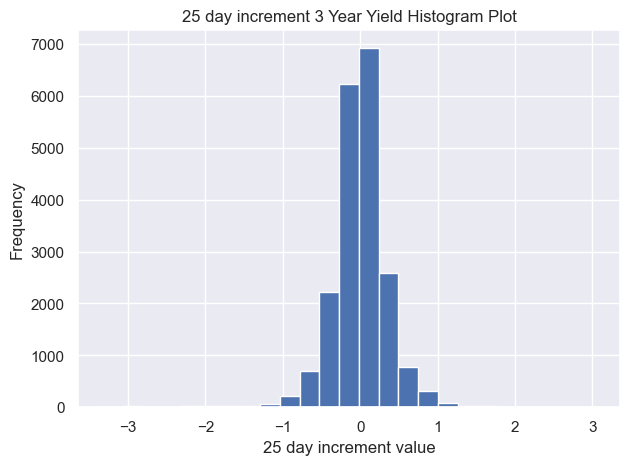

In [913]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Threeyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 3 Year Yield Histogram Plot')

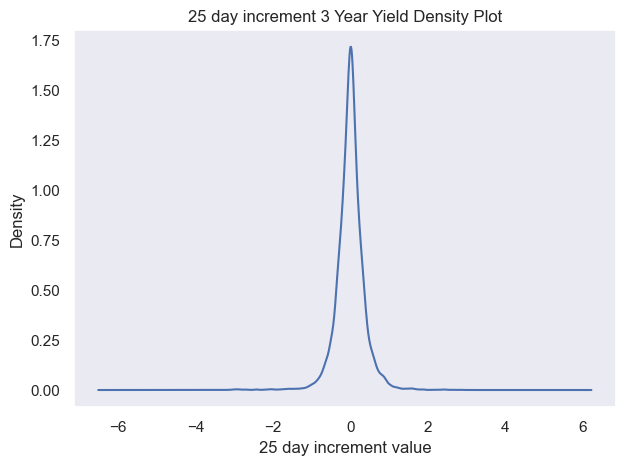

In [914]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Threeyear_day_25.plot(kind='kde')
plt.xlabel('25 day increment value')
plt.title('25 day increment 3 Year Yield Density Plot')
plt.grid()

In [915]:
Threeyear_day_25 = Threeyear_day_25[~np.isnan(Threeyear_day_25)]

In [916]:
Threeyear_day_25.describe()

count    20341.000000
mean        -0.002689
std          0.374288
min         -3.330000
25%         -0.170000
50%          0.000000
75%          0.170000
max          3.040000
Name: 3 Year_yield, dtype: float64

In [917]:
Threeyear_day_25.std()

0.3742881479212539

In [918]:
Threeyear_day_25.skew()

-0.5291047889095896

In [919]:
Threeyear_day_25.kurt()

10.528604556615338

In [920]:
params_n = sp.stats.norm.fit(Threeyear_day_25)
params_n

(-0.0026891499926257334, 0.3742789474702179)

In [921]:
params_log = sp.stats.logistic.fit(Threeyear_day_25)
params_log

(-0.0009078853743361647, 0.18230811335163055)

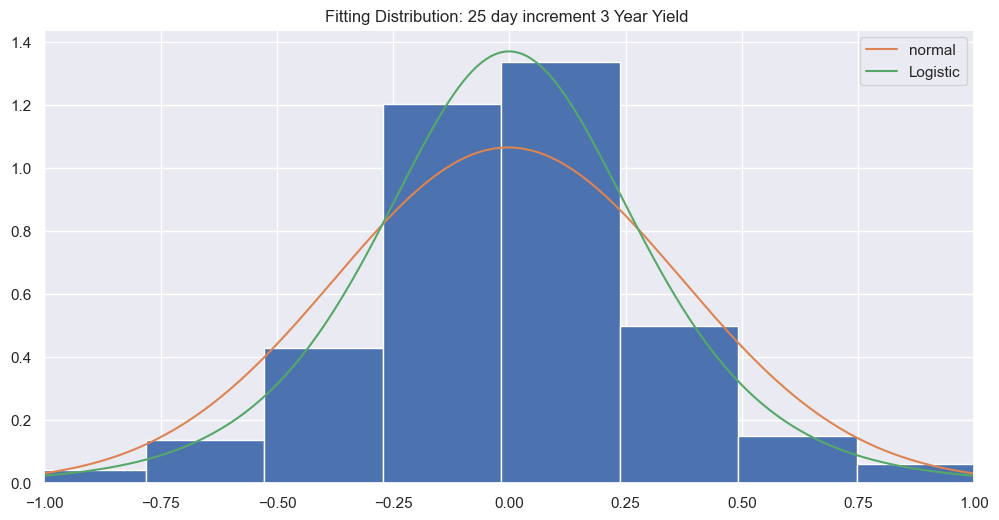

In [922]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Threeyear_day_25,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 25 day increment 3 Year Yield ')
plt.legend()

In [923]:
LLH_n = norm.logpdf(Threeyear_day_25).sum()
LLH_log = log.logpdf(Threeyear_day_25).sum()



print (LLH_n, LLH_log)

-8872.431405883764 -6691.066712869067


In [924]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

17748.86281176753 13386.133425738133


In [925]:
N =len(Threeyear_day_25)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

17764.703599432734 13401.974213403339


# 5 Year Yield

Text(0.5, 1.0, '5 Year Yield Histogram Plot')

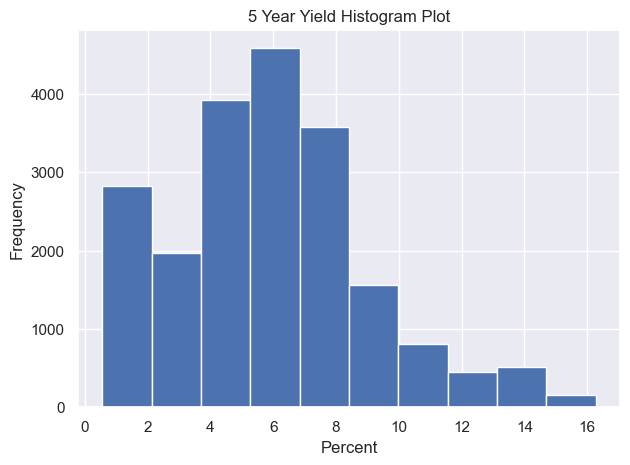

In [926]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["5 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('5 Year Yield Histogram Plot')

Text(0.5, 1.0, ' 5 year yield histogram and density plot')

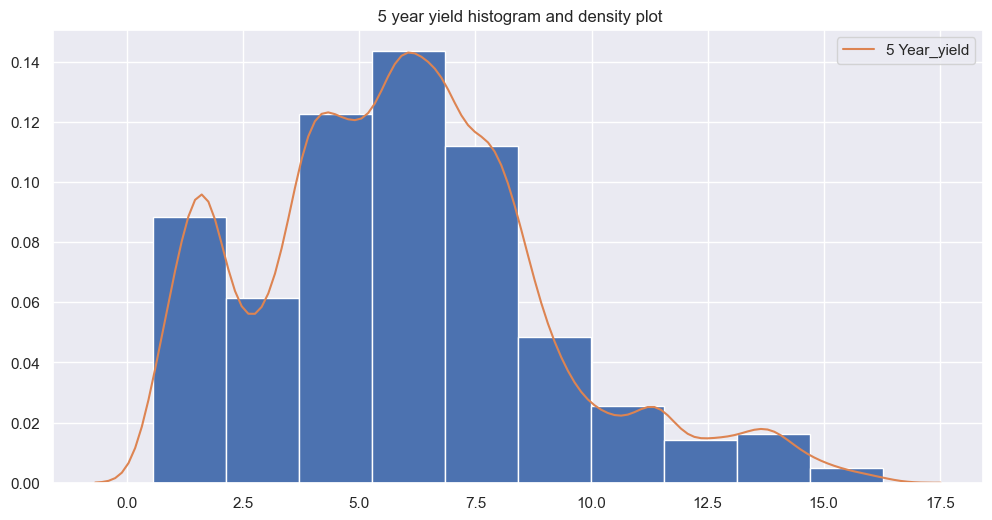

In [927]:
plt.figure(figsize=(12,6))
plt.hist(yield_data["5 Year_yield"], density=True)
sns.kdeplot(yield_data["5 Year_yield"])
plt.title(' 5 year yield histogram and density plot')

In [928]:
yield_data["5 Year_yield"].describe()

count    20366.000000
mean         5.921859
std          3.098484
min          0.560000
25%          3.860000
50%          5.820000
75%          7.720000
max         16.270000
Name: 5 Year_yield, dtype: float64

In [929]:
yield_data["5 Year_yield"].std()

3.0984841578669697

In [930]:
yield_data["5 Year_yield"].skew()

0.5710754832733306

In [931]:
yield_data["5 Year_yield"].kurt()

0.29201462408515777

Text(0.5, 1.0, '1 day increment 5 Year Yield Histogram Plot')

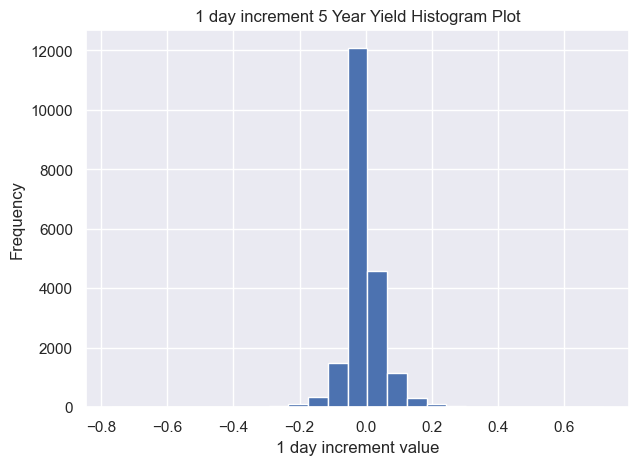

In [932]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Fiveyear_day_1, bins=25)

plt.xlabel('1 day increment value')
plt.ylabel('Frequency')
plt.title('1 day increment 5 Year Yield Histogram Plot')

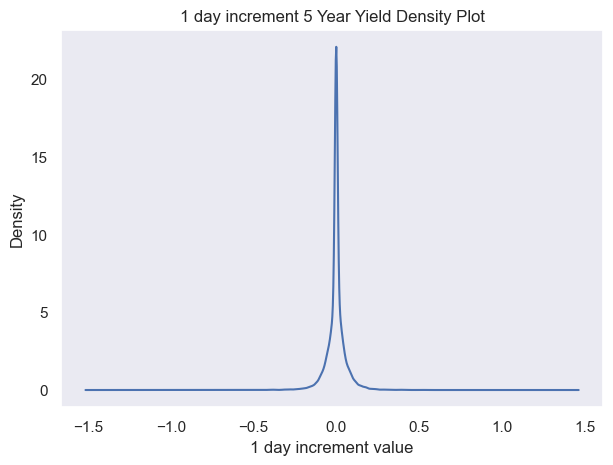

In [933]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Fiveyear_day_1.plot(kind='kde')
plt.xlabel('1 day increment value')
plt.title('1 day increment 5 Year Yield Density Plot')
plt.grid()

In [934]:
Fiveyear_day_1 = Fiveyear_day_1[~np.isnan(Fiveyear_day_1)]

In [935]:
Fiveyear_day_1.describe()

count    20365.000000
mean        -0.000095
std          0.060016
min         -0.770000
25%         -0.010000
50%          0.000000
75%          0.010000
max          0.720000
Name: 5 Year_yield, dtype: float64

In [936]:
Fiveyear_day_1.std()

0.060016127273733295

In [937]:
Fiveyear_day_1.skew()

-0.34998021601596496

In [938]:
Fiveyear_day_1.kurt()

17.86446168191661

In [939]:
params_n = sp.stats.norm.fit(Fiveyear_day_1)
params_n

(-9.5261478026025e-05, 0.06001465374405068)

In [940]:
params_log = sp.stats.logistic.fit(Fiveyear_day_1)
params_log

(2.5204498987949787e-05, 0.026113289230756988)

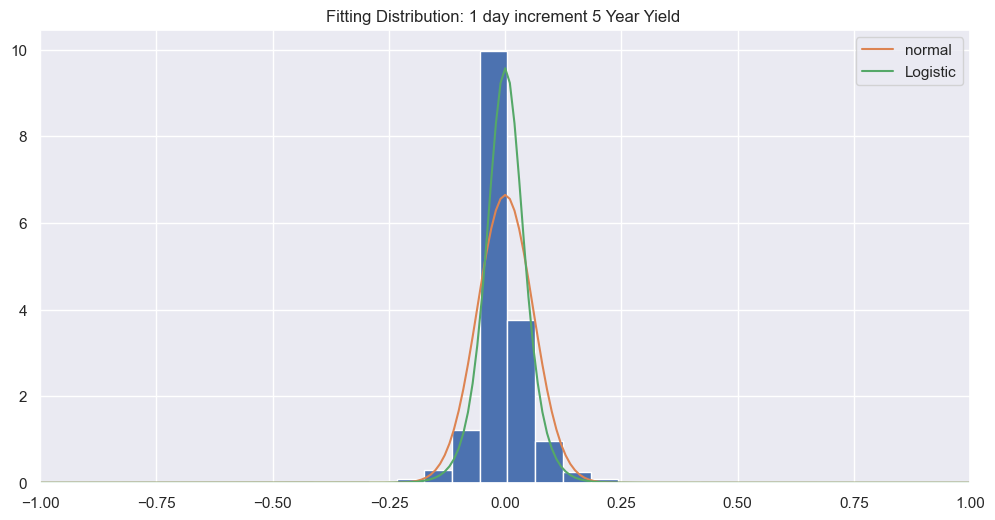

In [941]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Fiveyear_day_1,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 1 day increment 5 Year Yield ')
plt.legend()

In [942]:
LLH_n = norm.logpdf(Fiveyear_day_1).sum()
LLH_log = log.logpdf(Fiveyear_day_1).sum()



print (LLH_n, LLH_log)

28393.452900410346 32037.58174073342


In [943]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

-56782.90580082069 -64071.16348146684


In [944]:
N =len(Fiveyear_day_1)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

-56767.06265478053 -64055.32033542668


Text(0.5, 1.0, '25 day increment 5 Year Yield Histogram Plot')

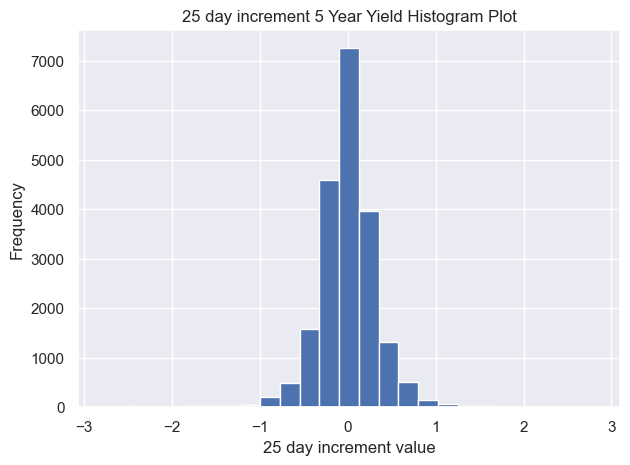

In [945]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Fiveyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 5 Year Yield Histogram Plot')

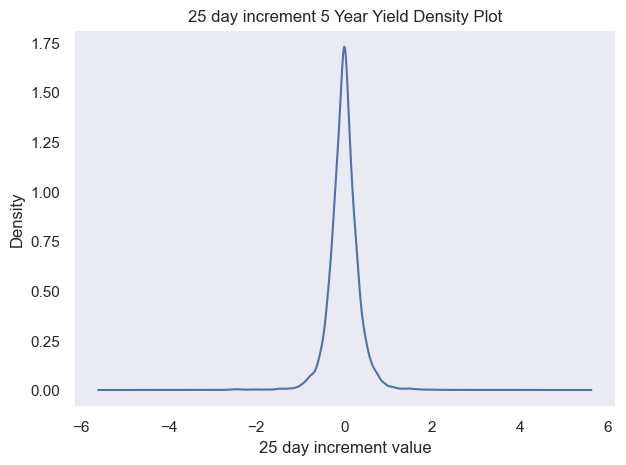

In [946]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Fiveyear_day_25.plot(kind='kde')
plt.xlabel('25 day increment value')
plt.title('25 day increment 5 Year Yield Density Plot')
plt.grid()

In [947]:
Fiveyear_day_25 = Fiveyear_day_25[~np.isnan(Fiveyear_day_25)]

In [948]:
Fiveyear_day_25.describe()

count    20341.000000
mean        -0.002543
std          0.345874
min         -2.790000
25%         -0.170000
50%          0.000000
75%          0.170000
max          2.820000
Name: 5 Year_yield, dtype: float64

In [949]:
Fiveyear_day_25.std()

0.34587353559520995

In [950]:
Fiveyear_day_25.skew()

-0.3816097717195928

In [951]:
Fiveyear_day_25.kurt()

7.966165317055925

In [952]:
params_n = sp.stats.norm.fit(Fiveyear_day_25)
params_n

(-0.002543139472002358, 0.34586503360939835)

In [953]:
params_log = sp.stats.logistic.fit(Fiveyear_day_25)
params_log

(-0.0012146324396211643, 0.17276043076118675)

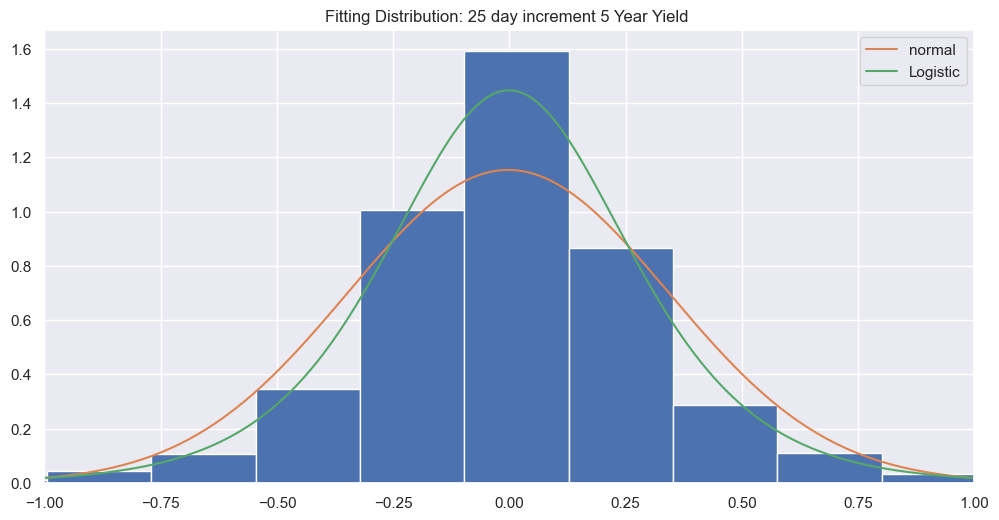

In [954]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Fiveyear_day_25,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 25 day increment 5 Year Yield ')
plt.legend()

In [955]:
LLH_n = norm.logpdf(Fiveyear_day_25).sum()
LLH_log = log.logpdf(Fiveyear_day_25).sum()



print (LLH_n, LLH_log)

-7266.453608171489 -5480.066502203481


In [956]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

14536.907216342977 10964.133004406962


In [957]:
N =len(Fiveyear_day_25)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

14552.748004008183 10979.973792072167


# 10 Year Yield

Text(0.5, 1.0, '10 Year Yield Histogram Plot')

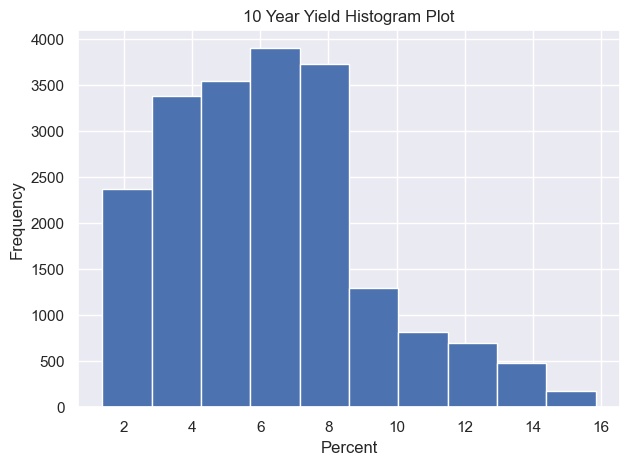

In [996]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(yield_data["10 Year_yield"])

plt.xlabel('Percent')
plt.ylabel('Frequency')
plt.title('10 Year Yield Histogram Plot')

Text(0.5, 1.0, ' 10 year yield histogram and density plot')

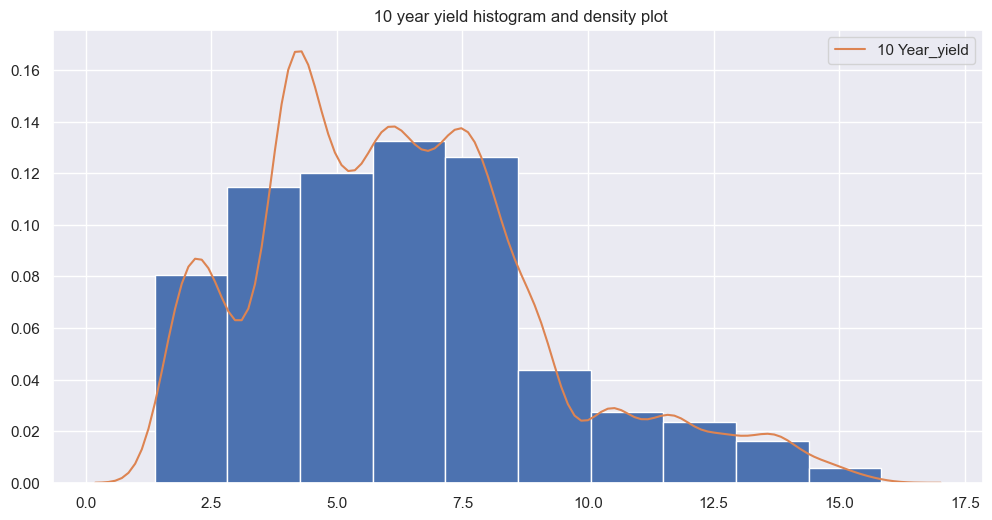

In [997]:
plt.figure(figsize=(12,6))
plt.hist(yield_data["10 Year_yield"], density=True)
sns.kdeplot(yield_data["10 Year_yield"])
plt.title(' 10 year yield histogram and density plot')

In [998]:
yield_data["10 Year_yield"].describe()

count    20366.000000
mean         6.264055
std          2.861167
min          1.370000
25%          4.190000
50%          6.020000
75%          7.840000
max         15.840000
Name: 10 Year_yield, dtype: float64

In [999]:
yield_data["10 Year_yield"].std()

2.861166625498778

In [1000]:
yield_data["10 Year_yield"].skew()

0.7105748616001827

In [1001]:
yield_data["10 Year_yield"].kurt()

0.343992988639374

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Tenyear_day_1, bins=25)

plt.xlabel('1 day increment value')
plt.ylabel('Frequency')
plt.title('1 day increment 10 Year Yield Histogram Plot')

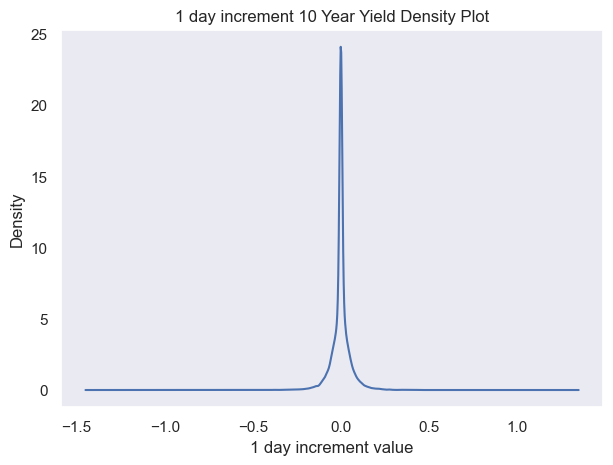

In [1003]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Tenyear_day_1.plot(kind='kde')
plt.xlabel('1 day increment value')
plt.title('1 day increment 10 Year Yield Density Plot')
plt.grid()

In [1004]:
Tenyear_day_1 = Tenyear_day_1[~np.isnan(Tenyear_day_1)]

In [1005]:
Tenyear_day_1.describe()

count    20365.000000
mean        -0.000084
std          0.054727
min         -0.750000
25%         -0.010000
50%          0.000000
75%          0.010000
max          0.650000
Name: 10 Year_yield, dtype: float64

In [1006]:
Tenyear_day_1.std()

0.054727300425615175

In [1007]:
Tenyear_day_1.skew()

-0.3171959849376095

In [1008]:
Tenyear_day_1.kurt()

15.240017946084448

In [1009]:
params_n = sp.stats.norm.fit(Tenyear_day_1)
params_n

(-8.396759145592923e-05, 0.054725956748410555)

In [1010]:
params_log = sp.stats.logistic.fit(Tenyear_day_1)
params_log

(-0.0001017779047999018, 0.02416117290400547)

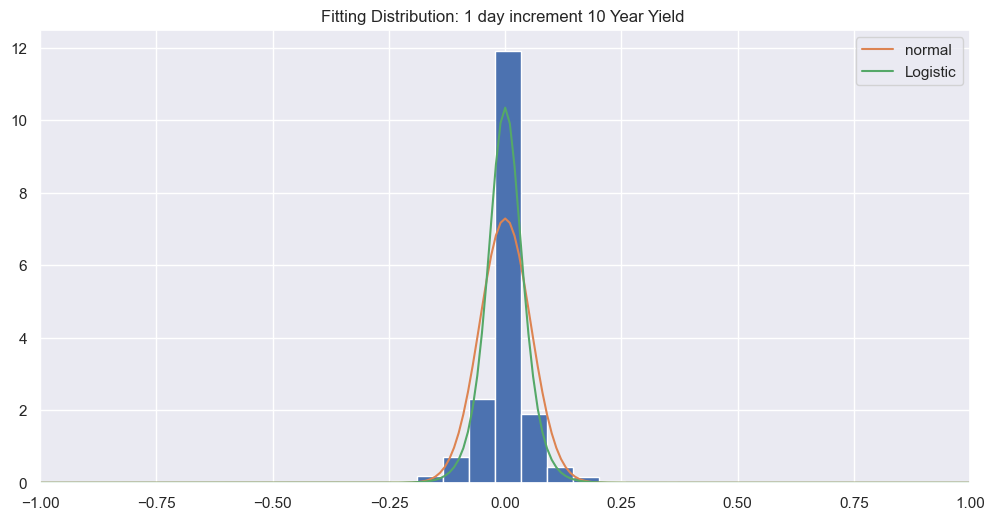

In [1011]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Tenyear_day_1,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 1 day increment 10 Year Yield ')
plt.legend()

In [1012]:
LLH_n = norm.logpdf(Tenyear_day_1).sum()
LLH_log = log.logpdf(Tenyear_day_1).sum()



print (LLH_n, LLH_log)

30272.137089814052 33652.241151423405


In [1013]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

-60540.274179628104 -67300.48230284681


In [1014]:
N =len(Tenyear_day_1)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

-60524.43103358794 -67284.63915680665


C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Keeru\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, '25 day increment 10 Year Yield Histogram Plot')

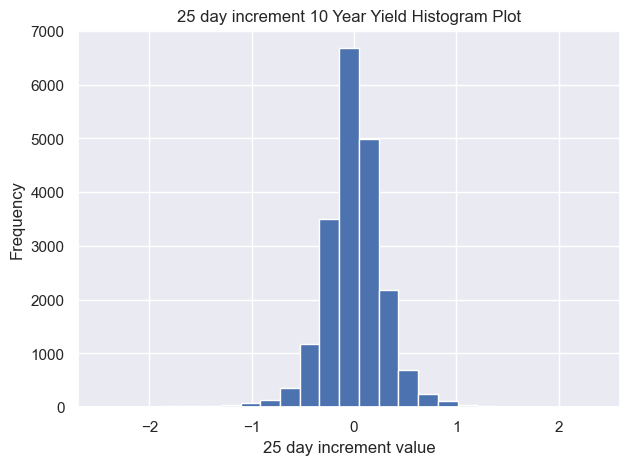

In [1015]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(Tenyear_day_25, bins=25)

plt.xlabel('25 day increment value')
plt.ylabel('Frequency')
plt.title('25 day increment 10 Year Yield Histogram Plot')

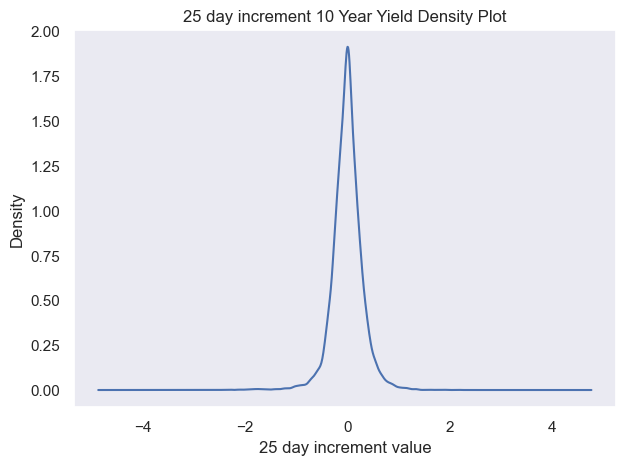

In [1016]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Tenyear_day_25.plot(kind='kde')
plt.xlabel('25 day increment value')
plt.title('25 day increment 10 Year Yield Density Plot')
plt.grid()

In [1017]:
Tenyear_day_25 = Tenyear_day_25[~np.isnan(Tenyear_day_25)]

In [1018]:
Tenyear_day_25.describe()

count    20341.000000
mean        -0.002231
std          0.301641
min         -2.460000
25%         -0.150000
50%          0.000000
75%          0.150000
max          2.360000
Name: 10 Year_yield, dtype: float64

In [1019]:
Tenyear_day_25.std()

0.30164050101778955

In [1020]:
Tenyear_day_25.skew()

-0.48285064046110704

In [1021]:
Tenyear_day_25.kurt()

6.626365243056144

In [1022]:
params_n = sp.stats.norm.fit(Tenyear_day_25)
params_n

(-0.002231453714173345, 0.3016330863329723)

In [1023]:
params_log = sp.stats.logistic.fit(Tenyear_day_25)
params_log

(-0.0004640802155846128, 0.15282549275327473)

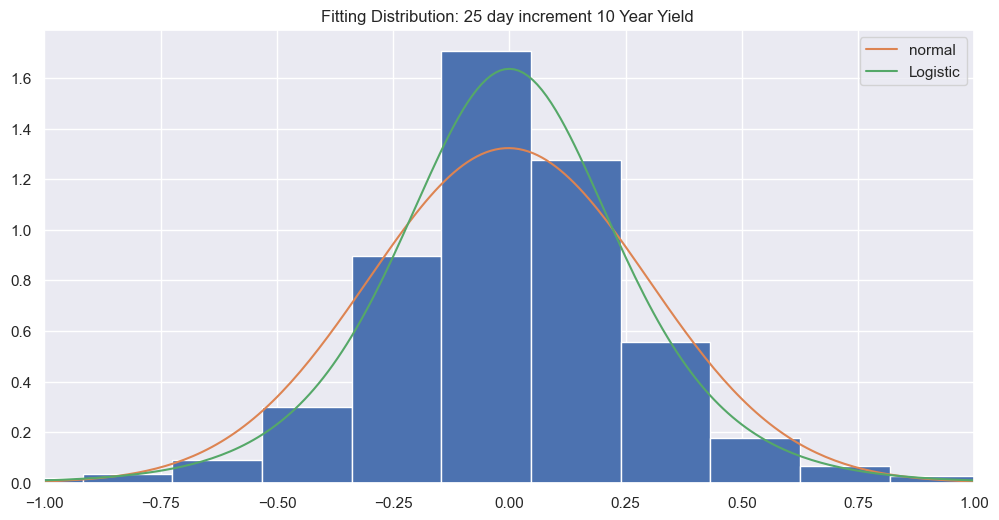

In [1024]:
x = np.arange(-5, 10, 0.01)
norm = sp.stats.norm(*params_n)
log= sp.stats.logistic(*params_log)



plt.figure(figsize=(12,6))
plt.hist(Tenyear_day_25,bins=25, density=True)
plt.plot(x, norm.pdf(x), label="normal")
plt.plot(x, log.pdf(x), label="Logistic")
plt.xlim(-1,1)
plt.title('Fitting Distribution: 25 day increment 10 Year Yield ')
plt.legend()

In [1025]:
LLH_n = norm.logpdf(Tenyear_day_25).sum()
LLH_log = log.logpdf(Tenyear_day_25).sum()



print (LLH_n, LLH_log)

-4483.046294878275 -2921.1132574195994


In [1026]:
p = len(params_n)
aic_n = 2*p - 2*LLH_n


p = len(params_log)
aic_log = 2*p - 2*LLH_log

print(aic_n, aic_log)

8970.09258975655 5846.226514839199


In [1027]:
N =len(Tenyear_day_25)

p = len(params_n)
bic_n = np.log(N)*p - 2*LLH_n


p = len(params_log)
bic_log = np.log(N)*p - 2*LLH_log


print(bic_n, bic_log)

8985.933377421756 5862.067302504404


# Term Structure

Term structure of interest rates, commonly known as the yield curve, depicts the interest rates of similar quality bonds at different maturities. 

# Understanding Term Structure Of Interest Rates 

 Essentially, term structure of interest rates is the relationship between interest rates or bond yields and different terms or maturities. When graphed, the term structure of interest rates is known as a yield curve, and it plays a crucial role in identifying the current state of an economy. The term structure of interest rates reflects expectations of market participants about future changes in interest rates and their assessment of monetary policy conditions.

In general terms, yields increase in line with maturity, giving rise to an upward-sloping, or normal, yield curve. The yield curve is primarily used to illustrate the term structure of interest rates for standard U.S. government-issued securities. This is important as it is a gauge of the debt market's feeling about risk. One commonly used yield curve compares the three-month, two-year, five-year, 10-year, and 30-year U.S. Treasury debt. (Yield curve rates are usually available at the Treasury's interest rate web sites by 6:00 p.m. ET each trading day).1﻿

The term of the structure of interest rates has three primary shapes.

    1. Upward sloping—long term yields are higher than short term yields. This is considered to be the "normal" slope of the yield curve and signals that the economy is in an expansionary mode.
    
    2. Downward sloping—short term yields are higher than long term yields. Dubbed as an "inverted" yield curve and signifies that the economy is in, or about to enter, a recessive period.
    
    3. Flat—very little variation between short and long term yields. Signals that the market is unsure about the future direction of the economy.


The term structure of interest rates is defined as the relationship between risk-free rate and time. A risk-free rate is usually defined as the default-free treasury rate. From many sources, we could get the current term structure of interest rates. 


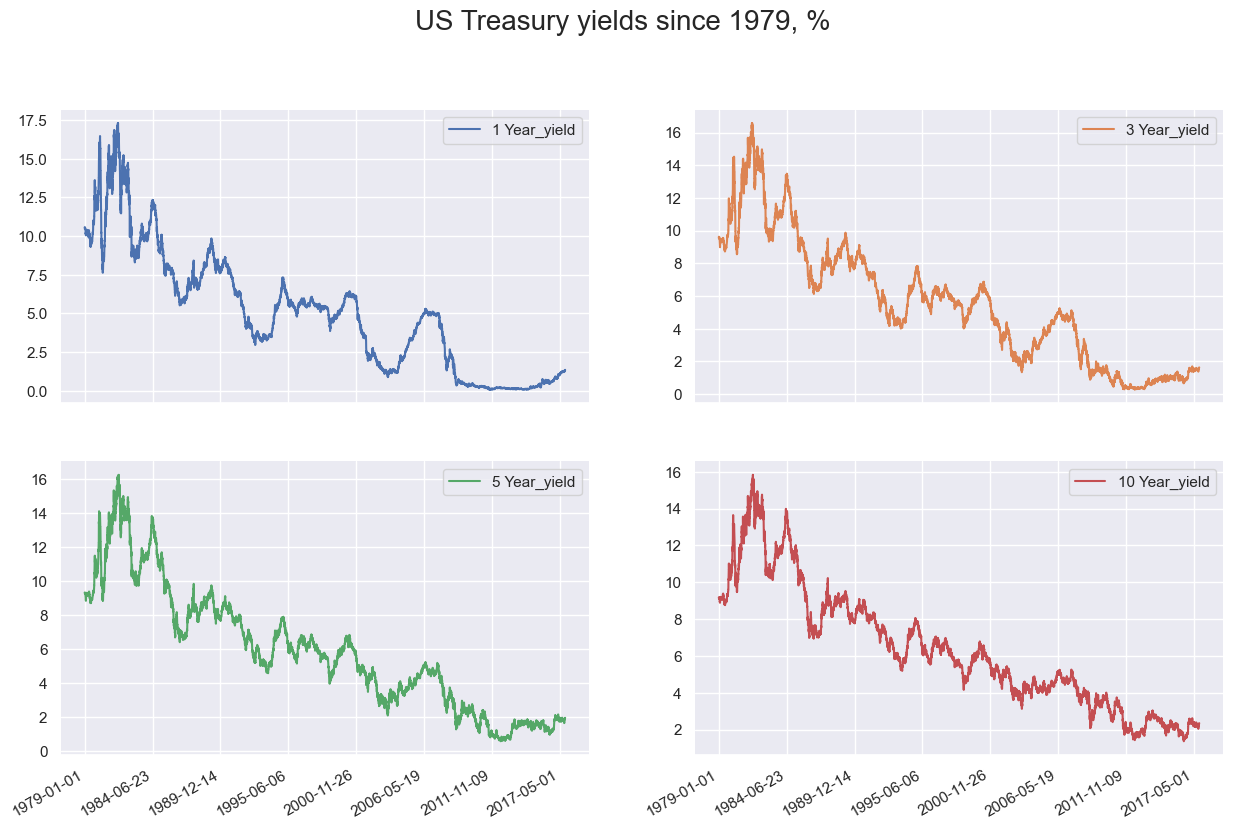

In [840]:
start = '19780102'

select_columns = ['1 Year_yield', '3 Year_yield', '5 Year_yield', '10 Year_yield']
US_treasury_yields_subplot =yield_data[select_columns]

US_treasury_yields_subplot.loc[start:].plot(subplots=True, layout=(5,2), figsize=(15, 25))
sns.despine(left=True, bottom=False, right=True)
plt.suptitle("US Treasury yields since 1979, %", fontsize=20, y=0.92)
plt.show();

In [841]:
tensor_data = pd.read_csv("1979-08-02.csv")

In [842]:
tensor_data 

Tenor  Percent
0   1 Year     9.71
1   3 Year     8.96
2  5 Year      8.90
3  10 Year     8.91

In [843]:
tensor_data .set_index('Tenor',inplace = True)

In [844]:
tensor_data

Percent
Tenor           
1 Year      9.71
3 Year      8.96
5 Year      8.90
10 Year     8.91

In [845]:
Percent = tensor_data["Percent"]

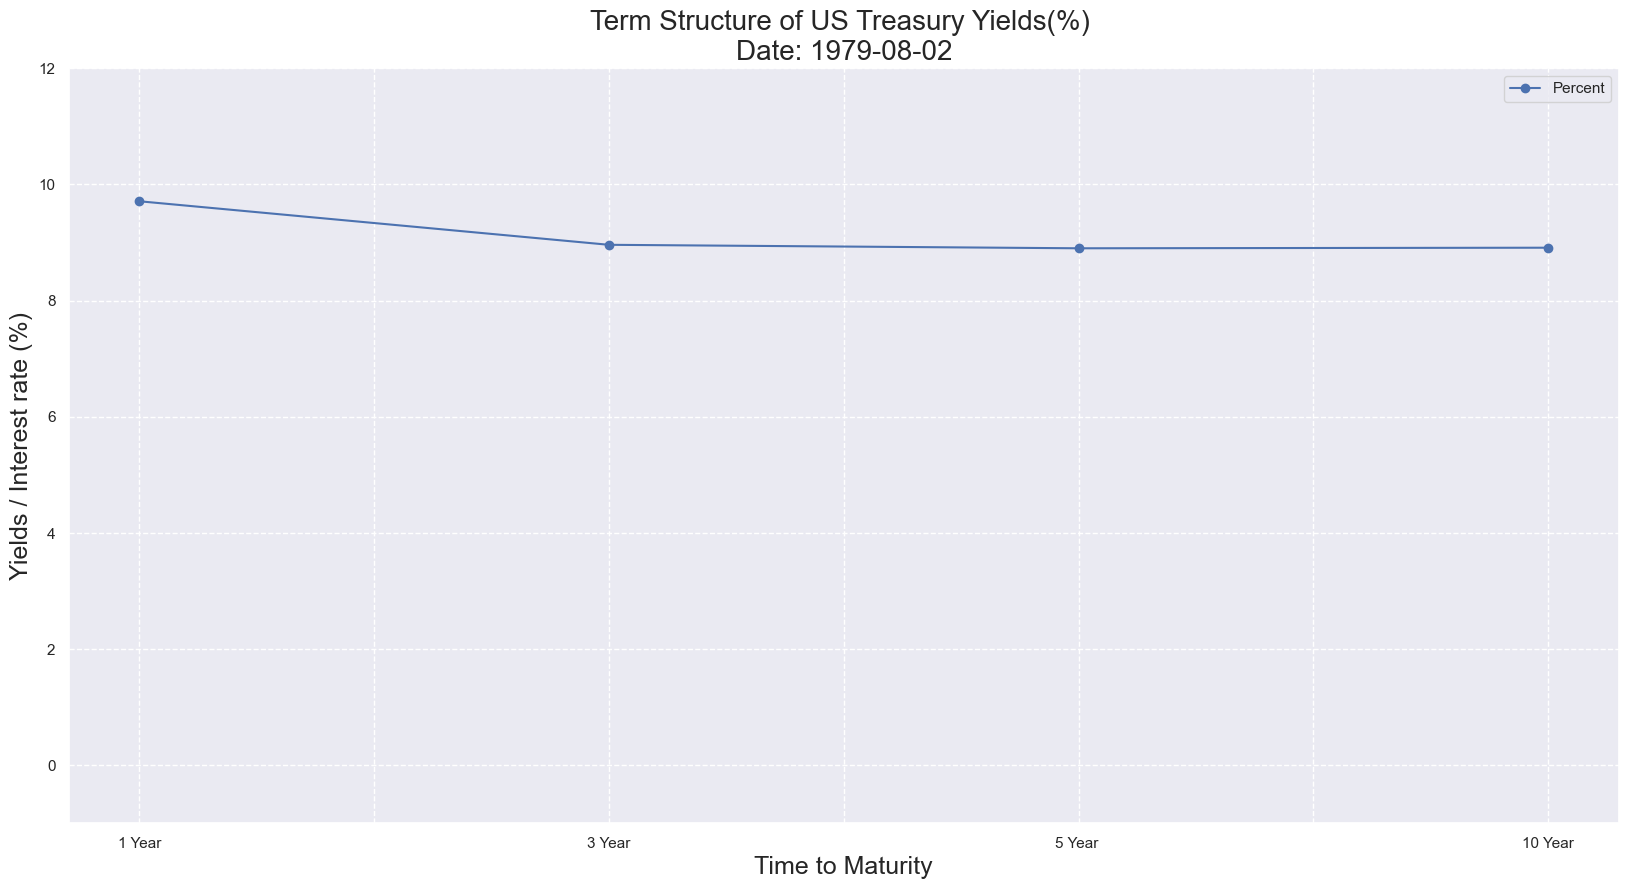

In [846]:
tensor_data.plot(figsize=(20,10),marker="o", label = 'yield data points')
plt.xlabel('Time to Maturity',fontsize = 18)
plt.ylabel('Yields / Interest rate (%)',fontsize = 18)
plt.title('Term Structure of US Treasury Yields(%) \nDate: 1979-08-02', fontsize = 20)
plt.ylim(-1,12)
plt.legend()
plt.grid(linestyle = '--', linewidth = 1)

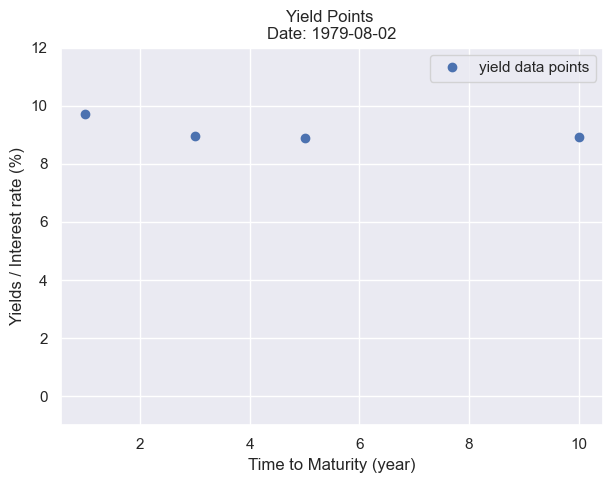

In [847]:
x= np.array([1,3,5,10])
y= np.array([9.71,8.96,8.90,8.91])
plt.ylim(-1,12)
plt.plot(x,y,'o', label = 'yield data points')
plt.xlabel('Time to Maturity (year)',fontsize = 12)
plt.ylabel('Yields / Interest rate (%)',fontsize = 12)
plt.title('Yield Points \nDate: 1979-08-02', fontsize = 12)
plt.legend()
plt.grid(linestyle = '-', linewidth = 1)

In [848]:
tensor_data.describe()

Percent
count  4.000000
mean   9.120000
std    0.394208
min    8.900000
25%    8.907500
50%    8.935000
75%    9.147500
max    9.710000

# Cubic Spline

In [849]:

cs = CubicSpline(x, y)
curve_points = np.linspace(min(x), max(x), 1000)

std: 0.394208


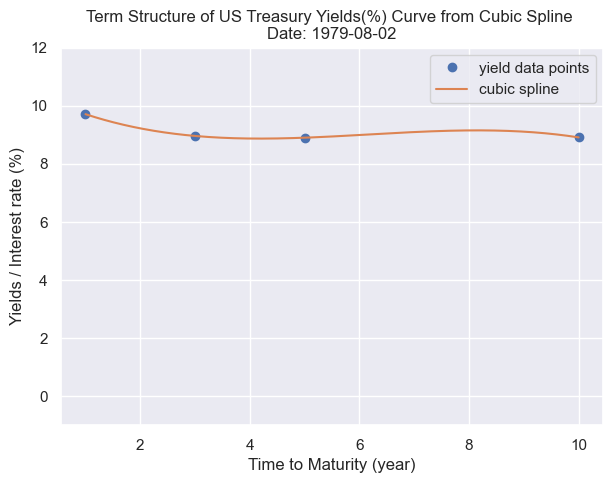

In [850]:
x= np.array([1,3,5,10])
y= np.array([9.71,8.96,8.90,8.91])

from scipy.interpolate import CubicSpline



plt.ylim(-1,12)
plt.plot(x,y,'o', label = 'yield data points')
plt.plot(curve_points, cs(curve_points), label="cubic spline")
plt.xlabel('Time to Maturity (year)',fontsize = 12)
plt.ylabel('Yields / Interest rate (%)',fontsize = 12)
plt.title('Term Structure of US Treasury Yields(%) Curve from Cubic Spline \nDate: 1979-08-02', fontsize = 12)
plt.legend()
plt.grid(linestyle = '-', linewidth = 1)
print('std: 0.394208')

Inverted/Downward slope: This occurs when short term rates are greater than the long term rates. It would generally imply that both monetary and fiscal policies are currently restrictive in nature and the probability of the economy contracting in the future is high. According to empirical evidence, the Inverted Yield curve has been the best predictor of recessions in the economy.

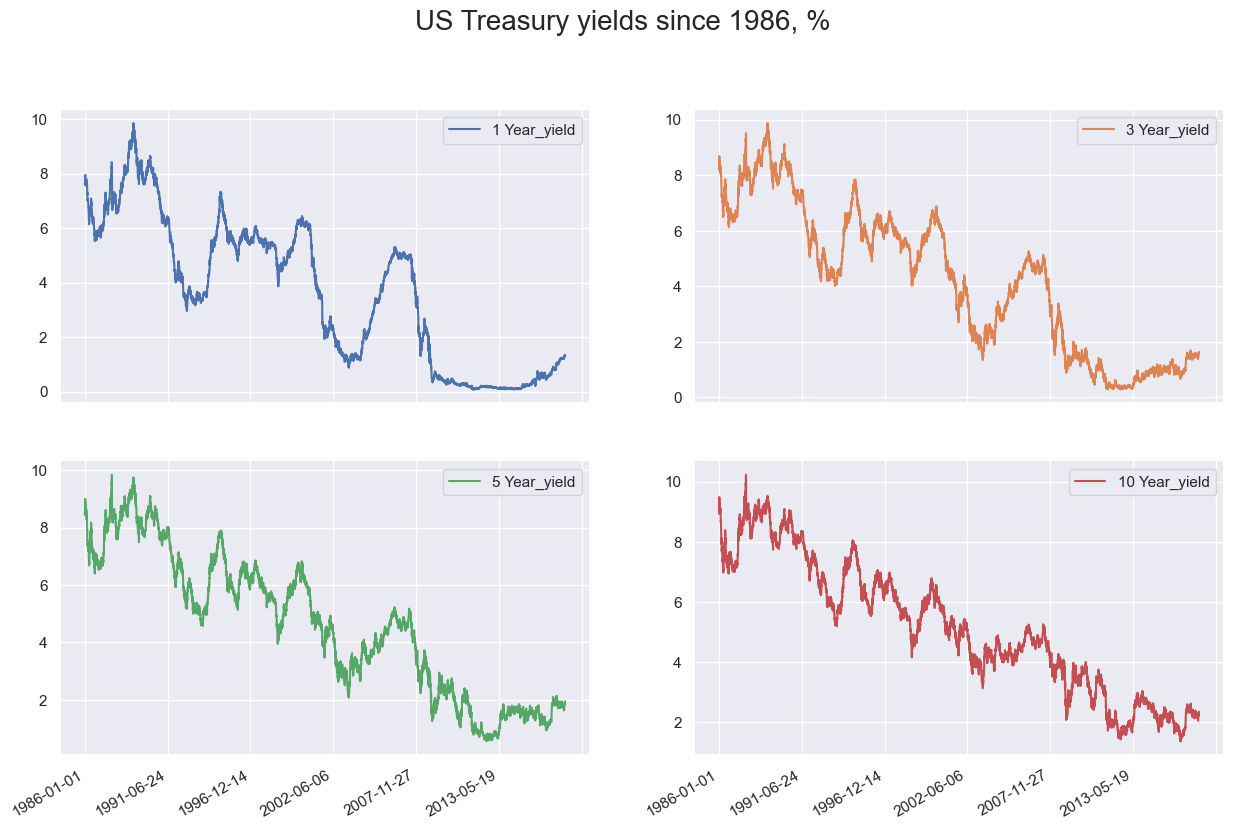

In [851]:
start = '19850102'

select_columns = ['1 Year_yield', '3 Year_yield', '5 Year_yield', '10 Year_yield']
US_treasury_yields_subplot =yield_data[select_columns]

US_treasury_yields_subplot.loc[start:].plot(subplots=True, layout=(5,2), figsize=(15, 25))
sns.despine(left=True, bottom=False, right=True)
plt.suptitle("US Treasury yields since 1986, %", fontsize=20, y=0.92)
plt.show();

In [852]:
tensor_data1 = pd.read_csv("1986-01-02.csv")

In [853]:
tensor_data1 .set_index('Tenor',inplace = True)

In [854]:
tensor_data1

Percent
Tenor           
1 Year      7.64
3 Year      8.26
5 Year      8.51
10 Year     9.04

In [855]:
tensor_data1.describe()

Percent
count  4.00000
mean   8.36250
std    0.58117
min    7.64000
25%    8.10500
50%    8.38500
75%    8.64250
max    9.04000

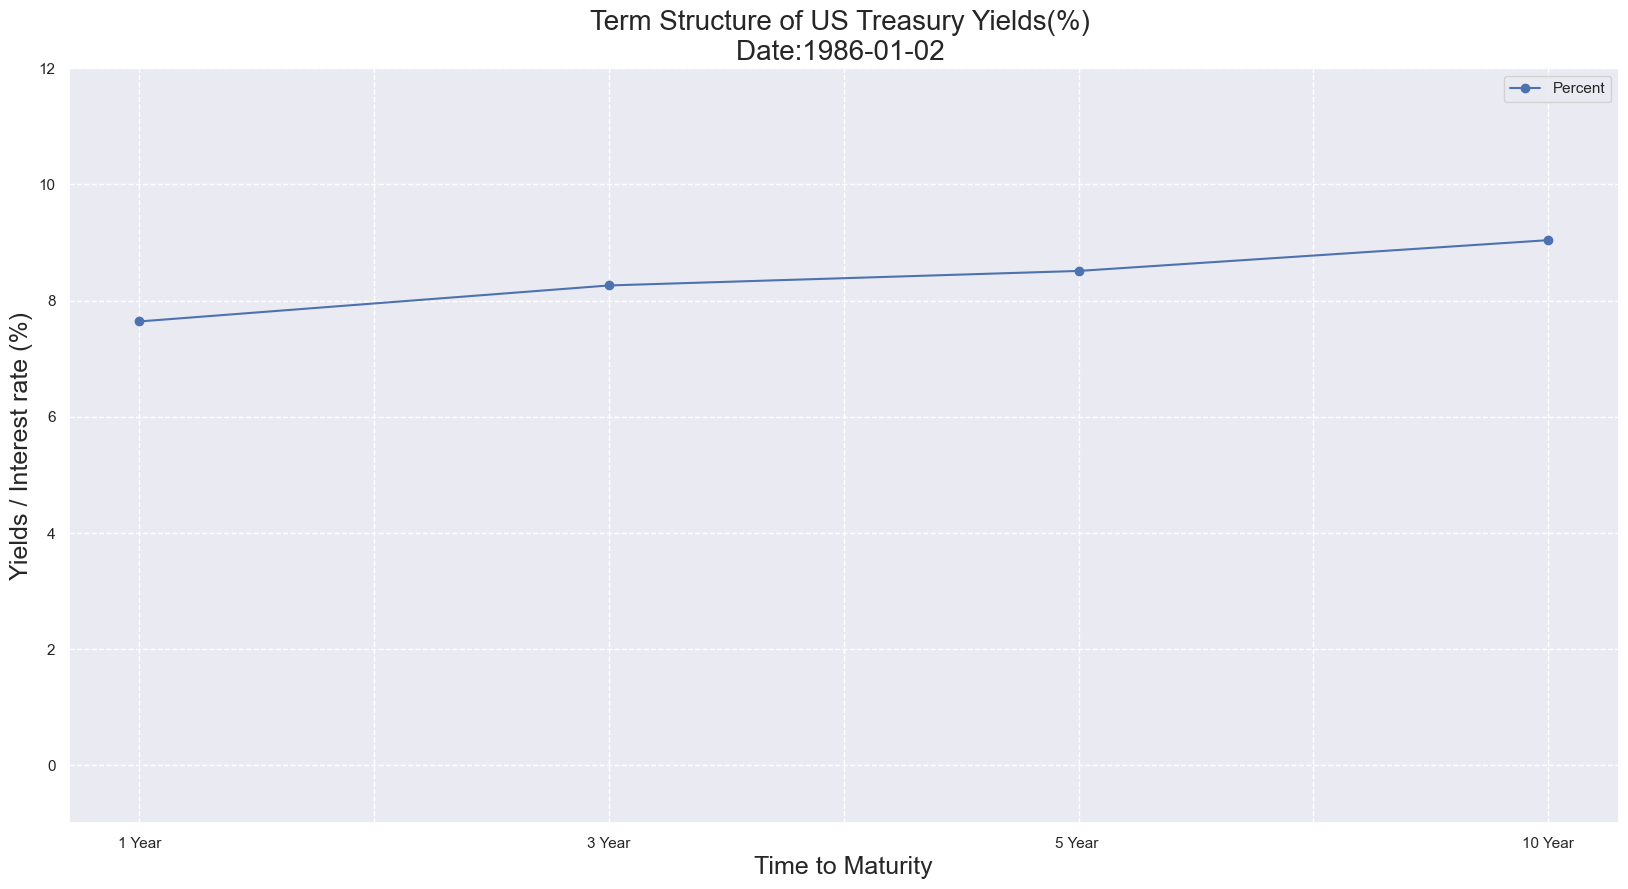

In [856]:
tensor_data1.plot(figsize=(20,10),marker="o", label = 'yield data points')
plt.xlabel('Time to Maturity',fontsize = 18)
plt.ylabel('Yields / Interest rate (%)',fontsize = 18)
plt.title('Term Structure of US Treasury Yields(%) \nDate:1986-01-02 ', fontsize = 20)
plt.ylim(-1,12)
plt.legend()
plt.grid(linestyle = '--', linewidth = 1)

std: 0.58117


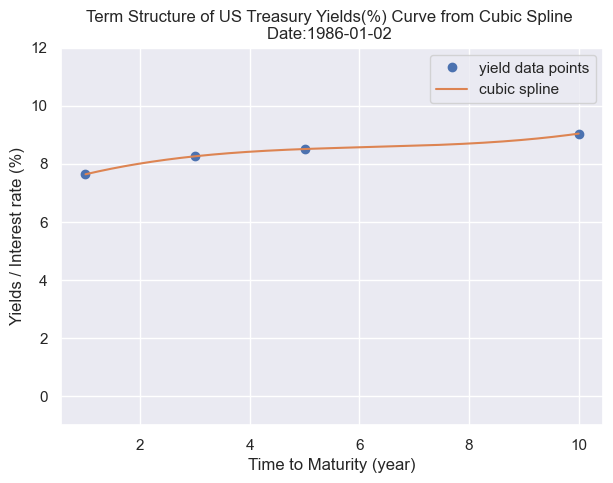

In [857]:
x= np.array([1,3,5,10])
y= np.array([7.64,8.26,8.51,9.04])

from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)
curve_points = np.linspace(min(x), max(x), 1000)

plt.ylim(-1,12)
plt.plot(x,y,'o', label = 'yield data points')
plt.plot(curve_points, cs(curve_points), label="cubic spline")
plt.xlabel('Time to Maturity (year)',fontsize = 12)
plt.ylabel('Yields / Interest rate (%)',fontsize = 12)
plt.title('Term Structure of US Treasury Yields(%) Curve from Cubic Spline \nDate:1986-01-02 ', fontsize = 12)
plt.legend()
plt.grid(linestyle = '-', linewidth = 1)
print('std: 0.58117')

 Normal/upward slope: short term rates are lower than longer term rates, exhibiting an upward slope where investors are compensated for holding the longer term securities that possess greater investment risks. The higher yields on longer term maturity also means that the short term rates are likely to increase in the future as the growth in the economy would lead to higher inflation rates.

# What is the approximate relationship between standard deviation of the 1-day and 25-day IR increments? How does it depend on the increment time periods, i.e. 1-day and 25-days? Does this relationship depend on the increment tenor?

In [858]:
yield_data.diff(periods=1).describe()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
count  20365.000000  20365.000000  20365.000000   20365.000000
mean      -0.000092     -0.000102     -0.000095      -0.000084
std        0.068469      0.062521      0.060016       0.054727
min       -1.080000     -0.790000     -0.770000      -0.750000
25%       -0.010000     -0.010000     -0.010000      -0.010000
50%        0.000000      0.000000      0.000000       0.000000
75%        0.010000      0.010000      0.010000       0.010000
max        1.100000      0.920000      0.720000       0.650000

We can observe the probability density functions do not differ a lot in the graphs. Histograms of  1 day increment for each tensor looks similiar. The reason for the similar probability density function is because the standard deviation is small and almost equal to 0.06 (for three tensor)

In [859]:
yield_data.diff(periods=25).describe()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
count  20341.000000  20341.000000  20341.000000   20341.000000
mean      -0.002427     -0.002689     -0.002543      -0.002231
std        0.437109      0.374288      0.345874       0.301641
min       -4.730000     -3.330000     -2.790000      -2.460000
25%       -0.130000     -0.170000     -0.170000      -0.150000
50%        0.000000      0.000000      0.000000       0.000000
75%        0.140000      0.170000      0.170000       0.150000
max        3.170000      3.040000      2.820000       2.360000

# Plot correlation matrix between various tenors of the 1-day and 25-day increments.

plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

Start off by plotting the first-order differences with the help of .diff() and .plot():

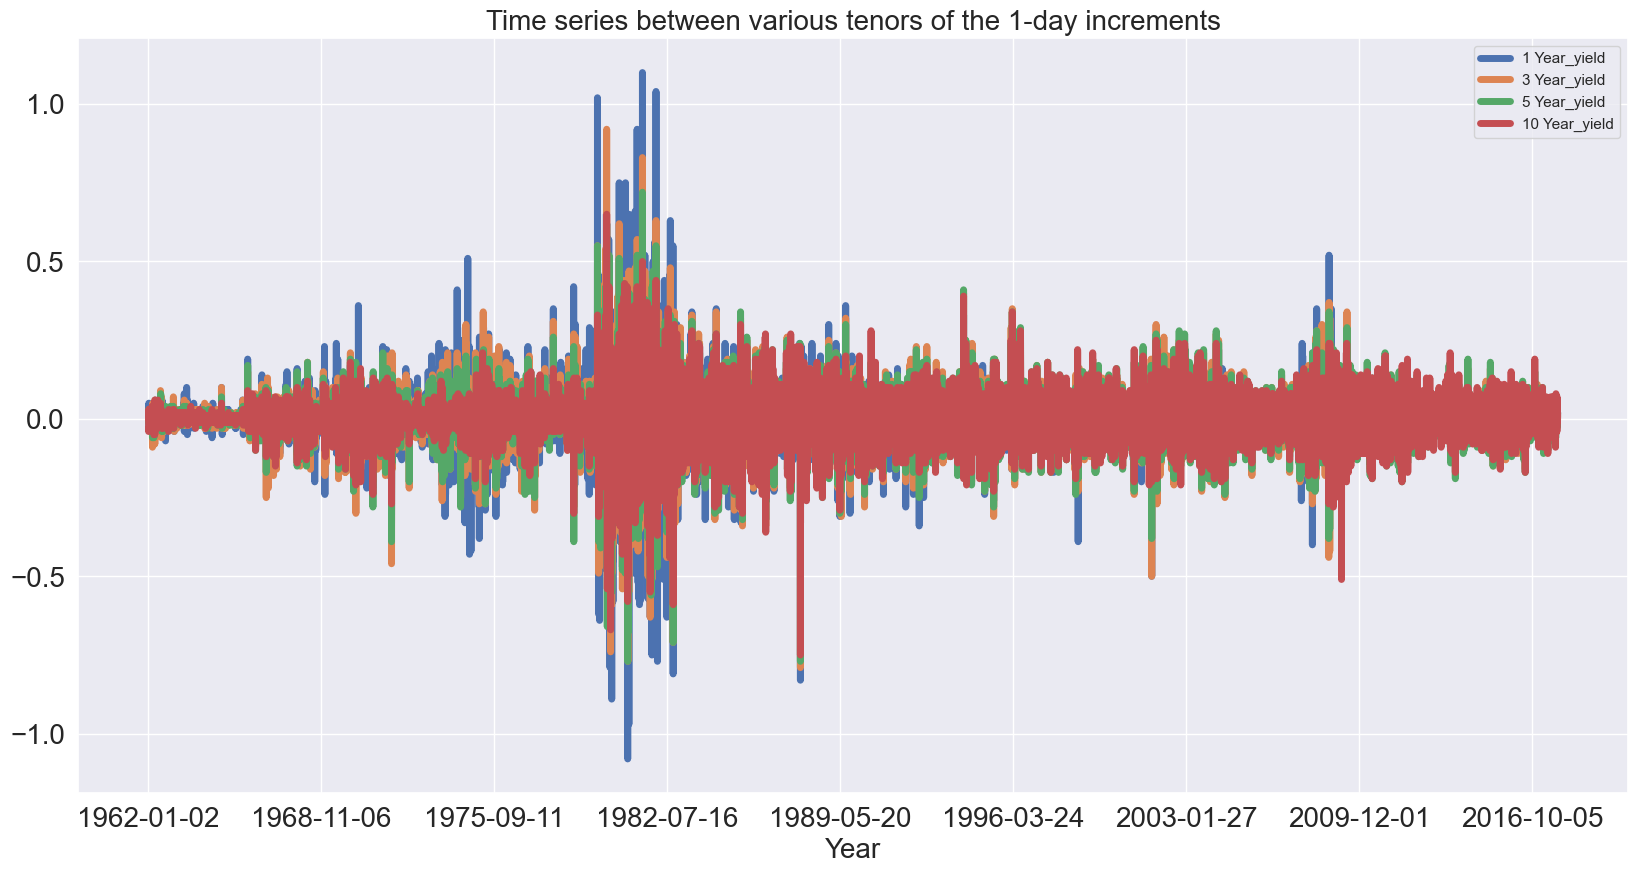

In [860]:
yield_data.diff(periods=1).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Time series between various tenors of the 1-day increments',fontsize=20);

Now, you'll compute the correlation coefficients of the first-order differences of these time series:

In [861]:
yield_data.diff(periods=1).corr()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
1 Year_yield       1.000000      0.837036      0.781079       0.702266
3 Year_yield       0.837036      1.000000      0.938262       0.864023
5 Year_yield       0.781079      0.938262      1.000000       0.925168
10 Year_yield      0.702266      0.864023      0.925168       1.000000

Now, you can see that   are highly correlated

In [863]:
yield_data.diff(periods=1).corr(method ='pearson')

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
1 Year_yield       1.000000      0.837036      0.781079       0.702266
3 Year_yield       0.837036      1.000000      0.938262       0.864023
5 Year_yield       0.781079      0.938262      1.000000       0.925168
10 Year_yield      0.702266      0.864023      0.925168       1.000000

The output dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell.The correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00

Here we are looking for yield correlation of 1 day increment.

So. we find Pearson’s r Value Correlation between 1 day increment of each yield and got values greater than 0 values .Greater than 0 means positive correlation.So identify that there are correlations, it means that the detectors are detecting in the same area.

Making a correlation matrix is a great way to summarize all the data. In this way, you can pick the best features and use them for further processing your data.

# Heatmaps

Visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices. A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library.

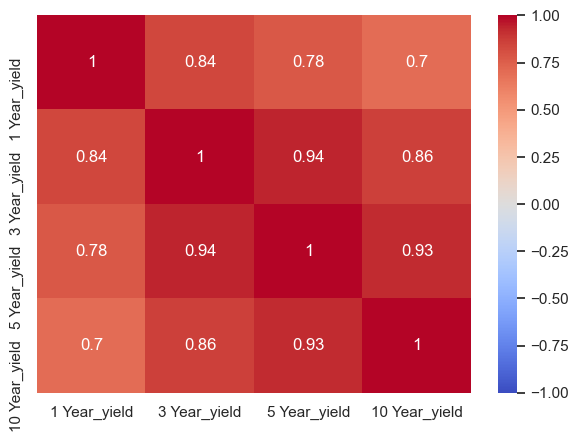

In [1037]:
import seaborn as sns
sns.heatmap(yield_data.diff(periods=1).corr(), annot = True,fmt='.2g', vmin=-1, vmax=1,cmap= 'coolwarm')

Dark red means positive, Dard Blue means negative. The stronger the color, the larger the correlation magnitude. So by using heatmaps we can visualize 1 day increment correlation matrices of each yield.

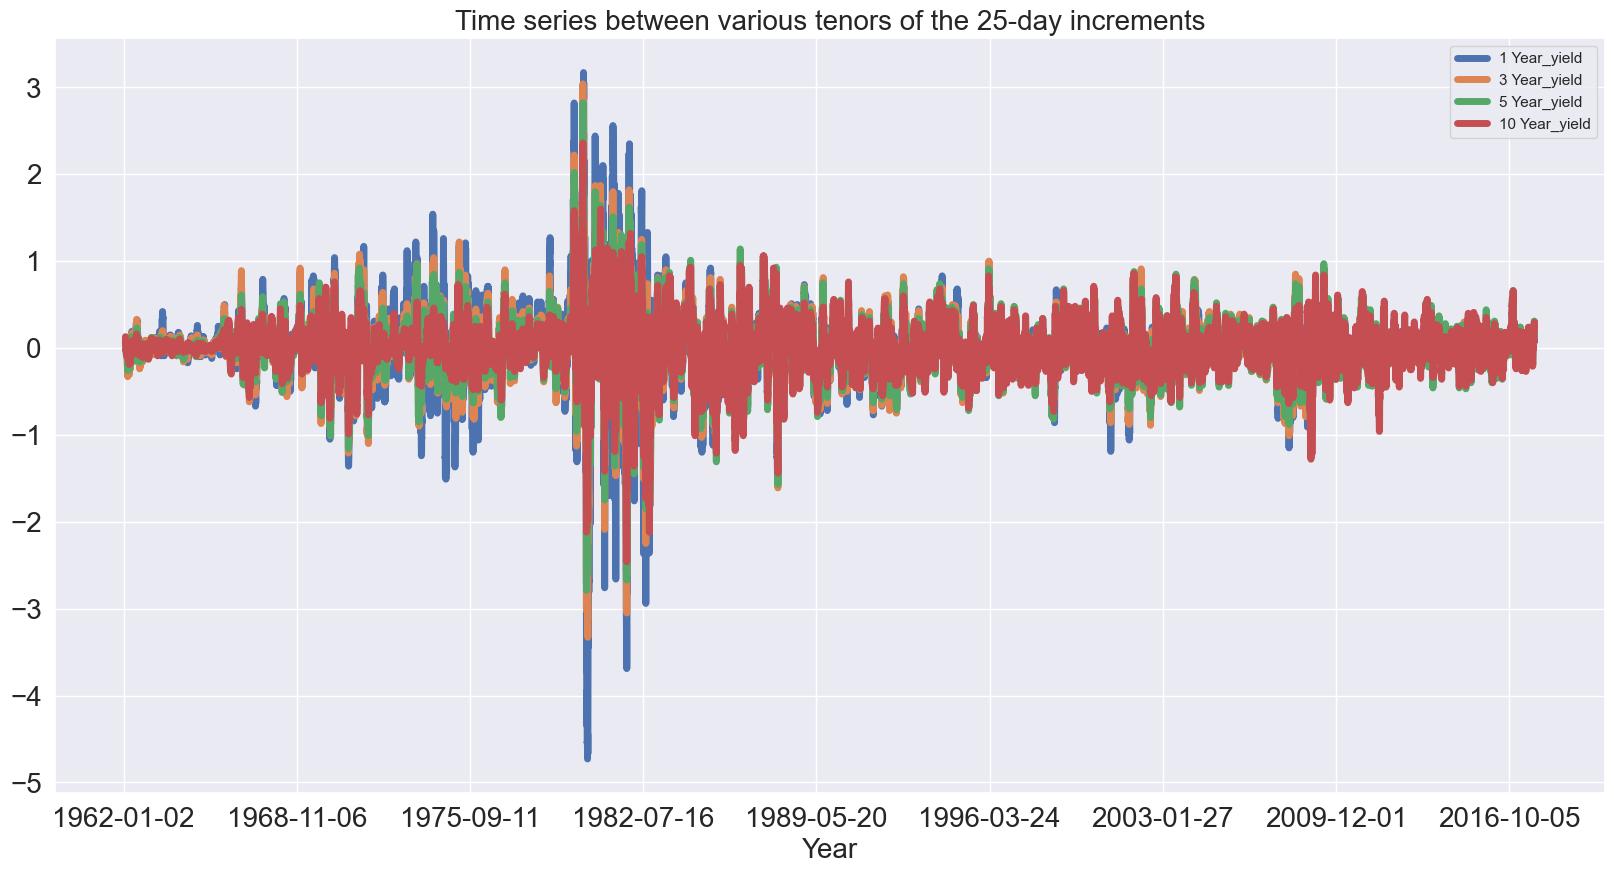

In [865]:
yield_data.diff(periods=25).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Time series between various tenors of the 25-day increments',fontsize=20);

In [866]:
yield_data.diff(periods=25).corr()

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
1 Year_yield       1.000000      0.915800      0.857685       0.762787
3 Year_yield       0.915800      1.000000      0.971627       0.900484
5 Year_yield       0.857685      0.971627      1.000000       0.948313
10 Year_yield      0.762787      0.900484      0.948313       1.000000

In [867]:
yield_data.diff(periods=25).corr(method ='pearson')

1 Year_yield  3 Year_yield  5 Year_yield  10 Year_yield
1 Year_yield       1.000000      0.915800      0.857685       0.762787
3 Year_yield       0.915800      1.000000      0.971627       0.900484
5 Year_yield       0.857685      0.971627      1.000000       0.948313
10 Year_yield      0.762787      0.900484      0.948313       1.000000

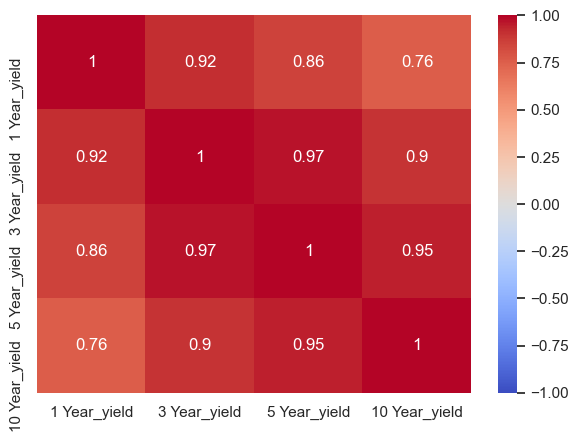

In [1033]:
import seaborn as sns
sns.heatmap(yield_data.diff(periods=25).corr(), annot = True, fmt='.2g',vmin=-1, vmax=1,cmap= 'coolwarm')

Strong Positive Correlation by pearson’s method


# Fit a single factor stochastic model to the 1-day increments of each tenor and use it to simulate each tenor yield independently

In [1055]:
Oneyear_day_1 = Oneyear_day_1[~np.isnan(Oneyear_day_1)]

In [1219]:
Oneyear_day_1 .to_csv(r'C:\Users\Keeru\Desktop\Oneyear_day_1 .csv', index = True, header = True)
print (Oneyear_day_1)

1962-01-03    0.02
1962-01-04    0.00
1962-01-05    0.02
1962-01-06    0.00
1962-01-07    0.00
              ... 
2017-10-01    0.00
2017-10-02    0.00
2017-10-03    0.01
2017-10-04    0.01
2017-10-05    0.02
Name: 1 Year_yield, Length: 20365, dtype: float64


In [1220]:
import pandas as pd
df = pd.read_csv("Oneyear_day_1 .csv", header=None, skiprows=6, parse_dates=[0], names=['period', 'value'])
df

period  value
0     1962-01-08   0.05
1     1962-01-09   0.01
2     1962-01-10   0.01
3     1962-01-11   0.00
4     1962-01-12  -0.03
...          ...    ...
20355 2017-10-01   0.00
20356 2017-10-02   0.00
20357 2017-10-03   0.01
20358 2017-10-04   0.01
20359 2017-10-05   0.02

[20360 rows x 2 columns]

In [1349]:
df= pd.read_csv('Imputed Data.csv')
df['Time Period'] = pd.to_datetime(df['Time Period']).apply(lambda x:x.strftime('%Y-%m-%d'))
df.index.name = None
df.head()

Time Period  RIFLGFCY01_N.B  RIFLGFCY03_N.B  RIFLGFCY05_N.B  RIFLGFCY10_N.B  \
0  1962-01-02            3.22            3.70            3.88            4.06   
1  1962-01-03            3.24            3.70            3.87            4.03   
2  1962-01-04            3.24            3.69            3.86            3.99   
3  1962-01-05            3.26            3.71            3.89            4.02   
4  1962-01-06            3.26            3.71            3.89            4.02   

   IS_WEEKEND  Day of week  
0           0            1  
1           0            2  
2           0            3  
3           0            4  
4           1            5

In [1350]:
df.columns = ['period', '1 Year_yield', '3 Year_yield', '5 Year_yield', 'value','IS_WEEKEND', 'Day of week']
df.head()

period  1 Year_yield  3 Year_yield  5 Year_yield  value  IS_WEEKEND  \
0  1962-01-02          3.22          3.70          3.88   4.06           0   
1  1962-01-03          3.24          3.70          3.87   4.03           0   
2  1962-01-04          3.24          3.69          3.86   3.99           0   
3  1962-01-05          3.26          3.71          3.89   4.02           0   
4  1962-01-06          3.26          3.71          3.89   4.02           1   

   Day of week  
0            1  
1            2  
2            3  
3            4  
4            5

In [1351]:
df.drop([ '1 Year_yield', '3 Year_yield', '5 Year_yield','IS_WEEKEND','Day of week'],axis=1,inplace = True)
df

period  value
0      1962-01-02   4.06
1      1962-01-03   4.03
2      1962-01-04   3.99
3      1962-01-05   4.02
4      1962-01-06   4.02
...           ...    ...
20361  2017-10-01   2.33
20362  2017-10-02   2.34
20363  2017-10-03   2.33
20364  2017-10-04   2.33
20365  2017-10-05   2.35

[20366 rows x 2 columns]

In [1348]:
df.to_csv(r'C:\Users\Keeru\Desktop\Fiveyearyield.csv', index = False, header = True)
print (df)

           period  value
0      1962-01-02   3.88
1      1962-01-03   3.87
2      1962-01-04   3.86
3      1962-01-05   3.89
4      1962-01-06   3.89
...           ...    ...
20361  2017-10-01   1.92
20362  2017-10-02   1.94
20363  2017-10-03   1.92
20364  2017-10-04   1.92
20365  2017-10-05   1.94

[20366 rows x 2 columns]


In [1352]:
df.to_csv(r'C:\Users\Keeru\Desktop\Tenyearyield.csv', index = False, header = True)
print (df)

           period  value
0      1962-01-02   4.06
1      1962-01-03   4.03
2      1962-01-04   3.99
3      1962-01-05   4.02
4      1962-01-06   4.02
...           ...    ...
20361  2017-10-01   2.33
20362  2017-10-02   2.34
20363  2017-10-03   2.33
20364  2017-10-04   2.33
20365  2017-10-05   2.35

[20366 rows x 2 columns]


In [1344]:
df.to_csv(r'C:\Users\Keeru\Desktop\Threeyearyield.csv', index = False, header = True)
print (df)

           period  value
0      1962-01-02   3.70
1      1962-01-03   3.70
2      1962-01-04   3.69
3      1962-01-05   3.71
4      1962-01-06   3.71
...           ...    ...
20361  2017-10-01   1.62
20362  2017-10-02   1.63
20363  2017-10-03   1.62
20364  2017-10-04   1.62
20365  2017-10-05   1.63

[20366 rows x 2 columns]


In [1117]:
df.to_csv(r'C:\Users\Keeru\Desktop\Oneyearyield.csv', index = False, header = True)
print (df)

           period  value
0      1962-01-02   3.22
1      1962-01-03   3.24
2      1962-01-04   3.24
3      1962-01-05   3.26
4      1962-01-06   3.26
...           ...    ...
20361  2017-10-01   1.31
20362  2017-10-02   1.31
20363  2017-10-03   1.32
20364  2017-10-04   1.33
20365  2017-10-05   1.35

[20366 rows x 2 columns]


In [1353]:
import pandas as pd
df = pd.read_csv("Oneyearyield.csv", header=None, parse_dates=[0], names=['period', 'value'])
df



period  value
0    2014-01-01   0.13
1    2014-01-02   0.13
2    2014-01-03   0.13
3    2014-01-04   0.13
4    2014-01-05   0.13
...         ...    ...
1369 2017-10-01   1.31
1370 2017-10-02   1.31
1371 2017-10-03   1.32
1372 2017-10-04   1.33
1373 2017-10-05   1.35

[1374 rows x 2 columns]

In [1354]:
import numpy as np

train_range = df[df.period < '2017-01-01'].index
test_range = df[(df.period >= '2017-01-01')].index

Text(0.5, 1.0, 'Train and Test Data of 1 Year Yield')

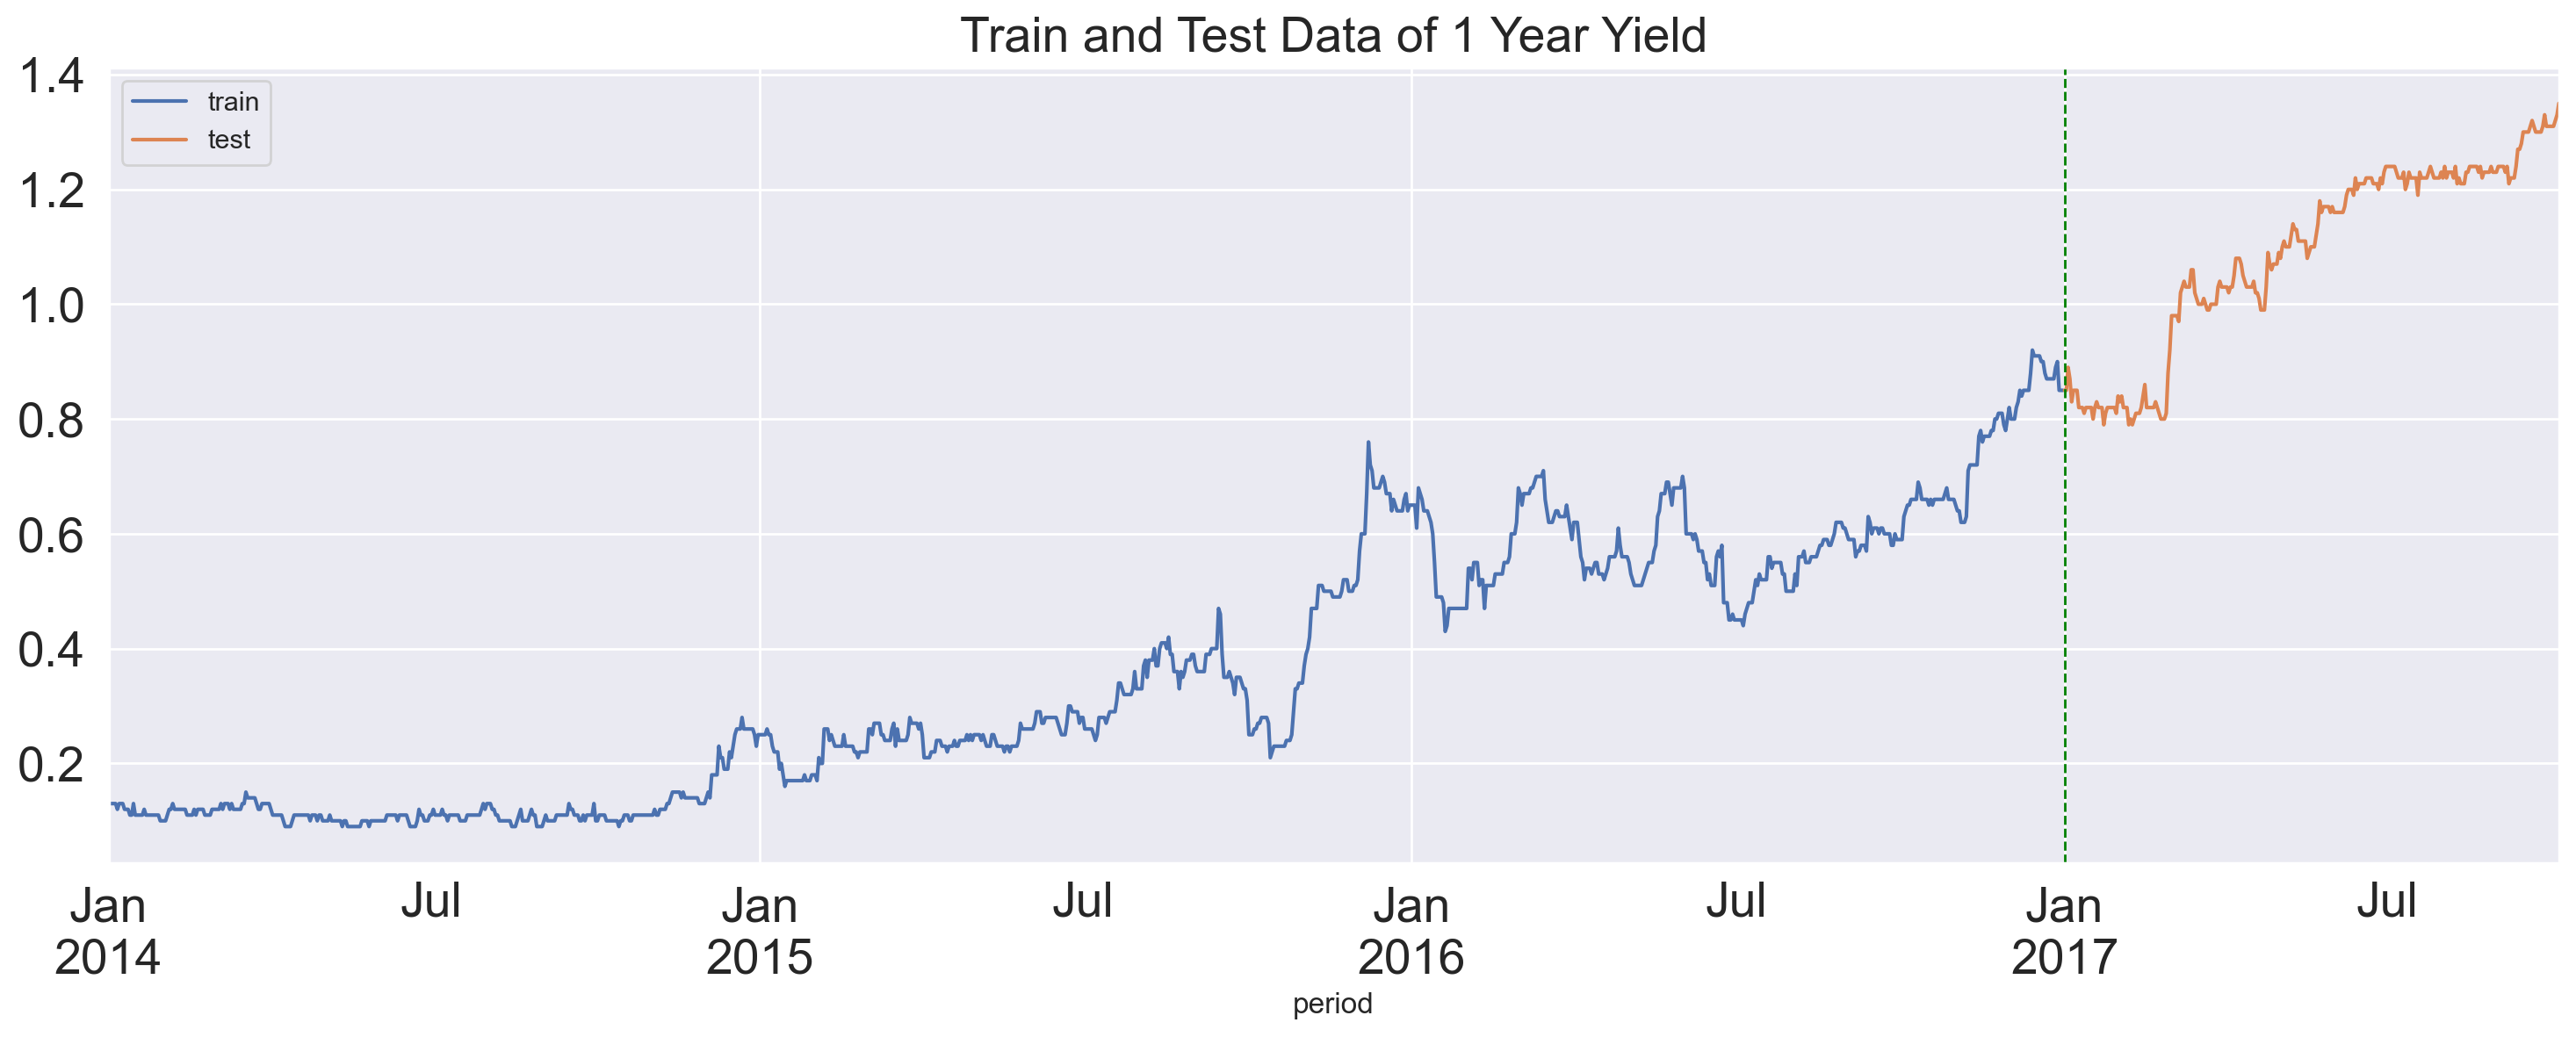

In [1355]:
fig, ax = plt.subplots(figsize=(18,6))
df.loc[train_range].plot(x="period", y="value", ax=ax, label="train",fontsize = 20)
df.loc[test_range].plot(x="period", y="value", ax=ax, label="test",fontsize = 20)

plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='green', ls='--', lw=1)
plt.legend(loc='upper left')
plt.title('Train and Test Data of 1 Year Yield',fontsize = 20)

# ARIMA model

Stationary or not?
A non-stationary time series shows seasonal effects, trends, and other structures that depend on the time index.

A time series is stationary if its statistical properties are all constant over time.

Properties of a stationary time series:

no trend
variations around its mean have a constant amplitude
it wiggles in a consistent fashion (i.e., its short-term random time patterns always look the same)

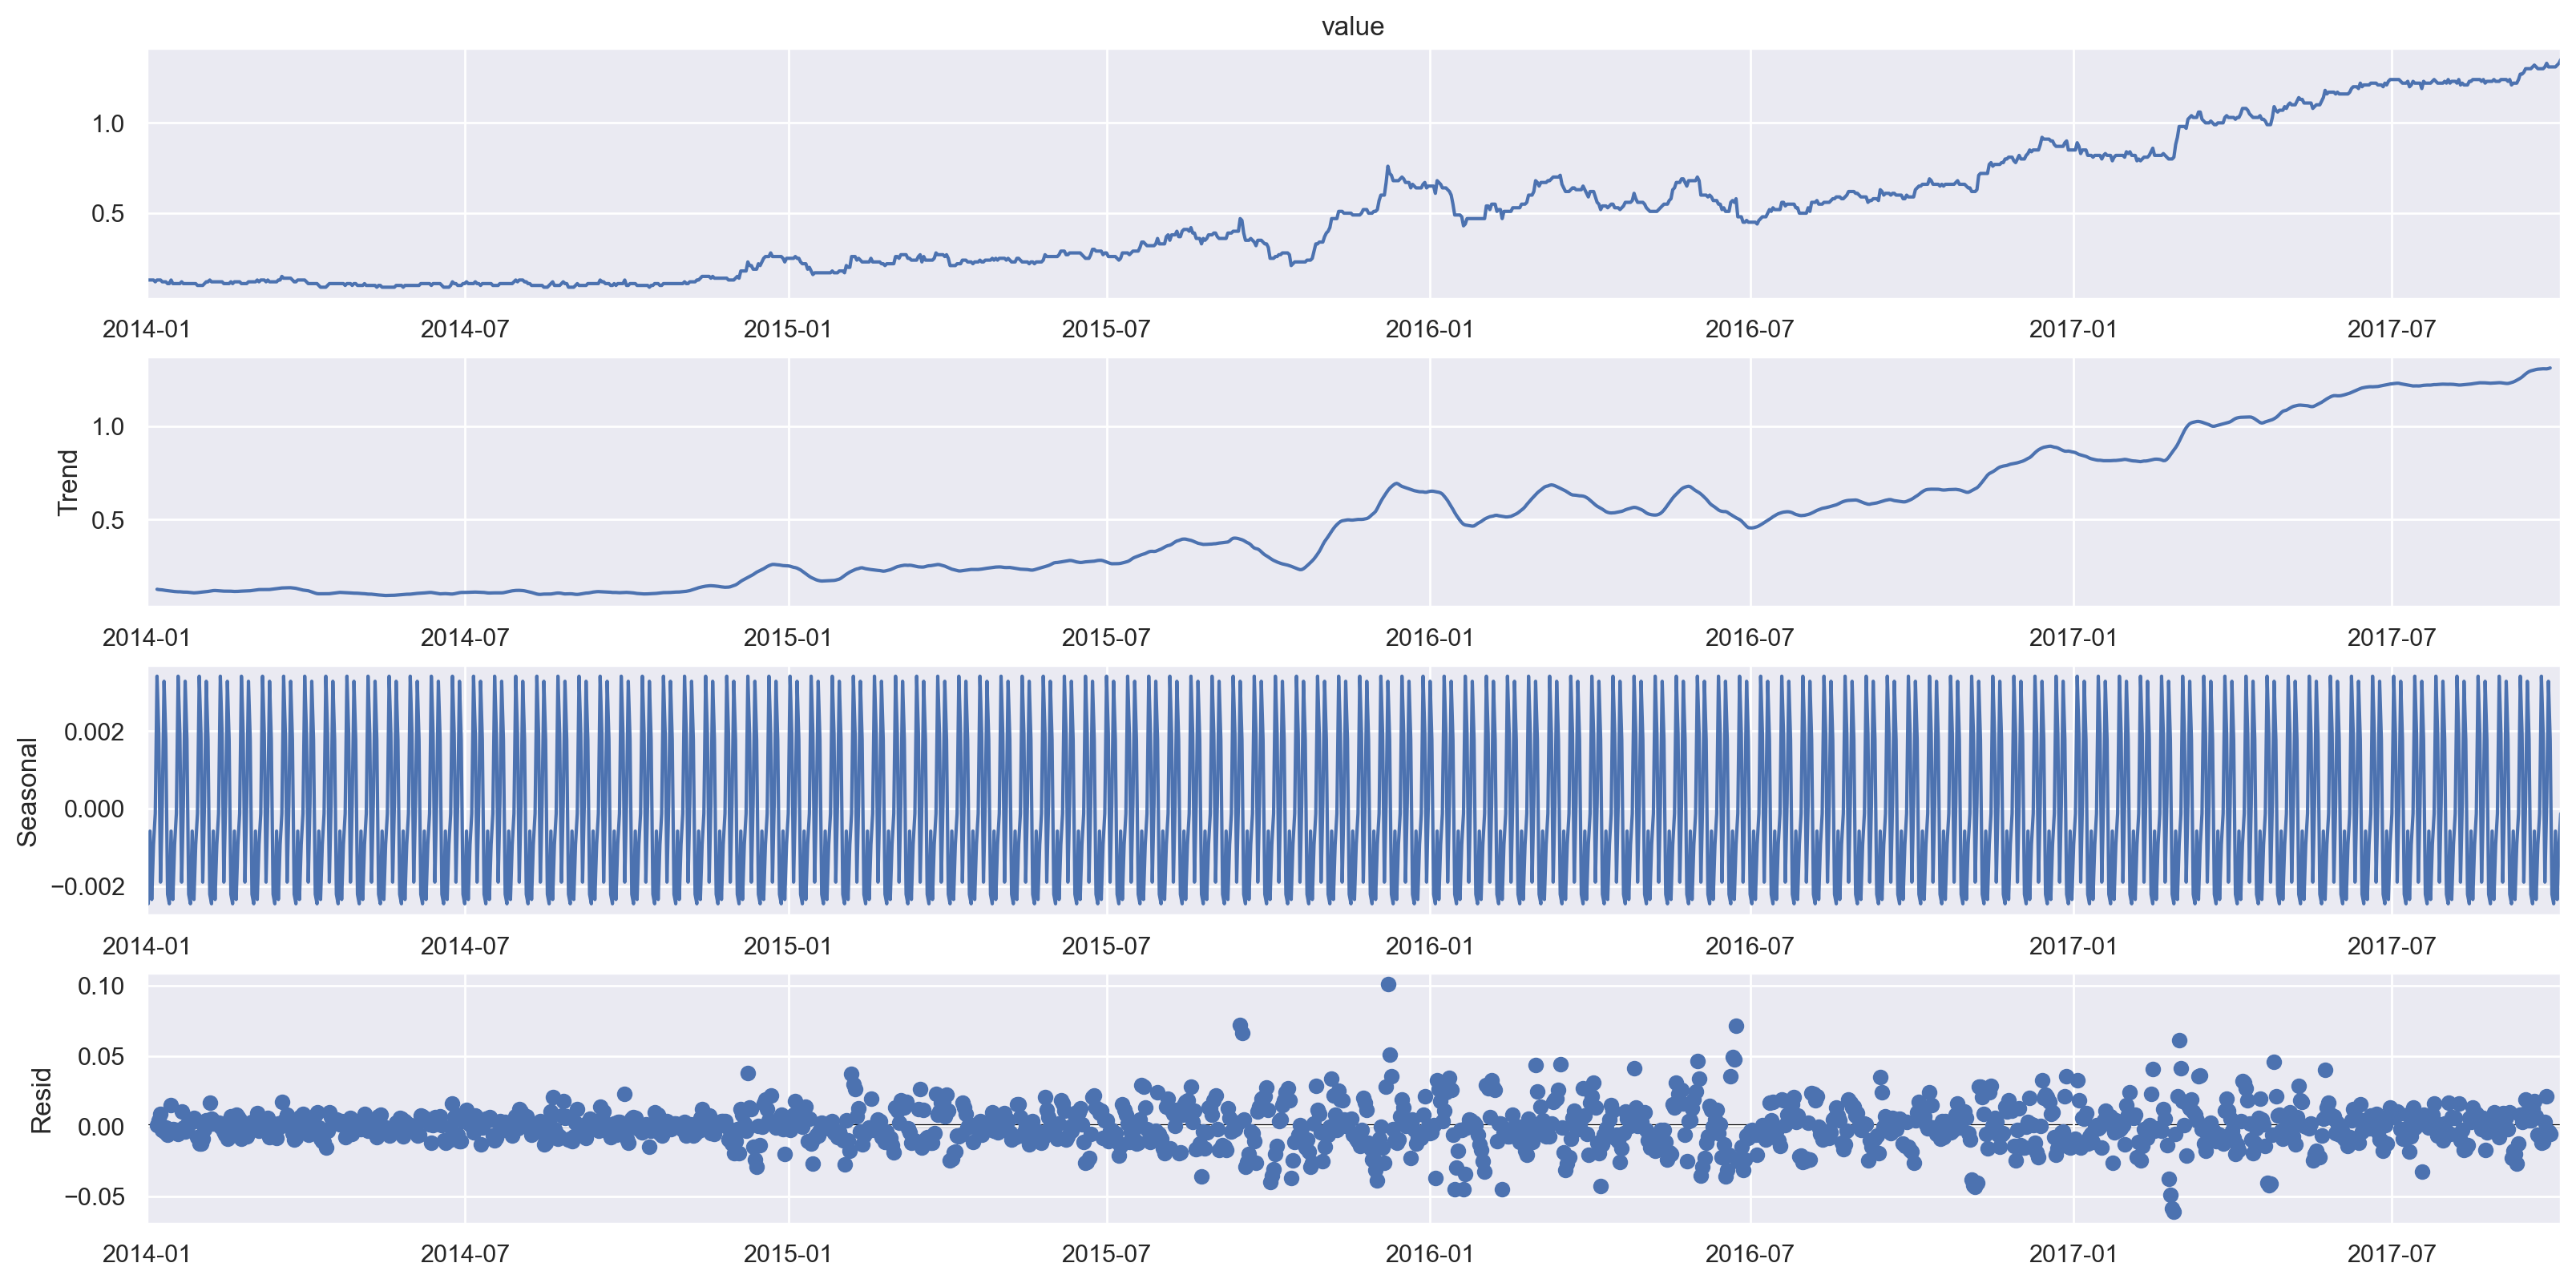

In [1356]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasons = 12
decompfreq = seasons
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("period").value.interpolate("linear"),
    freq=decompfreq,
    model=model)

fig = decomposition.plot()
fig.set_size_inches(16, 8)


In [1357]:
from statsmodels.tsa.stattools import adfuller

def is_stationary_with_adf(data, significance_level=0.01):
    """Decide if the given time series is stationary using ADF test."""
    test = adfuller(data, regression='c', autolag='BIC')
    p_value = test[1]
    print("ADF p-value: {:0.5f}".format(p_value))
    return p_value < significance_level


In [1358]:
from statsmodels.tsa.stattools import kpss

def is_stationary_with_kpss(data, significance_level=0.05):
    """Decide if the given time series is stationary using KPSS test."""
    test = kpss(data, regression='c')
    p_value = test[1]
    print("KPSS p-value: {:0.5f}".format(p_value))
    return p_value > significance_level


In [1359]:
significance_level = 0.05
print("Significance Level: {}%".format(100 * significance_level), '\n')

print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(df.value.values, significance_level) else "no"), '\n')

print("Stationary by KPSS: {}".format(
    "yes" if is_stationary_with_kpss(df.value.values, significance_level) else "no"))


Significance Level: 5.0% 

ADF p-value: 0.98927
Stationary by ADF: no 

KPSS p-value: 0.01000
Stationary by KPSS: no


In [1360]:
from scipy import stats
df['boxcox'], lmbda = stats.boxcox(df.value)

print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(df.boxcox.dropna().values, significance_level) else "no"), '\n')

print("Stationary by KPSS: {}".format(
    "yes" if is_stationary_with_kpss(df.boxcox.dropna().values, significance_level) else "no"))

ADF p-value: 0.88082
Stationary by ADF: no 

KPSS p-value: 0.01000
Stationary by KPSS: no


Stationarization
We may correct the trend stationarity by differencing (first-difference (FD) - differencing an observation from its prior observation).

The seasonal growth, if present, can be corrected using a logarithmic transformation or seasonal differences.

Box-Cox Transformation
Lets use the Box-Cox transformation to suppress some of the variance. This technique used to transform non-normal dependent variables into a normal shape.

The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it the parameter needs to be estimated from the data.

In [1361]:
df["fd"] = df.boxcox - df.boxcox.shift(1)


In [1362]:
df["stationary"] = df.fd - df.fd.shift(seasons)


In [1363]:
print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(df.stationary.dropna().values, significance_level) else "no"), '\n')

print("Stationary by KPSS: {}".format(
    "yes" if is_stationary_with_kpss(df.stationary.dropna().values, significance_level) else "no"))


ADF p-value: 0.00000
Stationary by ADF: yes 

KPSS p-value: 0.10000
Stationary by KPSS: yes


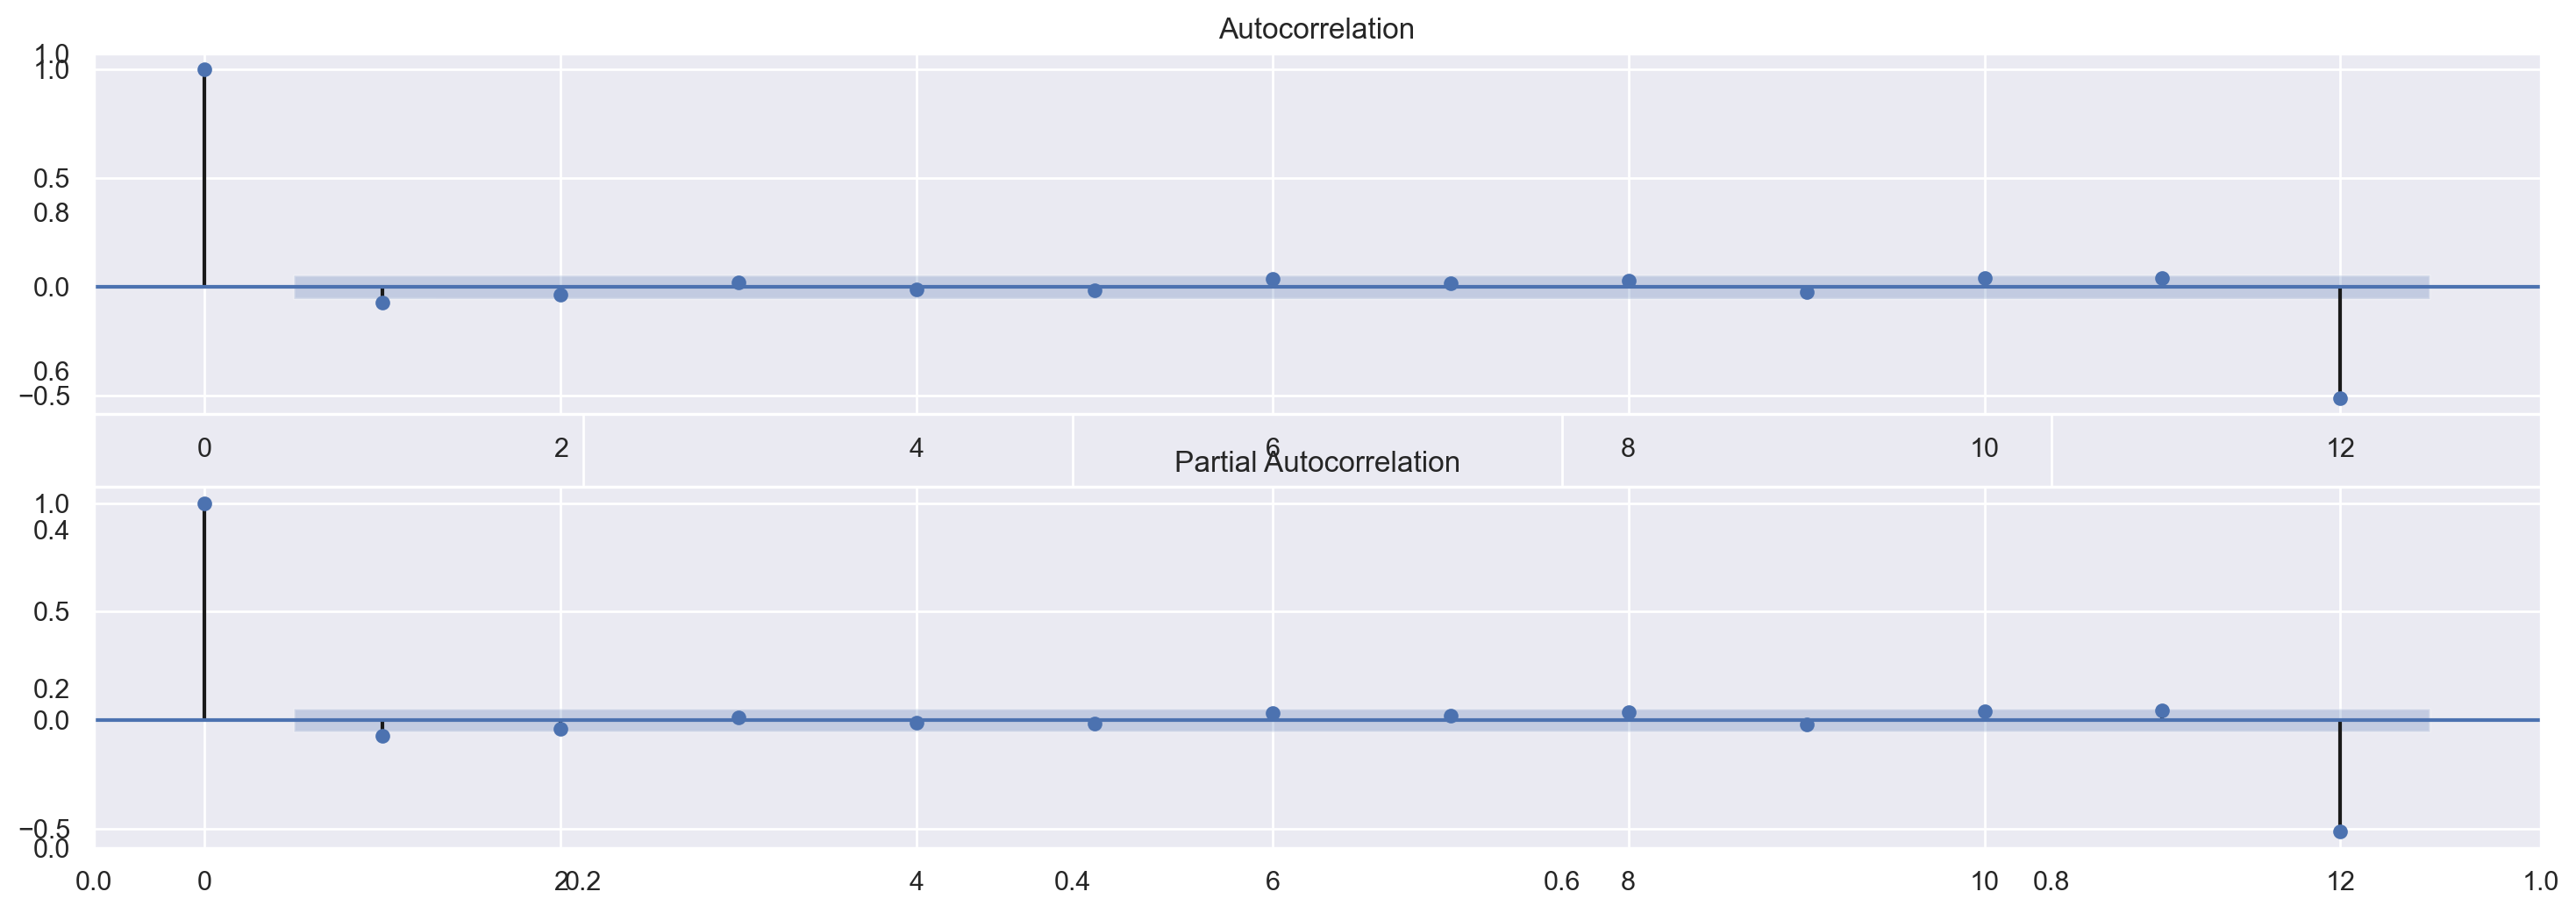

In [1364]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(18,6))

ax = fig.add_subplot(211)
fig = plot_acf(df.stationary.dropna(inplace=False).iloc[seasons + 1:], lags=12, ax=ax)

ax = fig.add_subplot(212)
fig = plot_pacf(df.stationary.dropna(inplace=False).iloc[seasons + 1:], lags=12, ax=ax)


AutoRegressive Integrated Moving Average (ARIMA) Model

p - the number of lag observations to include in the model, or lag order. (AR)

d - the number of times that the raw observations are differenced, or the degree of differencing. (I)

q - the size of the moving average window, also called the order of moving average.(MA)

We took differences of the first order to stationarize the time series, so $d=1$.



In [1366]:
from statsmodels.tsa.statespace import sarimax

model = sarimax.SARIMAX(
    np.log(df.loc[train_range].set_index("period").value),
    trend='n',
    order=(3,1,1),
    seasonal_order=(3,1,1,12),
    enforce_stationarity=True,
    enforce_invertibility=True)
results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                 1096
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                1696.550
Date:                            Fri, 18 Dec 2020   AIC                          -3375.100
Time:                                    16:48:30   BIC                          -3330.213
Sample:                                01-01-2014   HQIC                         -3358.106
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0788      2.898     -0.027      0.978      -5.759       5.601
ar.L2         -0.0116      0.307   

# Make prediction

In [1367]:
steps = test_range.shape[0]

forecast = results.get_forecast(steps=steps)
forecast_ci = forecast.conf_int()

yhat_test = np.exp(forecast.predicted_mean).values
y_test = df.loc[test_range].value.values


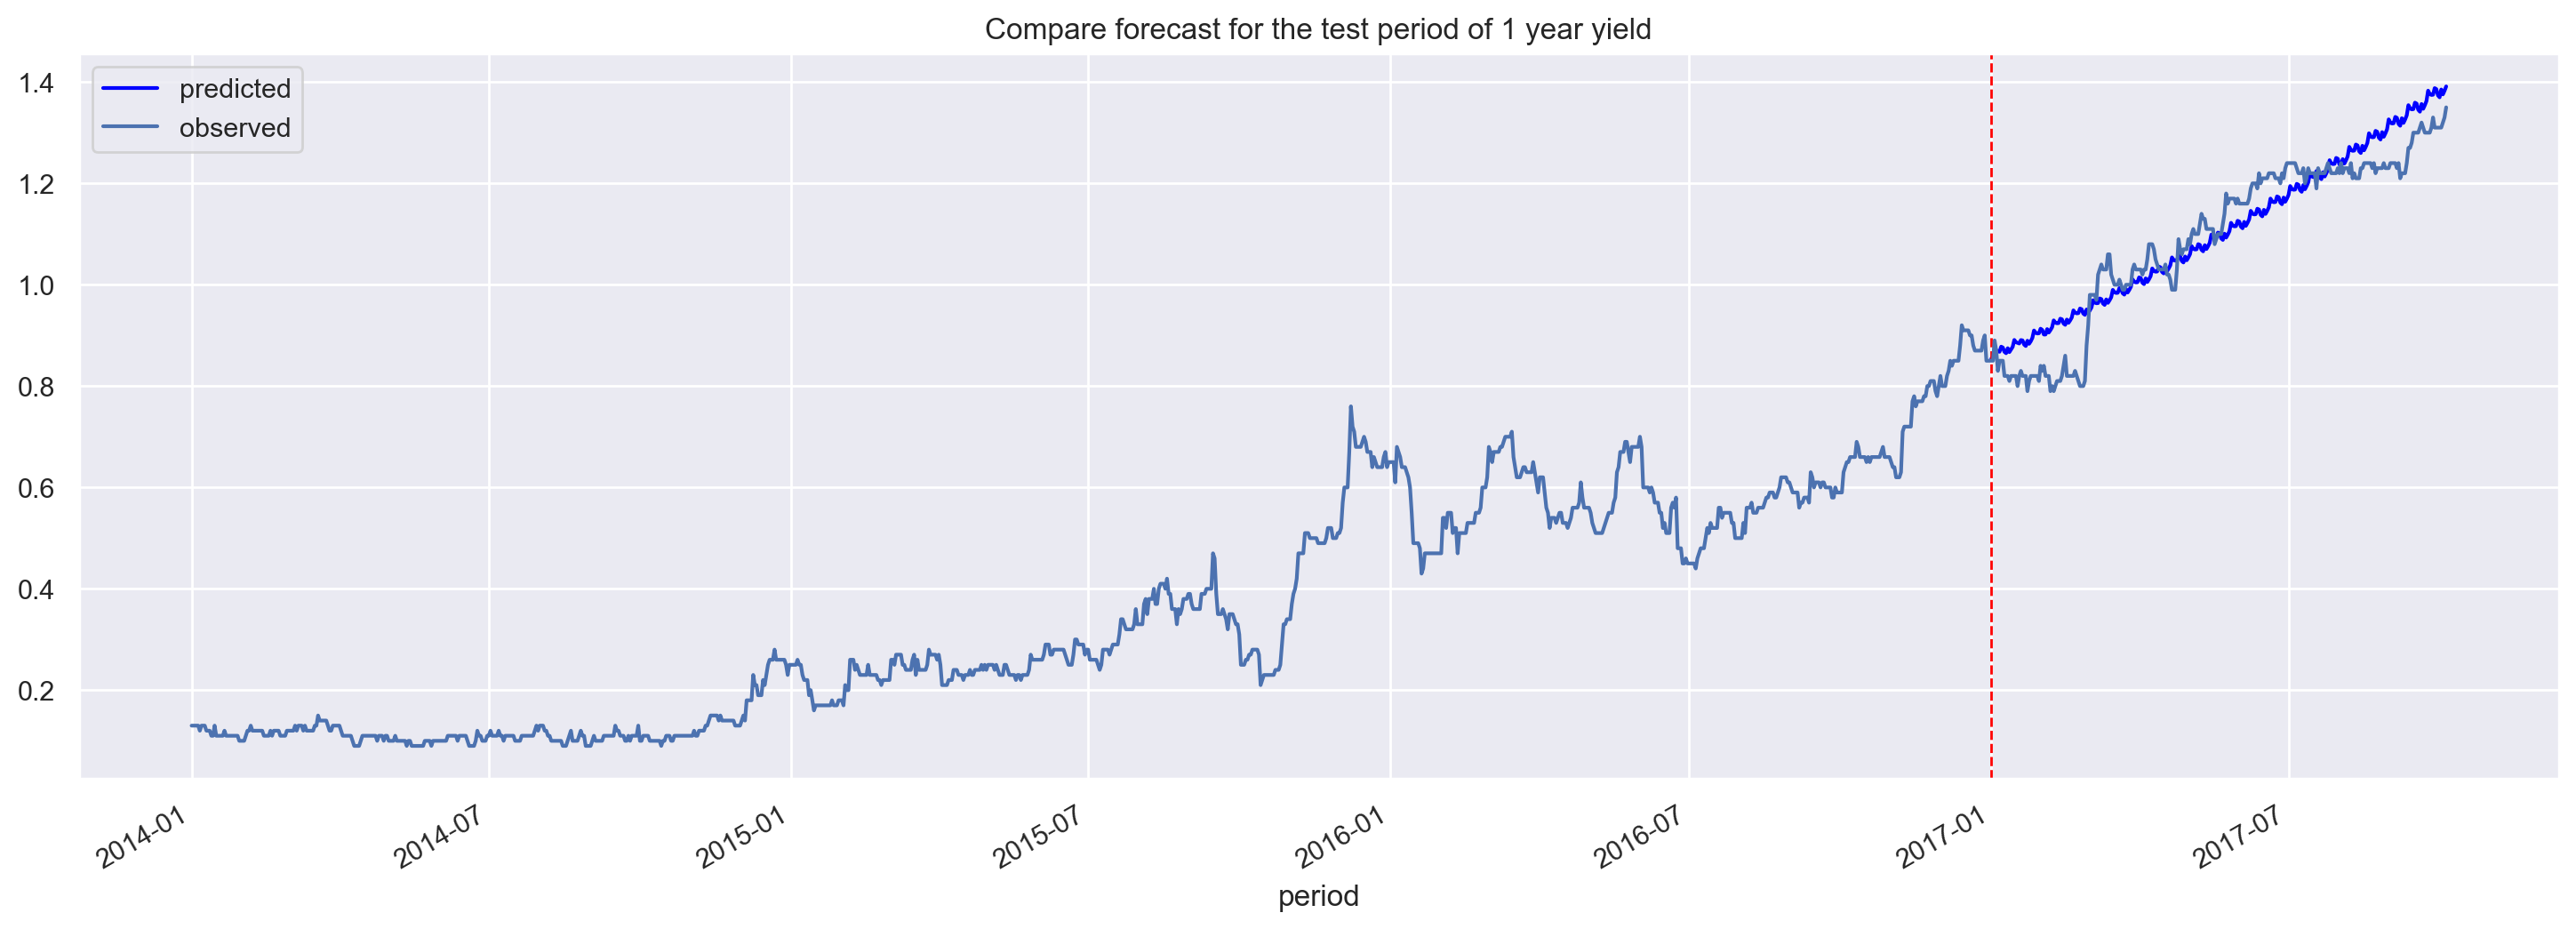

In [1368]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="blue", label="predicted")

plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
df.plot(x="period", y="value", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Compare forecast for the test period of 1 year yield')


plt.show();


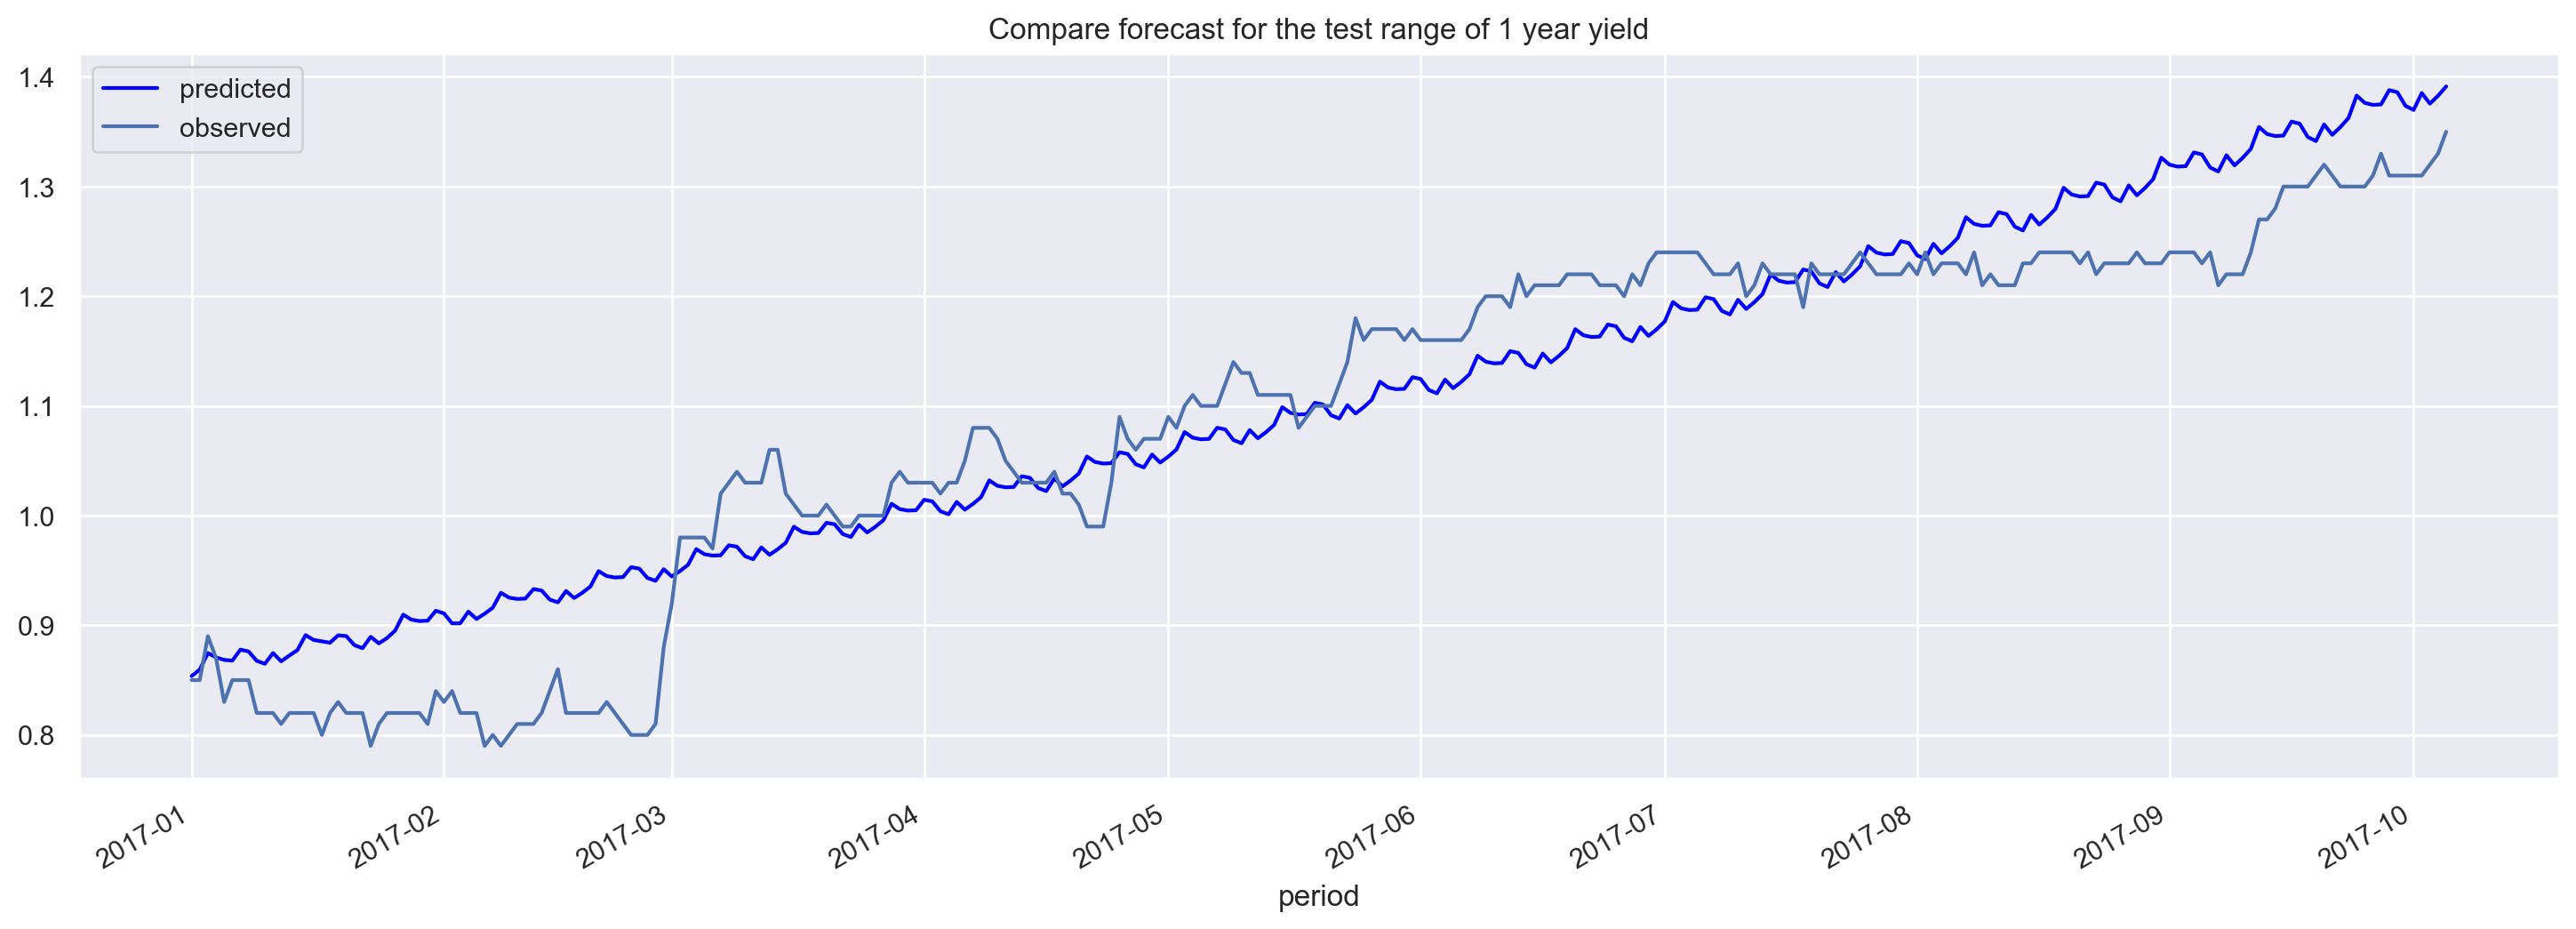

In [1369]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="blue", label="predicted")

df.loc[test_range].plot(x="period", y="value", ax=ax, label="observed")
plt.legend(loc='best')
plt.title('Compare forecast for the test range of 1 year yield')

plt.show();


# Conclusion


During this project got an idea about US treasury yields for multiple tenors.

In python we are mainly using six libraries- pandas, numpy, seaborn, matplotlib.pyplot, scipy, statsmodels.

Logistic Distribution fits better than Normal Distribution for all the increments

Identified that there are correlations between 1 day and 25 day increment  for multiple tenors by Pearson's method.

SARIMA Stochastic Model is implemented  to predict Yields.

Future Scope:  To implement  Stochastic model like Geometric Brownian motion for predicting yields.
